# K-Select notbook
This notebook conducts 2 parts:
1. K-Select algorithm.
2. Analysis of k across cities and years. 

In [3]:
import numpy as np
import networkx as nx
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt
import pickle
from shapely import wkt
import os

## K-Select algorithm.

In [3]:
# Extract the strongly connected components and print.

# Load your numpy array and node to CBG mapping
#flow_matrix = np.load(r'data\Mobility\cbg_visit_2022-02_3.npy')
flow_matrix = np.load(r'gd_flow_matrix_1101-1107.npy')
# Set the diagonal elements to zero
np.fill_diagonal(flow_matrix, 0)

# Create directed graph from flow matrix
G = nx.from_numpy_matrix(flow_matrix, create_using=nx.DiGraph)

# Find all strongly connected components
scc = list(nx.strongly_connected_components(G))

# Print the strongly connected components
for i, component in enumerate(scc, start=1):
    print(f"Strongly connected component {i}: {component}")


Strongly connected component 1: {4664}
Strongly connected component 2: {3061}
Strongly connected component 3: {0, 1, 2, 4, 6, 7, 9, 12, 13, 14, 16, 17, 18, 19, 20, 22, 23, 24, 25, 27, 28, 29, 30, 31, 33, 34, 36, 38, 40, 41, 42, 43, 44, 46, 47, 48, 49, 50, 51, 52, 55, 57, 58, 62, 63, 64, 65, 66, 67, 68, 69, 70, 72, 74, 77, 79, 81, 83, 84, 85, 86, 87, 88, 89, 91, 92, 93, 98, 100, 101, 102, 103, 104, 105, 106, 108, 109, 110, 111, 112, 114, 115, 116, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 131, 132, 134, 135, 137, 138, 139, 140, 141, 142, 144, 145, 146, 147, 148, 149, 150, 151, 153, 154, 155, 156, 157, 158, 159, 160, 163, 164, 165, 166, 168, 169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 180, 181, 184, 187, 188, 189, 190, 191, 193, 196, 197, 198, 199, 201, 202, 203, 204, 205, 206, 207, 208, 209, 210, 211, 212, 213, 214, 215, 216, 218, 219, 220, 221, 222, 223, 224, 225, 226, 227, 228, 229, 230, 231, 232, 233, 234, 235, 237, 238, 239, 240, 241, 243, 245, 246, 247,

In [36]:
# The algorithm to find the smallest k such that the subgraph remains strongly connected
# The binary search algorithm is used in finding the smallest k
# Input: flow_matrix: numpy array of flow matrix
# Output: k: the smallest k such that the subgraph remains strongly connected

import numpy as np
import networkx as nx
import pandas as pd

def minimum_flows_for_strongly_connectivity(flow_matrix):
    # Set the diagonal elements to zero
    np.fill_diagonal(flow_matrix, 0)

    # Create directed graph from flow matrix
    G = nx.from_numpy_matrix(flow_matrix, create_using=nx.DiGraph)

    # Find all strongly connected components
    scc = list(nx.strongly_connected_components(G))

    # Create a subgraph with only nodes in the first SCC
    sub_G = G.subgraph(max(scc, key=len))
    print("nodes of the largest strongly connected graph for city:", len(sub_G.nodes()))
    num_units = len(sub_G.nodes())

    # Function to check if the graph is strongly connected when only top k edges are kept for each node
    def check_strongly_connected_k(graph, k):
        # Create a new graph which only keeps top k outgoing edges for each node
        new_graph = nx.DiGraph()
        for node in graph.nodes():
            edges = sorted(graph.out_edges(node, data=True), key=lambda x: x[2]['weight'], reverse=True)[:k]
            new_graph.add_edges_from(edges)
        # Check if the new graph is still strongly connected
        return nx.is_strongly_connected(new_graph)

    """# Determine the smallest value of k such that the graph remains strongly connected
    k = 1
    while not check_strongly_connected_k(sub_G, k):
        k += 1
    return k """

    # Binary search variables
    low = 1
    high = num_units

    while low < high:
        mid = low + (high - low) // 2

        # Check if the graph is weakly connected for the current mid
        if check_strongly_connected_k(sub_G, mid):
            high = mid
        else:
            low = mid + 1

    # Final check if the graph is weakly connected for the low/high point
    if  check_strongly_connected_k(sub_G, low):
        return low
    else:
        return -1

# one month example
"""# Load your numpy array
flow_matrix = np.load(r'data\Mobility\cbg_visit_2022-02_7.npy')
k=minimum_flows_for_strongly_connectivity(flow_matrix)
print(f"The smallest k such that the subgraph remains strongly connected is {k}.")
"""

'# Load your numpy array\nflow_matrix = np.load(r\'data\\Mobility\\cbg_visit_2022-02_7.npy\')\nk=minimum_flows_for_strongly_connectivity(flow_matrix)\nprint(f"The smallest k such that the subgraph remains strongly connected is {k}.")\n'

In [28]:
# The algorithm to find the smallest k such that the subgraph remains strongly connected
# The binary search algorithm is used in finding the smallest k
# Input: flow_matrix: numpy array of flow matrix
# Output: k: the smallest k such that the subgraph remains strongly connected

import numpy as np
import networkx as nx
import pandas as pd

def minimum_flows_for_strongly_connectivity_extract_component_first(flow_matrix, delete_degrees = [3, 6, 9, 12, 15, 18, 20, 25, 30, 35, 40, 45, 50, 60, 70, 80, 90, 100,]):
    
    ks = []
    # Function to check if the graph is strongly connected when only top k edges are kept for each node
    def check_strongly_connected_k(graph, k):
        # Create a new graph which only keeps top k outgoing edges for each node
        new_graph = nx.DiGraph()
        for node in graph.nodes():
            edges = sorted(graph.out_edges(node, data=True), key=lambda x: x[2]['weight'], reverse=True)[:k]
            new_graph.add_edges_from(edges)
        # Check if the new graph is still strongly connected
        return nx.is_strongly_connected(new_graph)
    
    # Set the diagonal elements to zero
    np.fill_diagonal(flow_matrix, 0)

    # Create directed graph from flow matrix
    G = nx.from_numpy_matrix(flow_matrix, create_using=nx.DiGraph)

    # Find all strongly connected components
    scc = list(nx.strongly_connected_components(G))
    
    # Create a subgraph with only nodes in the first SCC
    strongly_connected_G = G.subgraph(max(scc, key=len))
    
    # Convert graph to numpy adjacency matrix
    adj_matrix = nx.adjacency_matrix(strongly_connected_G)
    numpy_array = adj_matrix.toarray()
    # Convert the original flows to binary
    flows_binary = (numpy_array > 0).astype(int)
    # Calculate the degrees based on the new definition
    degrees_all = np.sum(np.logical_or(flows_binary, flows_binary.T), axis=1)

    for delete_degree in delete_degrees:

        # find the nodes whose degree are lower than 5
        nodes_to_remove = np.where(degrees_all < delete_degree)[0]
        print('Number of nodes to remove: ', len(nodes_to_remove))

        # Remove the ndoes from the matrix
        reduced_matrix = np.delete(numpy_array, nodes_to_remove, axis=0)
        reduced_matrix = np.delete(reduced_matrix, nodes_to_remove, axis=1)

        # Create directed graph from flow matrix
        sub_G = nx.from_numpy_matrix(reduced_matrix, create_using=nx.DiGraph)
        
        print("nodes of the largest strongly connected graph for city:", len(sub_G.nodes()))
        num_units = len(sub_G.nodes())

        """# Determine the smallest value of k such that the graph remains strongly connected
        k = 1
        while not check_strongly_connected_k(sub_G, k):
            k += 1
        return k """

        # Binary search variables
        low = 1
        high = num_units

        while low < high:
            mid = low + (high - low) // 2

            # Check if the graph is weakly connected for the current mid
            if check_strongly_connected_k(sub_G, mid):
                high = mid
            else:
                low = mid + 1

        # Final check if the graph is weakly connected for the low/high point
        if  check_strongly_connected_k(sub_G, low):
            print(low)
            ks.append(low)
        else:
            print(-1)
            ks.append(-1)
    return ks

# one month example
"""# Load your numpy array
flow_matrix = np.load(r'data\Mobility\cbg_visit_2022-02_7.npy')
k=minimum_flows_for_strongly_connectivity(flow_matrix)
print(f"The smallest k such that the subgraph remains strongly connected is {k}.")
"""

'# Load your numpy array\nflow_matrix = np.load(r\'data\\Mobility\\cbg_visit_2022-02_7.npy\')\nk=minimum_flows_for_strongly_connectivity(flow_matrix)\nprint(f"The smallest k such that the subgraph remains strongly connected is {k}.")\n'

In [15]:
# Load your numpy array
flow_matrix = np.load(r'bj_flow_matrix_201807_liuhuan_reduced.npy')
k=minimum_flows_for_strongly_connectivity(flow_matrix)
print(f"The smallest k such that the subgraph remains strongly connected is {k}.")

nodes of the largest strongly connected graph for city: 1402
The smallest k such that the subgraph remains strongly connected is 124.


In [6]:
# Convert the original flows to binary
flow_matrix = np.load(r'gd_flow_matrix_1101-1107.npy')
flows_binary = (flow_matrix > 0).astype(int)

# Calculate the degrees based on the new definition
degrees_all = np.sum(np.logical_or(flows_binary, flows_binary.T), axis=1)

# find the nodes whose degree are lower than 5
nodes_to_remove = np.where(degrees_all < 20)[0]
print('Number of nodes to remove: ', (nodes_to_remove))

# Remove the ndoes from the matrix
reduced_matrix = np.delete(flow_matrix, nodes_to_remove, axis=0)
reduced_matrix = np.delete(reduced_matrix, nodes_to_remove, axis=1)

k=minimum_flows_for_strongly_connectivity(reduced_matrix)
print(k)


Number of nodes to remove:  [   3    5    8 ... 9046 9047 9048]
nodes of the largest strongly connected graph for city: 7205
118


In [9]:
# 建立中英文城市名称的映射关系
city_mapping = {
    '东莞市': 'Dongguan',
    '中山市': 'Zhongshan',
    '云浮市': 'Yunfu',
    '佛山市': 'Foshan',
    '广州市': 'Guangzhou',
    '惠州市': 'Huizhou',
    '揭阳市': 'Jieyang',
    '梅州市': 'Meizhou',
    '汕头市': 'Shantou',
    '汕尾市': 'Shanwei',
    '江门市': 'Jiangmen',
    '河源市': 'Heyuan',
    '深圳市': 'Shenzhen',
    '清远市': 'Qingyuan',
    '湛江市': 'Zhanjiang',
    '潮州市': 'Chaozhou',
    '珠海市': 'Zhuhai',
    '肇庆市': 'Zhaoqing',
    '茂名市': 'Maoming',
    '阳江市': 'Yangjiang',
    '韶关市': 'Shaoguan'
}

def rename_file_with_english_city(filename):
    new_name = filename
    for cn_city, en_city in city_mapping.items():
        new_name = new_name.replace(cn_city, en_city)
    return new_name

# 示例
for old_filename in os.listdir(r'.\data\Guangdong\flow_matrix'):
    new_filename = rename_file_with_english_city(old_filename)
    if old_filename != new_filename:  # 检查文件名是否已更改
        os.rename(os.path.join(r'.\data\Guangdong\flow_matrix',old_filename), os.path.join(r'.\data\Guangdong\flow_matrix',new_filename))
        print(f'Renamed: {old_filename} -> {new_filename}')


    delete_degree Dongguan Zhongshan Yunfu Foshan Guangzhou Huizhou Jieyang  \
0               3      NaN       NaN   NaN    NaN       NaN     NaN     NaN   
1               6      NaN       NaN   NaN    NaN       NaN     NaN     NaN   
2               9      NaN       NaN   NaN    NaN       NaN     NaN     NaN   
3              12      NaN       NaN   NaN    NaN       NaN     NaN     NaN   
4              15      NaN       NaN   NaN    NaN       NaN     NaN     NaN   
5              18      NaN       NaN   NaN    NaN       NaN     NaN     NaN   
6              20      NaN       NaN   NaN    NaN       NaN     NaN     NaN   
7              25      NaN       NaN   NaN    NaN       NaN     NaN     NaN   
8              30      NaN       NaN   NaN    NaN       NaN     NaN     NaN   
9              35      NaN       NaN   NaN    NaN       NaN     NaN     NaN   
10             40      NaN       NaN   NaN    NaN       NaN     NaN     NaN   
11             45      NaN       NaN   NaN    NaN   

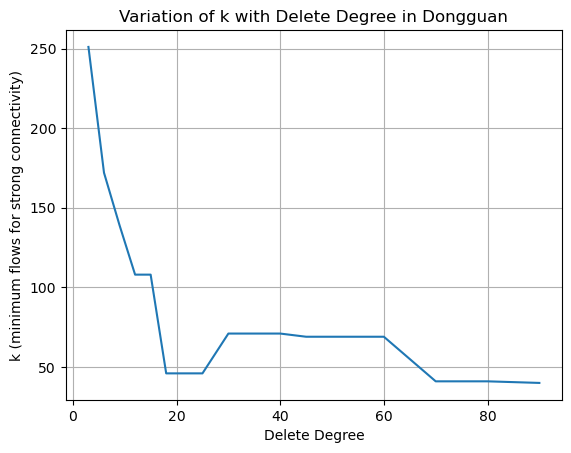

Zhongshan
Number of nodes to remove:  227
nodes of the largest strongly connected graph for city: 2814
Number of nodes to remove:  258
nodes of the largest strongly connected graph for city: 2783
Number of nodes to remove:  296
nodes of the largest strongly connected graph for city: 2745
Number of nodes to remove:  326
nodes of the largest strongly connected graph for city: 2715
Number of nodes to remove:  356
nodes of the largest strongly connected graph for city: 2685
Number of nodes to remove:  385
nodes of the largest strongly connected graph for city: 2656
Number of nodes to remove:  406
nodes of the largest strongly connected graph for city: 2635
Number of nodes to remove:  463
nodes of the largest strongly connected graph for city: 2578
Number of nodes to remove:  496
nodes of the largest strongly connected graph for city: 2545
Number of nodes to remove:  536
nodes of the largest strongly connected graph for city: 2505
Number of nodes to remove:  574
nodes of the largest strongl

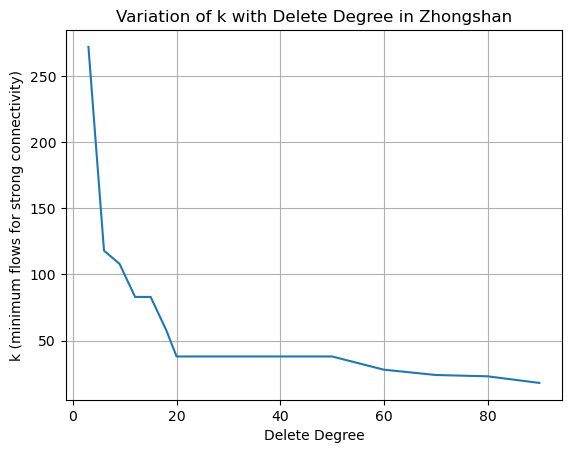

Yunfu
Number of nodes to remove:  467
nodes of the largest strongly connected graph for city: 2344
Number of nodes to remove:  544
nodes of the largest strongly connected graph for city: 2267
Number of nodes to remove:  637
nodes of the largest strongly connected graph for city: 2174
Number of nodes to remove:  731
nodes of the largest strongly connected graph for city: 2080
Number of nodes to remove:  832
nodes of the largest strongly connected graph for city: 1979
Number of nodes to remove:  943
nodes of the largest strongly connected graph for city: 1868
Number of nodes to remove:  1004
nodes of the largest strongly connected graph for city: 1807
Number of nodes to remove:  1172
nodes of the largest strongly connected graph for city: 1639
Number of nodes to remove:  1334
nodes of the largest strongly connected graph for city: 1477
Number of nodes to remove:  1454
nodes of the largest strongly connected graph for city: 1357
Number of nodes to remove:  1573
nodes of the largest strong

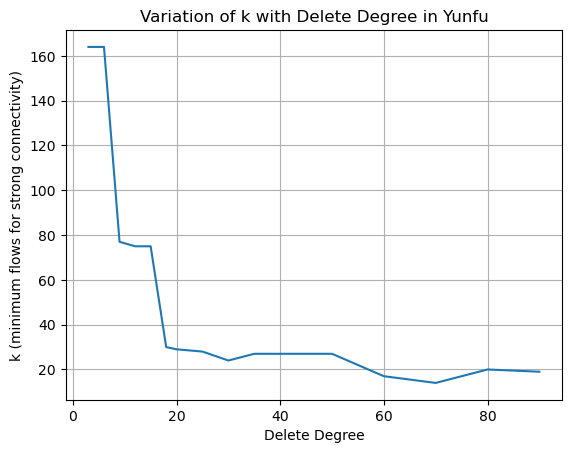

Foshan
Number of nodes to remove:  478
nodes of the largest strongly connected graph for city: 5616
Number of nodes to remove:  522
nodes of the largest strongly connected graph for city: 5573
Number of nodes to remove:  572
nodes of the largest strongly connected graph for city: 5523
Number of nodes to remove:  637
nodes of the largest strongly connected graph for city: 5458
Number of nodes to remove:  679
nodes of the largest strongly connected graph for city: 5416
Number of nodes to remove:  748
nodes of the largest strongly connected graph for city: 5347
Number of nodes to remove:  801
nodes of the largest strongly connected graph for city: 5294
Number of nodes to remove:  908
nodes of the largest strongly connected graph for city: 5187
Number of nodes to remove:  998
nodes of the largest strongly connected graph for city: 5097
Number of nodes to remove:  1084
nodes of the largest strongly connected graph for city: 5011
Number of nodes to remove:  1153
nodes of the largest strongly

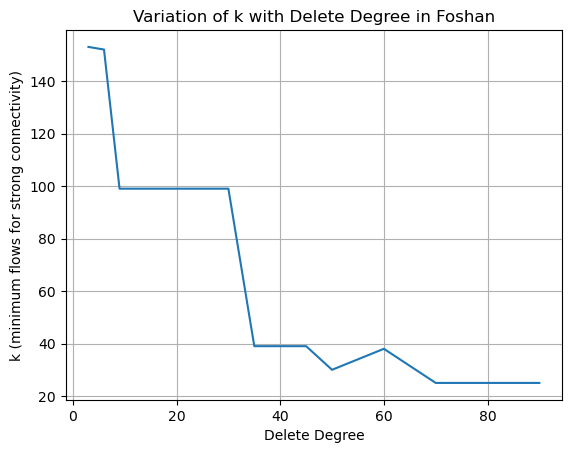

Guangzhou
Number of nodes to remove:  1261
nodes of the largest strongly connected graph for city: 7788
Number of nodes to remove:  1364
nodes of the largest strongly connected graph for city: 7685
Number of nodes to remove:  1463
nodes of the largest strongly connected graph for city: 7586
Number of nodes to remove:  1567
nodes of the largest strongly connected graph for city: 7482
Number of nodes to remove:  1676
nodes of the largest strongly connected graph for city: 7373
Number of nodes to remove:  1781
nodes of the largest strongly connected graph for city: 7268
Number of nodes to remove:  1844
nodes of the largest strongly connected graph for city: 7205
Number of nodes to remove:  2005
nodes of the largest strongly connected graph for city: 7044
Number of nodes to remove:  2130
nodes of the largest strongly connected graph for city: 6919
Number of nodes to remove:  2271
nodes of the largest strongly connected graph for city: 6778
Number of nodes to remove:  2407
nodes of the larg

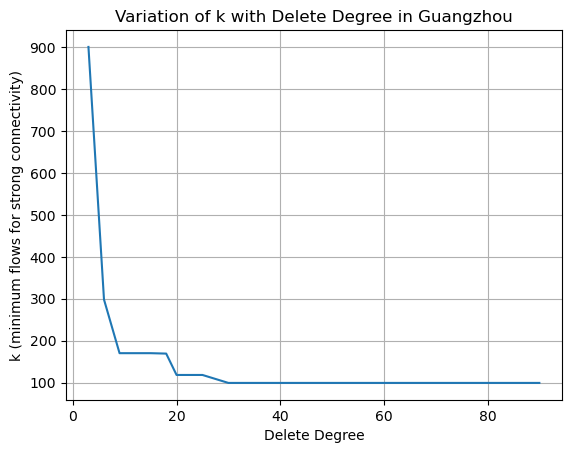

Huizhou
Number of nodes to remove:  1335
nodes of the largest strongly connected graph for city: 4113
Number of nodes to remove:  1422
nodes of the largest strongly connected graph for city: 4026
Number of nodes to remove:  1488
nodes of the largest strongly connected graph for city: 3960
Number of nodes to remove:  1552
nodes of the largest strongly connected graph for city: 3896
Number of nodes to remove:  1623
nodes of the largest strongly connected graph for city: 3825
Number of nodes to remove:  1693
nodes of the largest strongly connected graph for city: 3755
Number of nodes to remove:  1735
nodes of the largest strongly connected graph for city: 3713
Number of nodes to remove:  1842
nodes of the largest strongly connected graph for city: 3606
Number of nodes to remove:  1944
nodes of the largest strongly connected graph for city: 3504
Number of nodes to remove:  2050
nodes of the largest strongly connected graph for city: 3398
Number of nodes to remove:  2153
nodes of the larges

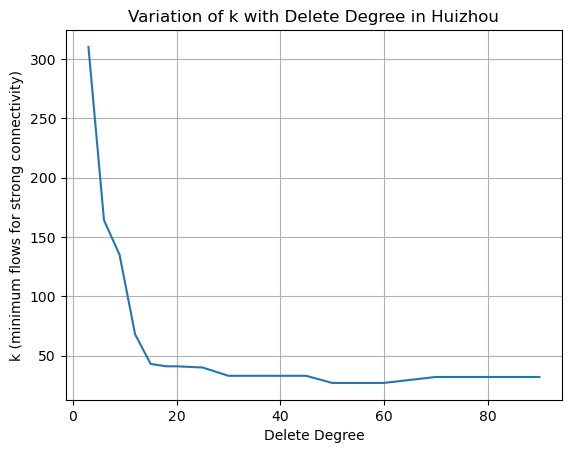

Jieyang
Number of nodes to remove:  785
nodes of the largest strongly connected graph for city: 3285
Number of nodes to remove:  843
nodes of the largest strongly connected graph for city: 3227
Number of nodes to remove:  918
nodes of the largest strongly connected graph for city: 3152
Number of nodes to remove:  997
nodes of the largest strongly connected graph for city: 3073
Number of nodes to remove:  1084
nodes of the largest strongly connected graph for city: 2986
Number of nodes to remove:  1144
nodes of the largest strongly connected graph for city: 2926
Number of nodes to remove:  1197
nodes of the largest strongly connected graph for city: 2873
Number of nodes to remove:  1330
nodes of the largest strongly connected graph for city: 2740
Number of nodes to remove:  1434
nodes of the largest strongly connected graph for city: 2636
Number of nodes to remove:  1557
nodes of the largest strongly connected graph for city: 2513
Number of nodes to remove:  1662
nodes of the largest st

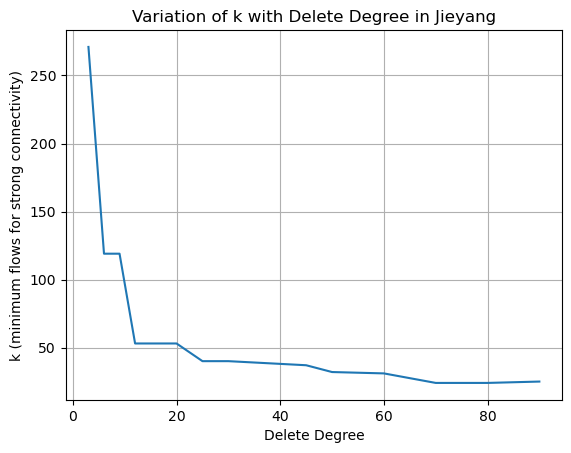

Meizhou
Number of nodes to remove:  717
nodes of the largest strongly connected graph for city: 3786
Number of nodes to remove:  910
nodes of the largest strongly connected graph for city: 3593
Number of nodes to remove:  1103
nodes of the largest strongly connected graph for city: 3400
Number of nodes to remove:  1285
nodes of the largest strongly connected graph for city: 3218
Number of nodes to remove:  1476
nodes of the largest strongly connected graph for city: 3027
Number of nodes to remove:  1622
nodes of the largest strongly connected graph for city: 2881
Number of nodes to remove:  1722
nodes of the largest strongly connected graph for city: 2781
Number of nodes to remove:  1945
nodes of the largest strongly connected graph for city: 2558
Number of nodes to remove:  2135
nodes of the largest strongly connected graph for city: 2368
Number of nodes to remove:  2318
nodes of the largest strongly connected graph for city: 2185
Number of nodes to remove:  2498
nodes of the largest 

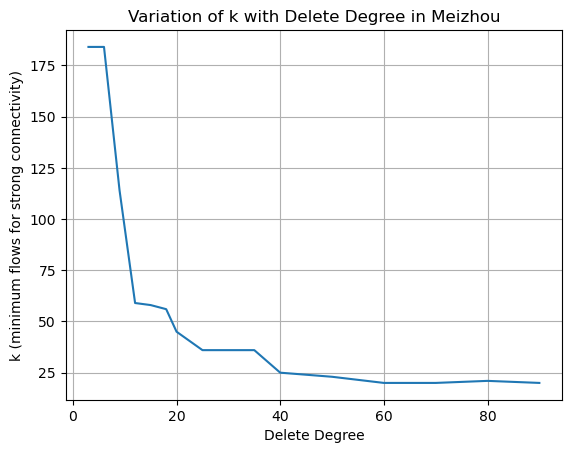

Shantou
Number of nodes to remove:  400
nodes of the largest strongly connected graph for city: 2672
Number of nodes to remove:  442
nodes of the largest strongly connected graph for city: 2630
Number of nodes to remove:  490
nodes of the largest strongly connected graph for city: 2582
Number of nodes to remove:  529
nodes of the largest strongly connected graph for city: 2543
Number of nodes to remove:  574
nodes of the largest strongly connected graph for city: 2498
Number of nodes to remove:  613
nodes of the largest strongly connected graph for city: 2459
Number of nodes to remove:  649
nodes of the largest strongly connected graph for city: 2423
Number of nodes to remove:  712
nodes of the largest strongly connected graph for city: 2360
Number of nodes to remove:  768
nodes of the largest strongly connected graph for city: 2304
Number of nodes to remove:  822
nodes of the largest strongly connected graph for city: 2250
Number of nodes to remove:  885
nodes of the largest strongly 

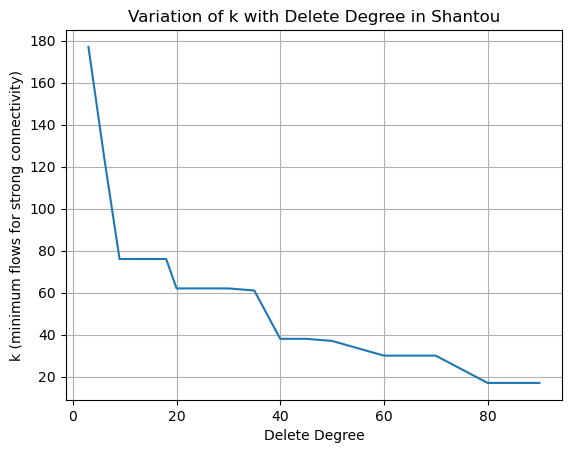

Shanwei
Number of nodes to remove:  245
nodes of the largest strongly connected graph for city: 1895
Number of nodes to remove:  287
nodes of the largest strongly connected graph for city: 1853
Number of nodes to remove:  340
nodes of the largest strongly connected graph for city: 1800
Number of nodes to remove:  398
nodes of the largest strongly connected graph for city: 1742
Number of nodes to remove:  455
nodes of the largest strongly connected graph for city: 1685
Number of nodes to remove:  525
nodes of the largest strongly connected graph for city: 1615
Number of nodes to remove:  569
nodes of the largest strongly connected graph for city: 1571
Number of nodes to remove:  661
nodes of the largest strongly connected graph for city: 1479
Number of nodes to remove:  754
nodes of the largest strongly connected graph for city: 1386
Number of nodes to remove:  852
nodes of the largest strongly connected graph for city: 1288
Number of nodes to remove:  933
nodes of the largest strongly 

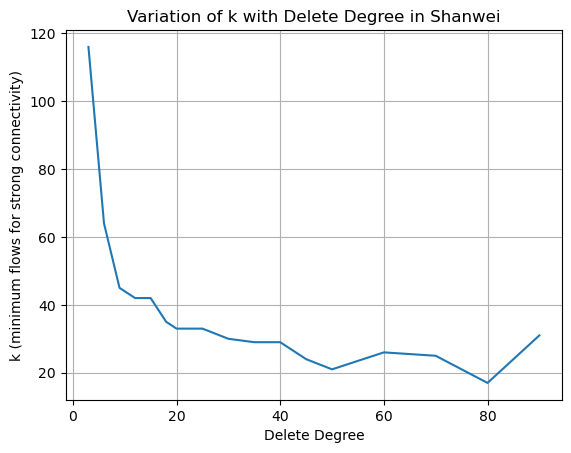

Jiangmen
Number of nodes to remove:  1520
nodes of the largest strongly connected graph for city: 3846
Number of nodes to remove:  1623
nodes of the largest strongly connected graph for city: 3743
Number of nodes to remove:  1731
nodes of the largest strongly connected graph for city: 3635
Number of nodes to remove:  1856
nodes of the largest strongly connected graph for city: 3510
Number of nodes to remove:  1958
nodes of the largest strongly connected graph for city: 3408
Number of nodes to remove:  2052
nodes of the largest strongly connected graph for city: 3314
Number of nodes to remove:  2096
nodes of the largest strongly connected graph for city: 3270
Number of nodes to remove:  2249
nodes of the largest strongly connected graph for city: 3117
Number of nodes to remove:  2406
nodes of the largest strongly connected graph for city: 2960
Number of nodes to remove:  2539
nodes of the largest strongly connected graph for city: 2827
Number of nodes to remove:  2674
nodes of the large

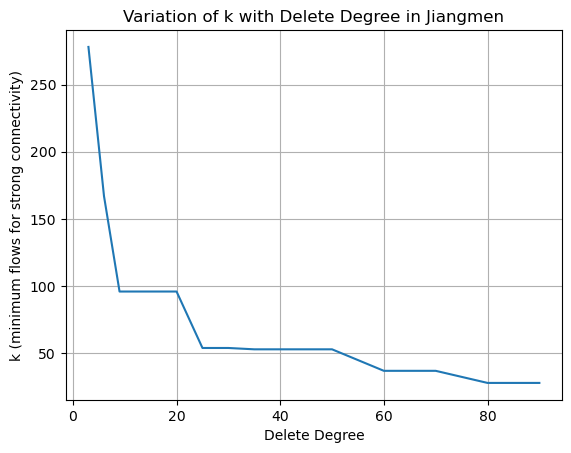

Heyuan
Number of nodes to remove:  897
nodes of the largest strongly connected graph for city: 2899
Number of nodes to remove:  990
nodes of the largest strongly connected graph for city: 2806
Number of nodes to remove:  1116
nodes of the largest strongly connected graph for city: 2680
Number of nodes to remove:  1238
nodes of the largest strongly connected graph for city: 2558
Number of nodes to remove:  1372
nodes of the largest strongly connected graph for city: 2424
Number of nodes to remove:  1509
nodes of the largest strongly connected graph for city: 2287
Number of nodes to remove:  1592
nodes of the largest strongly connected graph for city: 2204
Number of nodes to remove:  1797
nodes of the largest strongly connected graph for city: 1999
Number of nodes to remove:  1971
nodes of the largest strongly connected graph for city: 1825
Number of nodes to remove:  2126
nodes of the largest strongly connected graph for city: 1670
Number of nodes to remove:  2278
nodes of the largest s

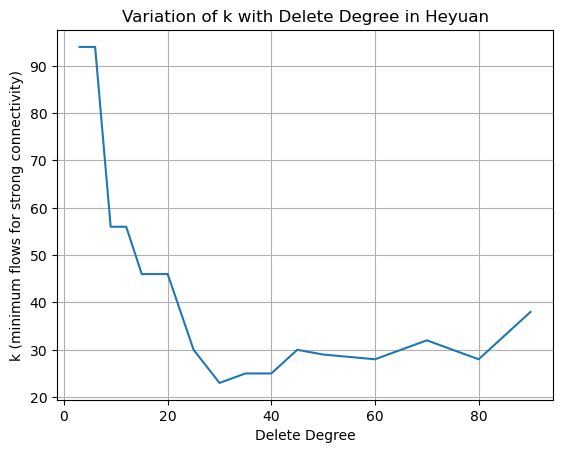

Shenzhen
Number of nodes to remove:  538
nodes of the largest strongly connected graph for city: 4553
Number of nodes to remove:  598
nodes of the largest strongly connected graph for city: 4494
Number of nodes to remove:  644
nodes of the largest strongly connected graph for city: 4448
Number of nodes to remove:  689
nodes of the largest strongly connected graph for city: 4403
Number of nodes to remove:  728
nodes of the largest strongly connected graph for city: 4364
Number of nodes to remove:  775
nodes of the largest strongly connected graph for city: 4317
Number of nodes to remove:  795
nodes of the largest strongly connected graph for city: 4297
Number of nodes to remove:  858
nodes of the largest strongly connected graph for city: 4234
Number of nodes to remove:  898
nodes of the largest strongly connected graph for city: 4194
Number of nodes to remove:  947
nodes of the largest strongly connected graph for city: 4145
Number of nodes to remove:  991
nodes of the largest strongly

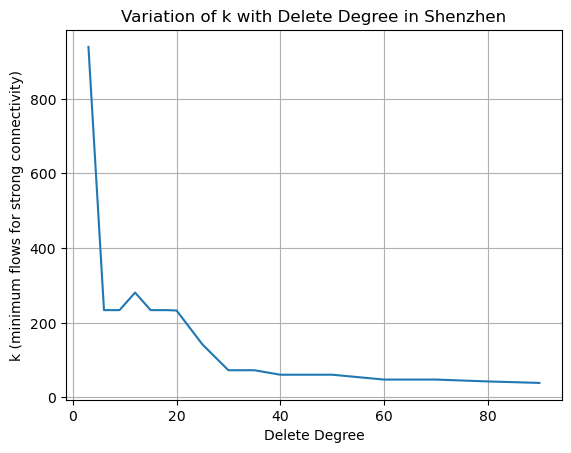

Qingyuan
Number of nodes to remove:  316
nodes of the largest strongly connected graph for city: 3306
Number of nodes to remove:  414
nodes of the largest strongly connected graph for city: 3208
Number of nodes to remove:  489
nodes of the largest strongly connected graph for city: 3133
Number of nodes to remove:  599
nodes of the largest strongly connected graph for city: 3023
Number of nodes to remove:  695
nodes of the largest strongly connected graph for city: 2927
Number of nodes to remove:  828
nodes of the largest strongly connected graph for city: 2794
Number of nodes to remove:  913
nodes of the largest strongly connected graph for city: 2709
Number of nodes to remove:  1120
nodes of the largest strongly connected graph for city: 2502
Number of nodes to remove:  1304
nodes of the largest strongly connected graph for city: 2318
Number of nodes to remove:  1448
nodes of the largest strongly connected graph for city: 2174
Number of nodes to remove:  1601
nodes of the largest stro

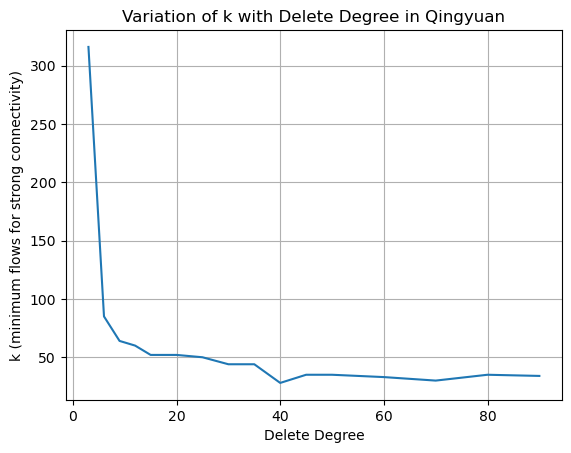

Zhanjiang
Number of nodes to remove:  536
nodes of the largest strongly connected graph for city: 3963
Number of nodes to remove:  611
nodes of the largest strongly connected graph for city: 3888
Number of nodes to remove:  704
nodes of the largest strongly connected graph for city: 3795
Number of nodes to remove:  796
nodes of the largest strongly connected graph for city: 3703
Number of nodes to remove:  877
nodes of the largest strongly connected graph for city: 3622
Number of nodes to remove:  958
nodes of the largest strongly connected graph for city: 3541
Number of nodes to remove:  1017
nodes of the largest strongly connected graph for city: 3482
Number of nodes to remove:  1147
nodes of the largest strongly connected graph for city: 3352
Number of nodes to remove:  1266
nodes of the largest strongly connected graph for city: 3233
Number of nodes to remove:  1375
nodes of the largest strongly connected graph for city: 3124
Number of nodes to remove:  1475
nodes of the largest st

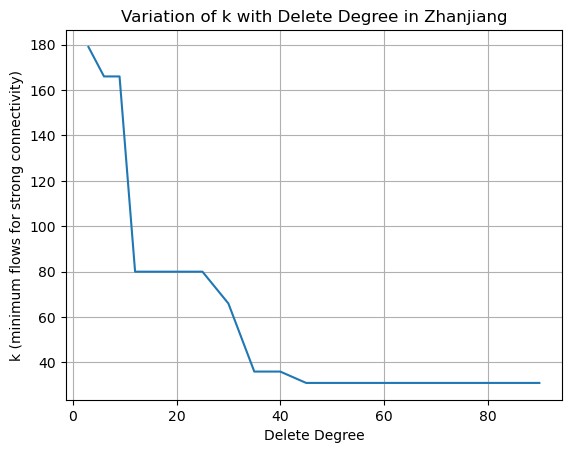

Chaozhou
Number of nodes to remove:  176
nodes of the largest strongly connected graph for city: 2312
Number of nodes to remove:  232
nodes of the largest strongly connected graph for city: 2256
Number of nodes to remove:  301
nodes of the largest strongly connected graph for city: 2187
Number of nodes to remove:  351
nodes of the largest strongly connected graph for city: 2137
Number of nodes to remove:  414
nodes of the largest strongly connected graph for city: 2074
Number of nodes to remove:  475
nodes of the largest strongly connected graph for city: 2013
Number of nodes to remove:  506
nodes of the largest strongly connected graph for city: 1982
Number of nodes to remove:  624
nodes of the largest strongly connected graph for city: 1864
Number of nodes to remove:  717
nodes of the largest strongly connected graph for city: 1771
Number of nodes to remove:  818
nodes of the largest strongly connected graph for city: 1670
Number of nodes to remove:  900
nodes of the largest strongly

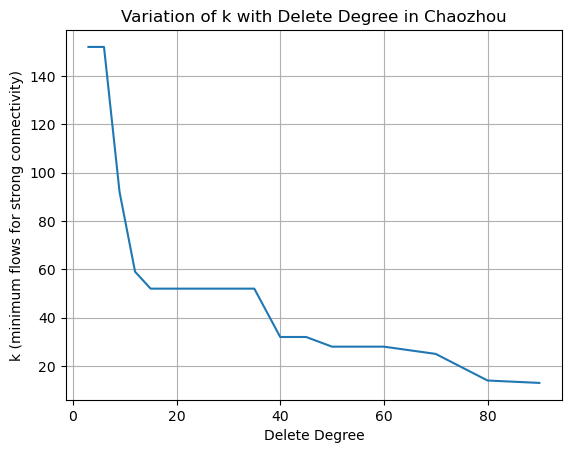

Zhuhai
Number of nodes to remove:  226
nodes of the largest strongly connected graph for city: 1959
Number of nodes to remove:  255
nodes of the largest strongly connected graph for city: 1931
Number of nodes to remove:  299
nodes of the largest strongly connected graph for city: 1887
Number of nodes to remove:  321
nodes of the largest strongly connected graph for city: 1865
Number of nodes to remove:  351
nodes of the largest strongly connected graph for city: 1835
Number of nodes to remove:  384
nodes of the largest strongly connected graph for city: 1802
Number of nodes to remove:  402
nodes of the largest strongly connected graph for city: 1784
Number of nodes to remove:  456
nodes of the largest strongly connected graph for city: 1730
Number of nodes to remove:  514
nodes of the largest strongly connected graph for city: 1672
Number of nodes to remove:  562
nodes of the largest strongly connected graph for city: 1624
Number of nodes to remove:  608
nodes of the largest strongly c

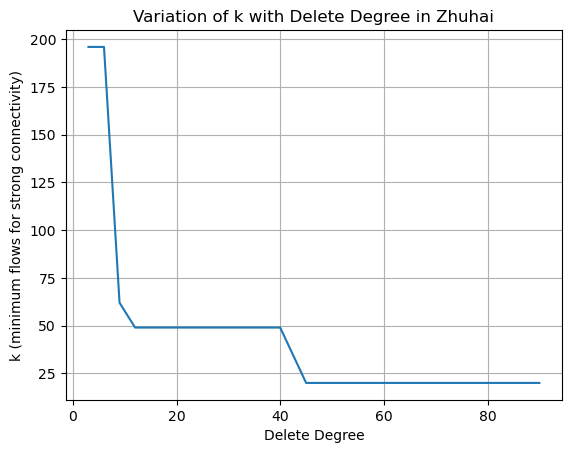

Zhaoqing
Number of nodes to remove:  753
nodes of the largest strongly connected graph for city: 3255
Number of nodes to remove:  844
nodes of the largest strongly connected graph for city: 3165
Number of nodes to remove:  942
nodes of the largest strongly connected graph for city: 3068
Number of nodes to remove:  1048
nodes of the largest strongly connected graph for city: 2962
Number of nodes to remove:  1148
nodes of the largest strongly connected graph for city: 2862
Number of nodes to remove:  1266
nodes of the largest strongly connected graph for city: 2744
Number of nodes to remove:  1355
nodes of the largest strongly connected graph for city: 2655
Number of nodes to remove:  1542
nodes of the largest strongly connected graph for city: 2468
Number of nodes to remove:  1712
nodes of the largest strongly connected graph for city: 2298
Number of nodes to remove:  1896
nodes of the largest strongly connected graph for city: 2114
Number of nodes to remove:  2045
nodes of the largest 

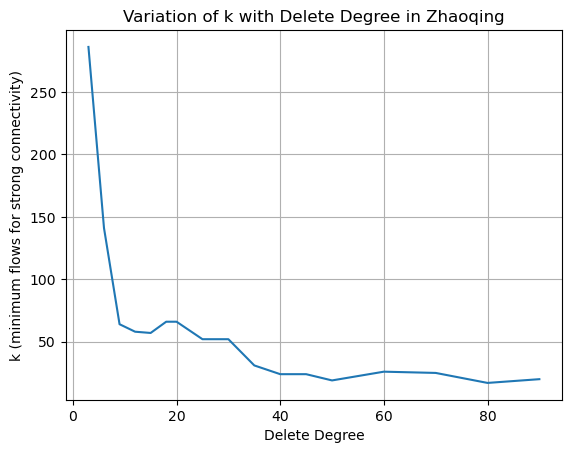

Maoming
Number of nodes to remove:  271
nodes of the largest strongly connected graph for city: 3318
Number of nodes to remove:  283
nodes of the largest strongly connected graph for city: 3306
Number of nodes to remove:  314
nodes of the largest strongly connected graph for city: 3275
Number of nodes to remove:  371
nodes of the largest strongly connected graph for city: 3218
Number of nodes to remove:  443
nodes of the largest strongly connected graph for city: 3146
Number of nodes to remove:  500
nodes of the largest strongly connected graph for city: 3089
Number of nodes to remove:  542
nodes of the largest strongly connected graph for city: 3047
Number of nodes to remove:  632
nodes of the largest strongly connected graph for city: 2957
Number of nodes to remove:  733
nodes of the largest strongly connected graph for city: 2856
Number of nodes to remove:  840
nodes of the largest strongly connected graph for city: 2749
Number of nodes to remove:  960
nodes of the largest strongly 

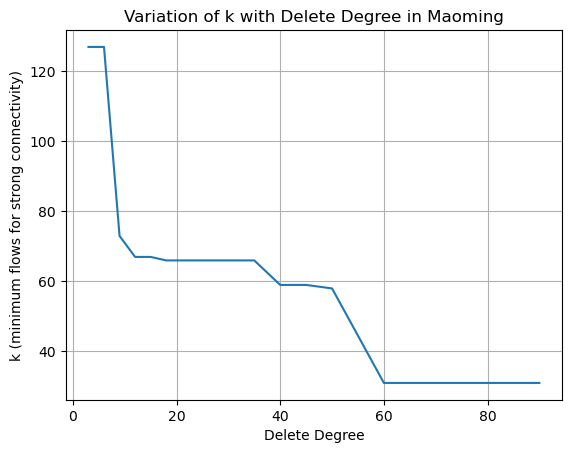

Yangjiang
Number of nodes to remove:  613
nodes of the largest strongly connected graph for city: 2188
Number of nodes to remove:  675
nodes of the largest strongly connected graph for city: 2126
Number of nodes to remove:  749
nodes of the largest strongly connected graph for city: 2052
Number of nodes to remove:  833
nodes of the largest strongly connected graph for city: 1968
Number of nodes to remove:  907
nodes of the largest strongly connected graph for city: 1894
Number of nodes to remove:  986
nodes of the largest strongly connected graph for city: 1815
Number of nodes to remove:  1030
nodes of the largest strongly connected graph for city: 1771
Number of nodes to remove:  1130
nodes of the largest strongly connected graph for city: 1671
Number of nodes to remove:  1224
nodes of the largest strongly connected graph for city: 1577
Number of nodes to remove:  1321
nodes of the largest strongly connected graph for city: 1480
Number of nodes to remove:  1412
nodes of the largest st

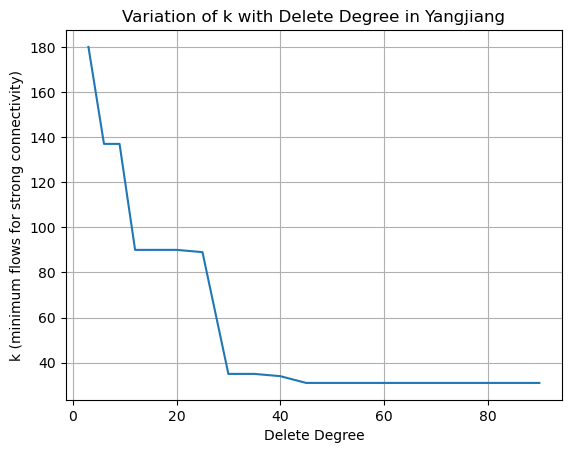

Shaoguan
Number of nodes to remove:  376
nodes of the largest strongly connected graph for city: 3061
Number of nodes to remove:  535
nodes of the largest strongly connected graph for city: 2903
Number of nodes to remove:  678
nodes of the largest strongly connected graph for city: 2760
Number of nodes to remove:  822
nodes of the largest strongly connected graph for city: 2616
Number of nodes to remove:  963
nodes of the largest strongly connected graph for city: 2475
Number of nodes to remove:  1089
nodes of the largest strongly connected graph for city: 2349
Number of nodes to remove:  1182
nodes of the largest strongly connected graph for city: 2256
Number of nodes to remove:  1361
nodes of the largest strongly connected graph for city: 2077
Number of nodes to remove:  1515
nodes of the largest strongly connected graph for city: 1923
Number of nodes to remove:  1657
nodes of the largest strongly connected graph for city: 1781
Number of nodes to remove:  1771
nodes of the largest st

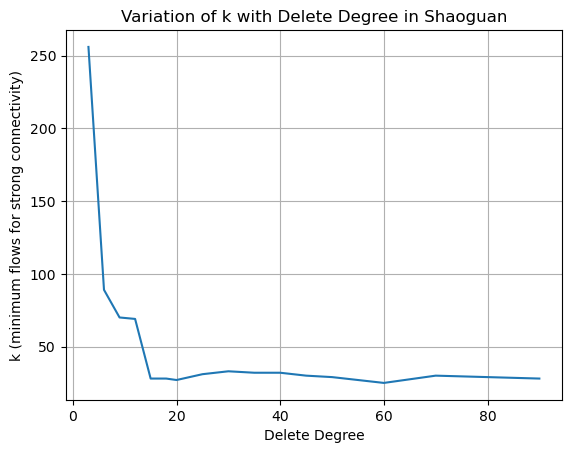

In [14]:

delete_degrees = [3, 6, 9, 12, 15, 18, 20, 25, 30, 35, 40, 45, 50, 60, 70, 80, 90,]



city_list = ['东莞市', '中山市', '云浮市', '佛山市', '广州市', '惠州市', '揭阳市', '梅州市', '汕头市',
             '汕尾市', '江门市', '河源市', '深圳市', '清远市', '湛江市', '潮州市', '珠海市', '肇庆市',
             '茂名市', '阳江市', '韶关市']

city_list_eng = ['Dongguan', 'Zhongshan', 'Yunfu', 'Foshan', 'Guangzhou', 'Huizhou', 'Jieyang',
             'Meizhou', 'Shantou', 'Shanwei', 'Jiangmen', 'Heyuan', 'Shenzhen', 'Qingyuan', 
             'Zhanjiang', 'Chaozhou', 'Zhuhai', 'Zhaoqing', 'Maoming', 'Yangjiang', 'Shaoguan']
df_ks = pd.DataFrame(columns=['delete_degree']+city_list_eng)
df_ks['delete_degree'] = delete_degrees
print(df_ks)
for city in city_list_eng:
    flow_matrix = np.load(r'.\data\Guangdong\flow_matrix\gd_flow_matrix_{}_1101-1107.npy'.format(city))
    print(city)
    results = []
    for delete_degree in delete_degrees:
        # Convert the original flows to binary
        flows_binary = (flow_matrix > 0).astype(int)

        # Calculate the degrees based on the new definition
        degrees_all = np.sum(np.logical_or(flows_binary, flows_binary.T), axis=1)

        # find the nodes whose degree are lower than 5
        nodes_to_remove = np.where(degrees_all < delete_degree)[0]
        print('Number of nodes to remove: ', len(nodes_to_remove))

        # Remove the ndoes from the matrix
        reduced_matrix = np.delete(flow_matrix, nodes_to_remove, axis=0)
        reduced_matrix = np.delete(reduced_matrix, nodes_to_remove, axis=1)

        k=minimum_flows_for_strongly_connectivity(reduced_matrix)
        results.append(k)
        df_ks.loc[df_ks['delete_degree']==delete_degree, city] = k
    print(results)
    # 绘制结果
    plt.plot(delete_degrees, results)
    plt.xlabel('Delete Degree')
    plt.ylabel('k (minimum flows for strong connectivity)')
    plt.title('Variation of k with Delete Degree in {}'.format(city))
    plt.grid(True)
    plt.show()
    plt.close()

df_ks.to_csv('k_select_Guangdong.csv')

1 New York, NY


C:\Users\zwy99\AppData\Local\Temp\ipykernel_36016\3331485724.py:37: FutureWarning: adjacency_matrix will return a scipy.sparse array instead of a matrix in Networkx 3.0.
  adj_matrix = nx.adjacency_matrix(strongly_connected_G)


Number of nodes to remove:  1
nodes of the largest strongly connected graph for city: 6128
592
Number of nodes to remove:  7
nodes of the largest strongly connected graph for city: 6122
592
Number of nodes to remove:  8
nodes of the largest strongly connected graph for city: 6121
592
Number of nodes to remove:  11
nodes of the largest strongly connected graph for city: 6118
592
Number of nodes to remove:  15
nodes of the largest strongly connected graph for city: 6114
191
Number of nodes to remove:  18
nodes of the largest strongly connected graph for city: 6111
191
Number of nodes to remove:  20
nodes of the largest strongly connected graph for city: 6109
191
Number of nodes to remove:  26
nodes of the largest strongly connected graph for city: 6103
191
Number of nodes to remove:  33
nodes of the largest strongly connected graph for city: 6096
191
Number of nodes to remove:  37
nodes of the largest strongly connected graph for city: 6092
191
Number of nodes to remove:  43
nodes of the

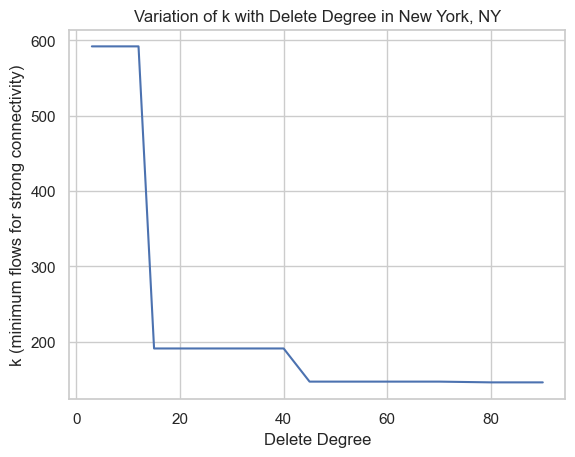

2 Los Angeles, CA
Number of nodes to remove:  0
nodes of the largest strongly connected graph for city: 2464
106
Number of nodes to remove:  0
nodes of the largest strongly connected graph for city: 2464
106
Number of nodes to remove:  0
nodes of the largest strongly connected graph for city: 2464
106
Number of nodes to remove:  0
nodes of the largest strongly connected graph for city: 2464
106
Number of nodes to remove:  0
nodes of the largest strongly connected graph for city: 2464
106
Number of nodes to remove:  0
nodes of the largest strongly connected graph for city: 2464
106
Number of nodes to remove:  0
nodes of the largest strongly connected graph for city: 2464
106
Number of nodes to remove:  2
nodes of the largest strongly connected graph for city: 2462
106
Number of nodes to remove:  10
nodes of the largest strongly connected graph for city: 2454
106
Number of nodes to remove:  16
nodes of the largest strongly connected graph for city: 2448
106
Number of nodes to remove:  25

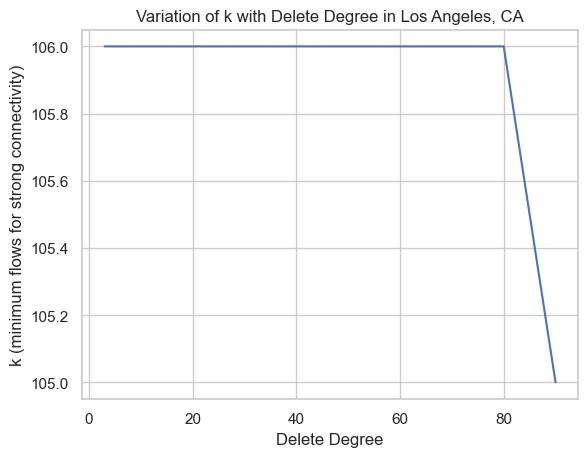

3 Chicago, IL
Number of nodes to remove:  0
nodes of the largest strongly connected graph for city: 2131
307
Number of nodes to remove:  0
nodes of the largest strongly connected graph for city: 2131
307
Number of nodes to remove:  0
nodes of the largest strongly connected graph for city: 2131
307
Number of nodes to remove:  0
nodes of the largest strongly connected graph for city: 2131
307
Number of nodes to remove:  0
nodes of the largest strongly connected graph for city: 2131
307
Number of nodes to remove:  3
nodes of the largest strongly connected graph for city: 2128
307
Number of nodes to remove:  3
nodes of the largest strongly connected graph for city: 2128
307
Number of nodes to remove:  4
nodes of the largest strongly connected graph for city: 2127
307
Number of nodes to remove:  13
nodes of the largest strongly connected graph for city: 2118
307
Number of nodes to remove:  27
nodes of the largest strongly connected graph for city: 2104
307
Number of nodes to remove:  50
nod

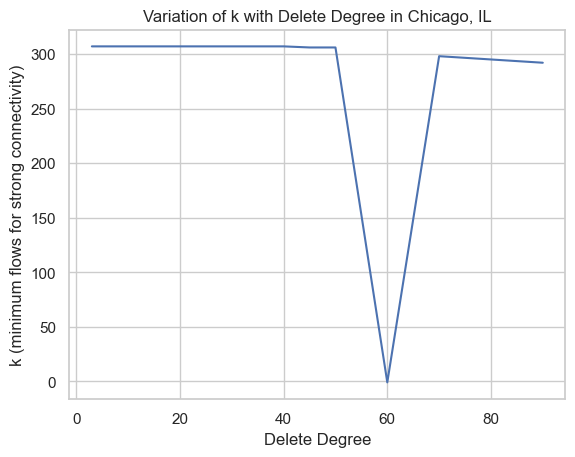

4 Houston, TX
Number of nodes to remove:  0
nodes of the largest strongly connected graph for city: 1536
146
Number of nodes to remove:  0
nodes of the largest strongly connected graph for city: 1536
146
Number of nodes to remove:  0
nodes of the largest strongly connected graph for city: 1536
146
Number of nodes to remove:  0
nodes of the largest strongly connected graph for city: 1536
146
Number of nodes to remove:  0
nodes of the largest strongly connected graph for city: 1536
146
Number of nodes to remove:  0
nodes of the largest strongly connected graph for city: 1536
146
Number of nodes to remove:  0
nodes of the largest strongly connected graph for city: 1536
146
Number of nodes to remove:  0
nodes of the largest strongly connected graph for city: 1536
146
Number of nodes to remove:  0
nodes of the largest strongly connected graph for city: 1536
146
Number of nodes to remove:  1
nodes of the largest strongly connected graph for city: 1535
146
Number of nodes to remove:  2
nodes 

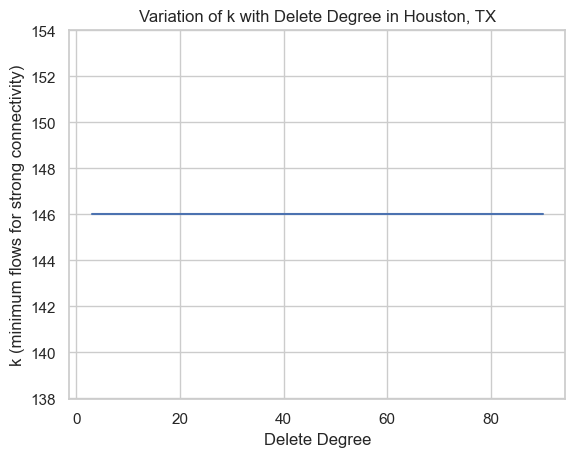

5 Phoenix, AZ
Number of nodes to remove:  0
nodes of the largest strongly connected graph for city: 945
164
Number of nodes to remove:  0
nodes of the largest strongly connected graph for city: 945
164
Number of nodes to remove:  0
nodes of the largest strongly connected graph for city: 945
164
Number of nodes to remove:  0
nodes of the largest strongly connected graph for city: 945
164
Number of nodes to remove:  0
nodes of the largest strongly connected graph for city: 945
164
Number of nodes to remove:  0
nodes of the largest strongly connected graph for city: 945
164
Number of nodes to remove:  0
nodes of the largest strongly connected graph for city: 945
164
Number of nodes to remove:  0
nodes of the largest strongly connected graph for city: 945
164
Number of nodes to remove:  0
nodes of the largest strongly connected graph for city: 945
164
Number of nodes to remove:  2
nodes of the largest strongly connected graph for city: 943
164
Number of nodes to remove:  6
nodes of the lar

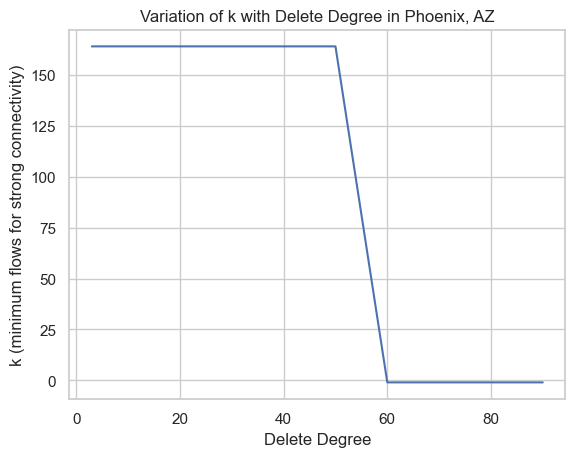

6 Philadelphia, PA
Number of nodes to remove:  0
nodes of the largest strongly connected graph for city: 1305
138
Number of nodes to remove:  0
nodes of the largest strongly connected graph for city: 1305
138
Number of nodes to remove:  0
nodes of the largest strongly connected graph for city: 1305
138
Number of nodes to remove:  0
nodes of the largest strongly connected graph for city: 1305
138
Number of nodes to remove:  0
nodes of the largest strongly connected graph for city: 1305
138
Number of nodes to remove:  0
nodes of the largest strongly connected graph for city: 1305
138
Number of nodes to remove:  0
nodes of the largest strongly connected graph for city: 1305
138
Number of nodes to remove:  1
nodes of the largest strongly connected graph for city: 1304
138
Number of nodes to remove:  1
nodes of the largest strongly connected graph for city: 1304
138
Number of nodes to remove:  4
nodes of the largest strongly connected graph for city: 1301
138
Number of nodes to remove:  9
n

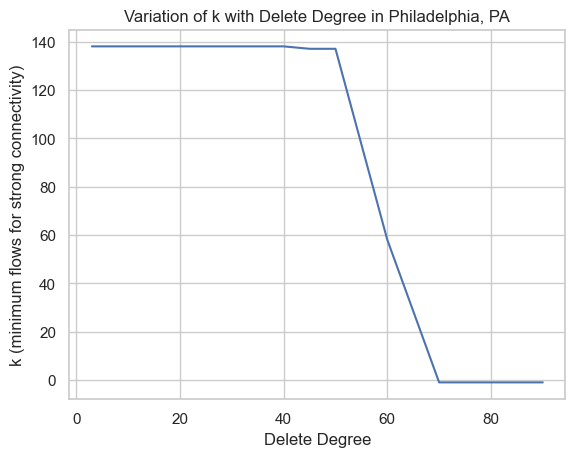

7 San Antonio, TX
Number of nodes to remove:  0
nodes of the largest strongly connected graph for city: 905
194
Number of nodes to remove:  0
nodes of the largest strongly connected graph for city: 905
194
Number of nodes to remove:  0
nodes of the largest strongly connected graph for city: 905
194
Number of nodes to remove:  0
nodes of the largest strongly connected graph for city: 905
194
Number of nodes to remove:  0
nodes of the largest strongly connected graph for city: 905
194
Number of nodes to remove:  0
nodes of the largest strongly connected graph for city: 905
194
Number of nodes to remove:  0
nodes of the largest strongly connected graph for city: 905
194
Number of nodes to remove:  0
nodes of the largest strongly connected graph for city: 905
194
Number of nodes to remove:  1
nodes of the largest strongly connected graph for city: 904
194
Number of nodes to remove:  1
nodes of the largest strongly connected graph for city: 904
194
Number of nodes to remove:  2
nodes of the

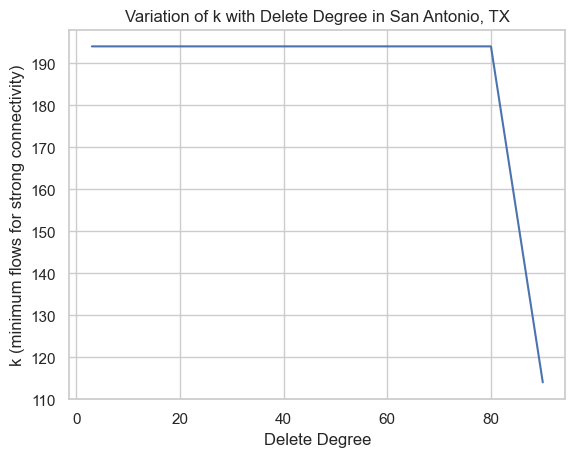

8 San Diego, CA
Number of nodes to remove:  0
nodes of the largest strongly connected graph for city: 812
150
Number of nodes to remove:  0
nodes of the largest strongly connected graph for city: 812
150
Number of nodes to remove:  0
nodes of the largest strongly connected graph for city: 812
150
Number of nodes to remove:  0
nodes of the largest strongly connected graph for city: 812
150
Number of nodes to remove:  0
nodes of the largest strongly connected graph for city: 812
150
Number of nodes to remove:  0
nodes of the largest strongly connected graph for city: 812
150
Number of nodes to remove:  0
nodes of the largest strongly connected graph for city: 812
150
Number of nodes to remove:  1
nodes of the largest strongly connected graph for city: 811
150
Number of nodes to remove:  1
nodes of the largest strongly connected graph for city: 811
150
Number of nodes to remove:  3
nodes of the largest strongly connected graph for city: 809
150
Number of nodes to remove:  6
nodes of the l

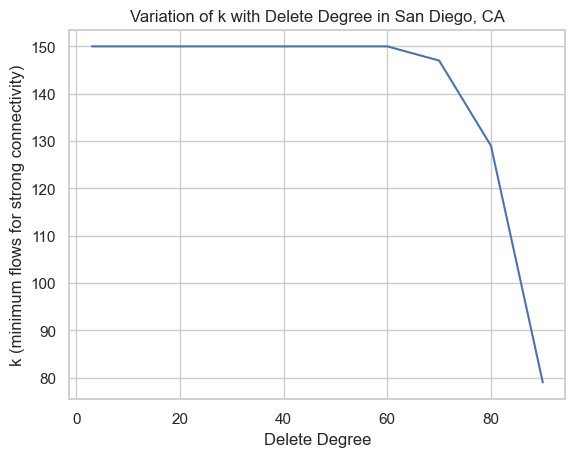

9 Dallas, TX
Number of nodes to remove:  0
nodes of the largest strongly connected graph for city: 905
188
Number of nodes to remove:  0
nodes of the largest strongly connected graph for city: 905
188
Number of nodes to remove:  0
nodes of the largest strongly connected graph for city: 905
188
Number of nodes to remove:  0
nodes of the largest strongly connected graph for city: 905
188
Number of nodes to remove:  1
nodes of the largest strongly connected graph for city: 904
188
Number of nodes to remove:  2
nodes of the largest strongly connected graph for city: 903
188
Number of nodes to remove:  2
nodes of the largest strongly connected graph for city: 903
188
Number of nodes to remove:  2
nodes of the largest strongly connected graph for city: 903
188
Number of nodes to remove:  3
nodes of the largest strongly connected graph for city: 902
188
Number of nodes to remove:  8
nodes of the largest strongly connected graph for city: 897
188
Number of nodes to remove:  15
nodes of the lar

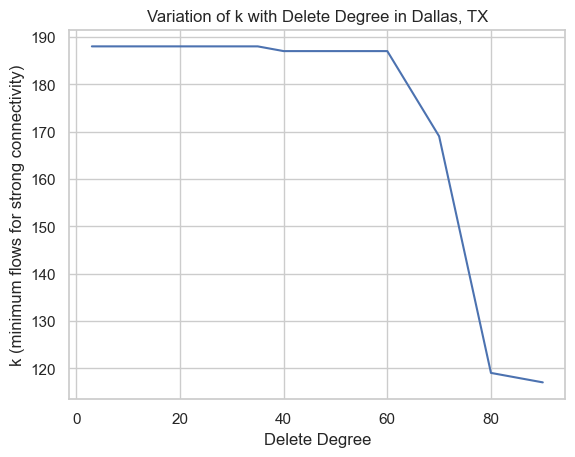

10 San Jose, CA
Number of nodes to remove:  0
nodes of the largest strongly connected graph for city: 563
67
Number of nodes to remove:  0
nodes of the largest strongly connected graph for city: 563
67
Number of nodes to remove:  0
nodes of the largest strongly connected graph for city: 563
67
Number of nodes to remove:  0
nodes of the largest strongly connected graph for city: 563
67
Number of nodes to remove:  0
nodes of the largest strongly connected graph for city: 563
67
Number of nodes to remove:  0
nodes of the largest strongly connected graph for city: 563
67
Number of nodes to remove:  0
nodes of the largest strongly connected graph for city: 563
67
Number of nodes to remove:  0
nodes of the largest strongly connected graph for city: 563
67
Number of nodes to remove:  2
nodes of the largest strongly connected graph for city: 561
67
Number of nodes to remove:  3
nodes of the largest strongly connected graph for city: 560
67
Number of nodes to remove:  3
nodes of the largest str

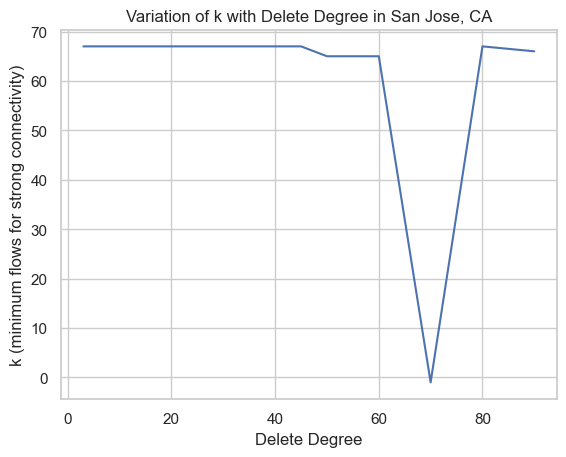

1 New York, NY
Number of nodes to remove:  0
nodes of the largest strongly connected graph for city: 6124
507
Number of nodes to remove:  0
nodes of the largest strongly connected graph for city: 6124
507
Number of nodes to remove:  4
nodes of the largest strongly connected graph for city: 6120
507
Number of nodes to remove:  6
nodes of the largest strongly connected graph for city: 6118
507
Number of nodes to remove:  12
nodes of the largest strongly connected graph for city: 6112
507
Number of nodes to remove:  13
nodes of the largest strongly connected graph for city: 6111
507
Number of nodes to remove:  15
nodes of the largest strongly connected graph for city: 6109
507
Number of nodes to remove:  18
nodes of the largest strongly connected graph for city: 6106
507
Number of nodes to remove:  24
nodes of the largest strongly connected graph for city: 6100
507
Number of nodes to remove:  28
nodes of the largest strongly connected graph for city: 6096
507
Number of nodes to remove:  3

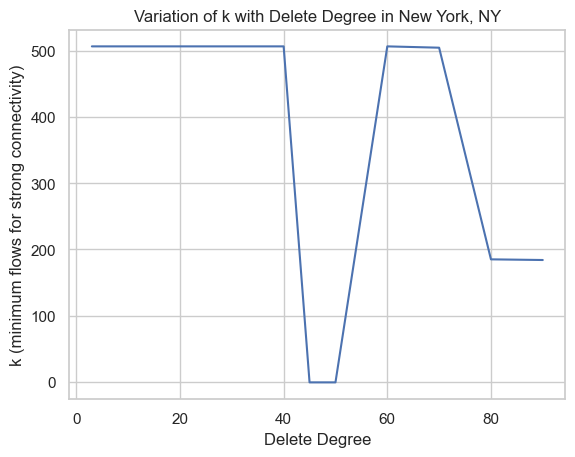

2 Los Angeles, CA
Number of nodes to remove:  0
nodes of the largest strongly connected graph for city: 2468
251
Number of nodes to remove:  0
nodes of the largest strongly connected graph for city: 2468
251
Number of nodes to remove:  0
nodes of the largest strongly connected graph for city: 2468
251
Number of nodes to remove:  1
nodes of the largest strongly connected graph for city: 2467
251
Number of nodes to remove:  1
nodes of the largest strongly connected graph for city: 2467
251
Number of nodes to remove:  1
nodes of the largest strongly connected graph for city: 2467
251
Number of nodes to remove:  1
nodes of the largest strongly connected graph for city: 2467
251
Number of nodes to remove:  6
nodes of the largest strongly connected graph for city: 2462
251
Number of nodes to remove:  12
nodes of the largest strongly connected graph for city: 2456
251
Number of nodes to remove:  18
nodes of the largest strongly connected graph for city: 2450
251
Number of nodes to remove:  23

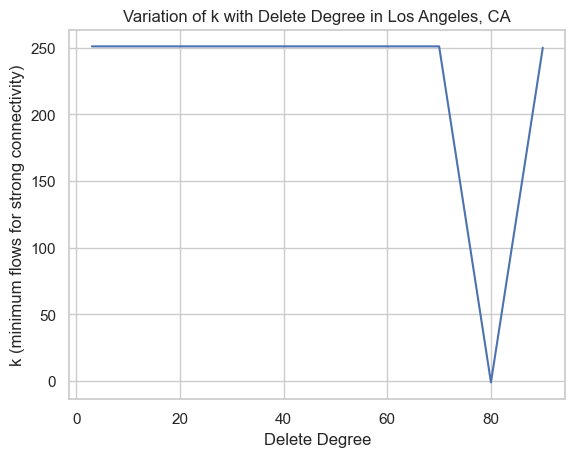

3 Chicago, IL
Number of nodes to remove:  0
nodes of the largest strongly connected graph for city: 2133
118
Number of nodes to remove:  0
nodes of the largest strongly connected graph for city: 2133
118
Number of nodes to remove:  1
nodes of the largest strongly connected graph for city: 2132
118
Number of nodes to remove:  1
nodes of the largest strongly connected graph for city: 2132
118
Number of nodes to remove:  1
nodes of the largest strongly connected graph for city: 2132
118
Number of nodes to remove:  2
nodes of the largest strongly connected graph for city: 2131
118
Number of nodes to remove:  2
nodes of the largest strongly connected graph for city: 2131
118
Number of nodes to remove:  6
nodes of the largest strongly connected graph for city: 2127
118
Number of nodes to remove:  12
nodes of the largest strongly connected graph for city: 2121
86
Number of nodes to remove:  30
nodes of the largest strongly connected graph for city: 2103
86
Number of nodes to remove:  52
nodes

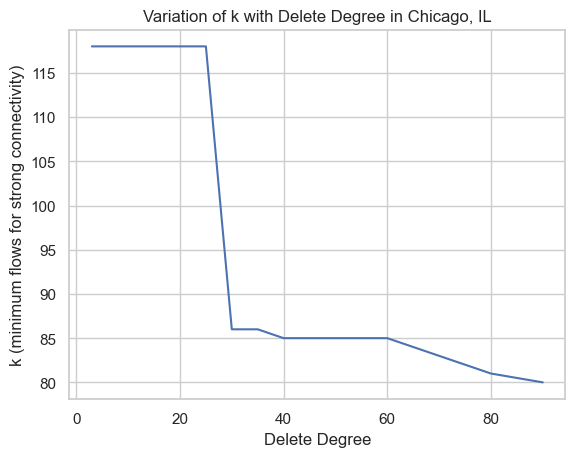

4 Houston, TX
Number of nodes to remove:  0
nodes of the largest strongly connected graph for city: 1539
385
Number of nodes to remove:  0
nodes of the largest strongly connected graph for city: 1539
385
Number of nodes to remove:  0
nodes of the largest strongly connected graph for city: 1539
385
Number of nodes to remove:  0
nodes of the largest strongly connected graph for city: 1539
385
Number of nodes to remove:  0
nodes of the largest strongly connected graph for city: 1539
385
Number of nodes to remove:  0
nodes of the largest strongly connected graph for city: 1539
385
Number of nodes to remove:  0
nodes of the largest strongly connected graph for city: 1539
385
Number of nodes to remove:  0
nodes of the largest strongly connected graph for city: 1539
385
Number of nodes to remove:  0
nodes of the largest strongly connected graph for city: 1539
385
Number of nodes to remove:  1
nodes of the largest strongly connected graph for city: 1538
385
Number of nodes to remove:  3
nodes 

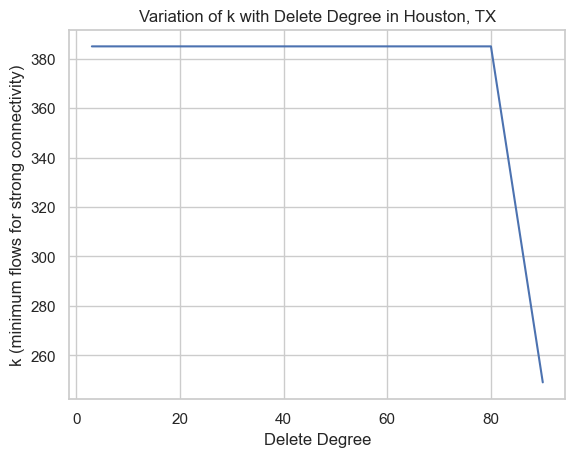

5 Phoenix, AZ
Number of nodes to remove:  0
nodes of the largest strongly connected graph for city: 943
183
Number of nodes to remove:  0
nodes of the largest strongly connected graph for city: 943
183
Number of nodes to remove:  0
nodes of the largest strongly connected graph for city: 943
183
Number of nodes to remove:  0
nodes of the largest strongly connected graph for city: 943
183
Number of nodes to remove:  0
nodes of the largest strongly connected graph for city: 943
183
Number of nodes to remove:  0
nodes of the largest strongly connected graph for city: 943
183
Number of nodes to remove:  0
nodes of the largest strongly connected graph for city: 943
183
Number of nodes to remove:  0
nodes of the largest strongly connected graph for city: 943
183
Number of nodes to remove:  1
nodes of the largest strongly connected graph for city: 942
183
Number of nodes to remove:  1
nodes of the largest strongly connected graph for city: 942
183
Number of nodes to remove:  3
nodes of the lar

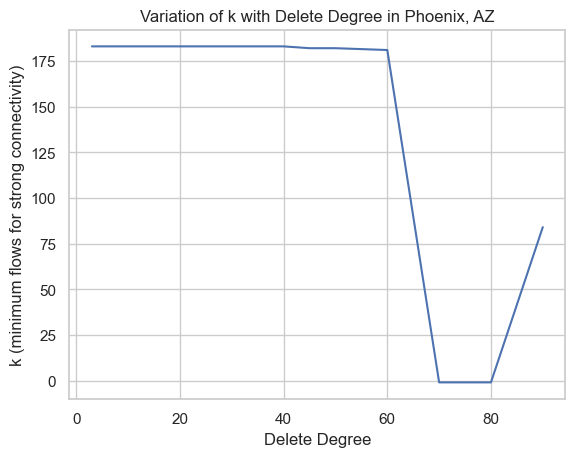

6 Philadelphia, PA
Number of nodes to remove:  0
nodes of the largest strongly connected graph for city: 1301
189
Number of nodes to remove:  0
nodes of the largest strongly connected graph for city: 1301
189
Number of nodes to remove:  0
nodes of the largest strongly connected graph for city: 1301
189
Number of nodes to remove:  0
nodes of the largest strongly connected graph for city: 1301
189
Number of nodes to remove:  0
nodes of the largest strongly connected graph for city: 1301
189
Number of nodes to remove:  0
nodes of the largest strongly connected graph for city: 1301
189
Number of nodes to remove:  0
nodes of the largest strongly connected graph for city: 1301
189
Number of nodes to remove:  0
nodes of the largest strongly connected graph for city: 1301
189
Number of nodes to remove:  0
nodes of the largest strongly connected graph for city: 1301
189
Number of nodes to remove:  3
nodes of the largest strongly connected graph for city: 1298
189
Number of nodes to remove:  15


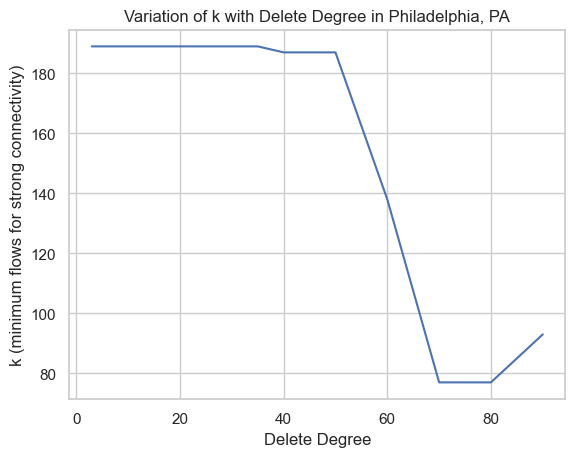

7 San Antonio, TX
Number of nodes to remove:  0
nodes of the largest strongly connected graph for city: 905
163
Number of nodes to remove:  0
nodes of the largest strongly connected graph for city: 905
163
Number of nodes to remove:  0
nodes of the largest strongly connected graph for city: 905
163
Number of nodes to remove:  0
nodes of the largest strongly connected graph for city: 905
163
Number of nodes to remove:  0
nodes of the largest strongly connected graph for city: 905
163
Number of nodes to remove:  0
nodes of the largest strongly connected graph for city: 905
163
Number of nodes to remove:  0
nodes of the largest strongly connected graph for city: 905
163
Number of nodes to remove:  0
nodes of the largest strongly connected graph for city: 905
163
Number of nodes to remove:  1
nodes of the largest strongly connected graph for city: 904
163
Number of nodes to remove:  2
nodes of the largest strongly connected graph for city: 903
163
Number of nodes to remove:  2
nodes of the

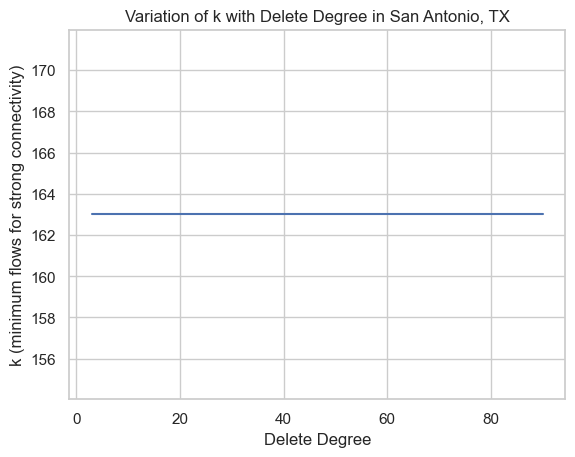

8 San Diego, CA
Number of nodes to remove:  0
nodes of the largest strongly connected graph for city: 815
132
Number of nodes to remove:  0
nodes of the largest strongly connected graph for city: 815
132
Number of nodes to remove:  0
nodes of the largest strongly connected graph for city: 815
132
Number of nodes to remove:  0
nodes of the largest strongly connected graph for city: 815
132
Number of nodes to remove:  0
nodes of the largest strongly connected graph for city: 815
132
Number of nodes to remove:  0
nodes of the largest strongly connected graph for city: 815
132
Number of nodes to remove:  0
nodes of the largest strongly connected graph for city: 815
132
Number of nodes to remove:  0
nodes of the largest strongly connected graph for city: 815
132
Number of nodes to remove:  1
nodes of the largest strongly connected graph for city: 814
132
Number of nodes to remove:  1
nodes of the largest strongly connected graph for city: 814
132
Number of nodes to remove:  6
nodes of the l

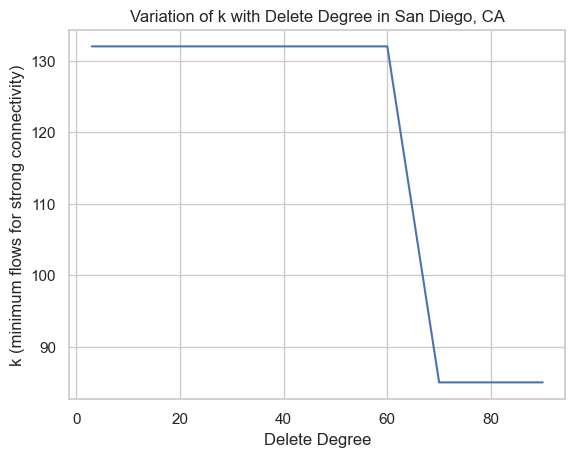

9 Dallas, TX
Number of nodes to remove:  0
nodes of the largest strongly connected graph for city: 901
155
Number of nodes to remove:  0
nodes of the largest strongly connected graph for city: 901
155
Number of nodes to remove:  0
nodes of the largest strongly connected graph for city: 901
155
Number of nodes to remove:  0
nodes of the largest strongly connected graph for city: 901
155
Number of nodes to remove:  0
nodes of the largest strongly connected graph for city: 901
155
Number of nodes to remove:  0
nodes of the largest strongly connected graph for city: 901
155
Number of nodes to remove:  0
nodes of the largest strongly connected graph for city: 901
155
Number of nodes to remove:  1
nodes of the largest strongly connected graph for city: 900
155
Number of nodes to remove:  3
nodes of the largest strongly connected graph for city: 898
155
Number of nodes to remove:  4
nodes of the largest strongly connected graph for city: 897
155
Number of nodes to remove:  9
nodes of the larg

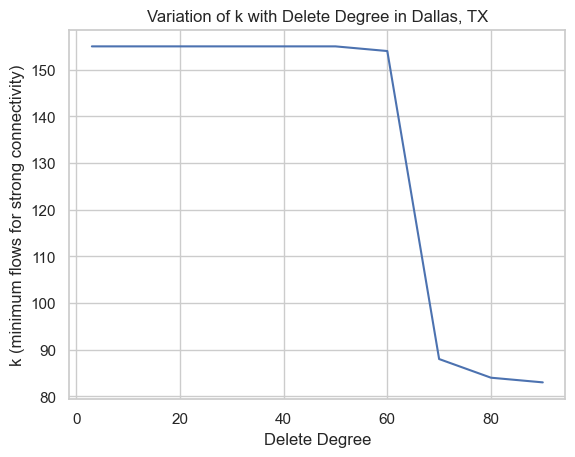

10 San Jose, CA
Number of nodes to remove:  0
nodes of the largest strongly connected graph for city: 565
110
Number of nodes to remove:  0
nodes of the largest strongly connected graph for city: 565
110
Number of nodes to remove:  0
nodes of the largest strongly connected graph for city: 565
110
Number of nodes to remove:  0
nodes of the largest strongly connected graph for city: 565
110
Number of nodes to remove:  0
nodes of the largest strongly connected graph for city: 565
110
Number of nodes to remove:  0
nodes of the largest strongly connected graph for city: 565
110
Number of nodes to remove:  0
nodes of the largest strongly connected graph for city: 565
110
Number of nodes to remove:  0
nodes of the largest strongly connected graph for city: 565
110
Number of nodes to remove:  1
nodes of the largest strongly connected graph for city: 564
110
Number of nodes to remove:  2
nodes of the largest strongly connected graph for city: 563
110
Number of nodes to remove:  8
nodes of the l

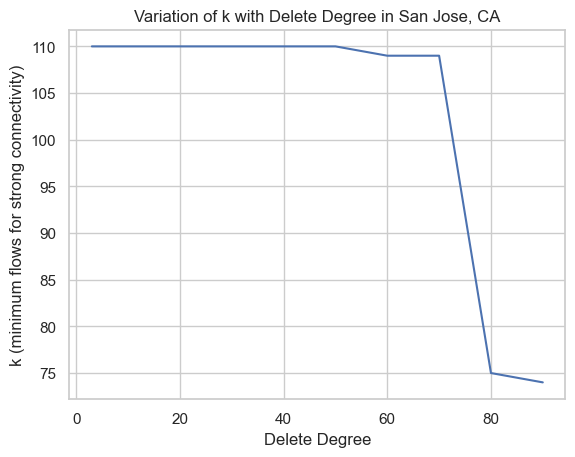

1 New York, NY
Number of nodes to remove:  0
nodes of the largest strongly connected graph for city: 6124
288
Number of nodes to remove:  0
nodes of the largest strongly connected graph for city: 6124
288
Number of nodes to remove:  0
nodes of the largest strongly connected graph for city: 6124
288
Number of nodes to remove:  5
nodes of the largest strongly connected graph for city: 6119
288
Number of nodes to remove:  8
nodes of the largest strongly connected graph for city: 6116
288
Number of nodes to remove:  9
nodes of the largest strongly connected graph for city: 6115
288
Number of nodes to remove:  10
nodes of the largest strongly connected graph for city: 6114
288
Number of nodes to remove:  12
nodes of the largest strongly connected graph for city: 6112
288
Number of nodes to remove:  18
nodes of the largest strongly connected graph for city: 6106
268
Number of nodes to remove:  20
nodes of the largest strongly connected graph for city: 6104
268
Number of nodes to remove:  24


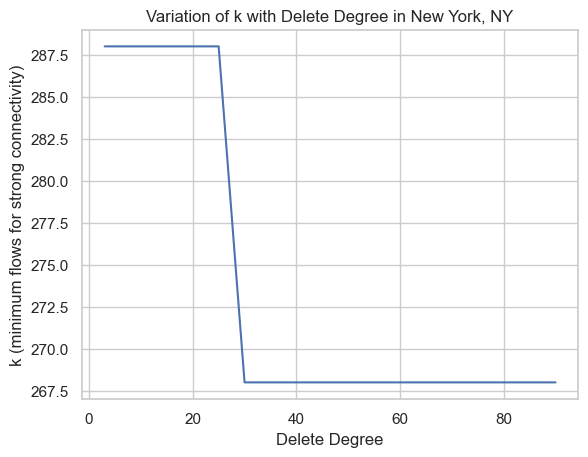

2 Los Angeles, CA
Number of nodes to remove:  0
nodes of the largest strongly connected graph for city: 2466
122
Number of nodes to remove:  0
nodes of the largest strongly connected graph for city: 2466
122
Number of nodes to remove:  0
nodes of the largest strongly connected graph for city: 2466
122
Number of nodes to remove:  0
nodes of the largest strongly connected graph for city: 2466
122
Number of nodes to remove:  0
nodes of the largest strongly connected graph for city: 2466
122
Number of nodes to remove:  0
nodes of the largest strongly connected graph for city: 2466
122
Number of nodes to remove:  0
nodes of the largest strongly connected graph for city: 2466
122
Number of nodes to remove:  1
nodes of the largest strongly connected graph for city: 2465
122
Number of nodes to remove:  5
nodes of the largest strongly connected graph for city: 2461
122
Number of nodes to remove:  8
nodes of the largest strongly connected graph for city: 2458
122
Number of nodes to remove:  12
n

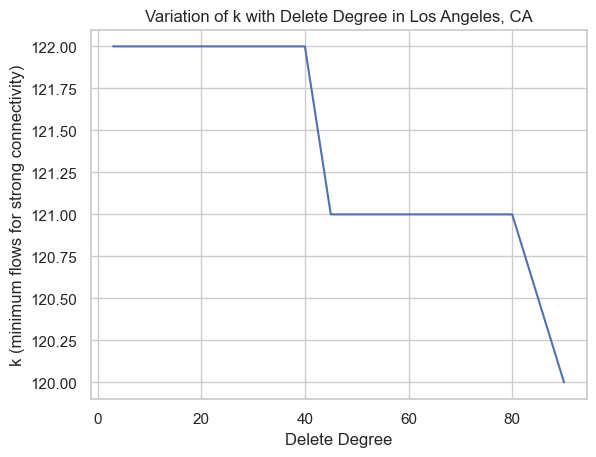

3 Chicago, IL
Number of nodes to remove:  0
nodes of the largest strongly connected graph for city: 2134
88
Number of nodes to remove:  1
nodes of the largest strongly connected graph for city: 2133
88
Number of nodes to remove:  2
nodes of the largest strongly connected graph for city: 2132
88
Number of nodes to remove:  2
nodes of the largest strongly connected graph for city: 2132
88
Number of nodes to remove:  2
nodes of the largest strongly connected graph for city: 2132
88
Number of nodes to remove:  2
nodes of the largest strongly connected graph for city: 2132
88
Number of nodes to remove:  2
nodes of the largest strongly connected graph for city: 2132
88
Number of nodes to remove:  2
nodes of the largest strongly connected graph for city: 2132
88
Number of nodes to remove:  3
nodes of the largest strongly connected graph for city: 2131
88
Number of nodes to remove:  5
nodes of the largest strongly connected graph for city: 2129
88
Number of nodes to remove:  6
nodes of the lar

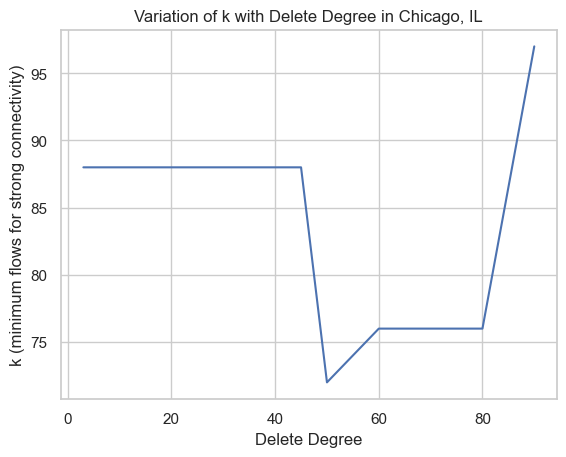

4 Houston, TX
Number of nodes to remove:  0
nodes of the largest strongly connected graph for city: 1536
126
Number of nodes to remove:  0
nodes of the largest strongly connected graph for city: 1536
126
Number of nodes to remove:  0
nodes of the largest strongly connected graph for city: 1536
126
Number of nodes to remove:  0
nodes of the largest strongly connected graph for city: 1536
126
Number of nodes to remove:  0
nodes of the largest strongly connected graph for city: 1536
126
Number of nodes to remove:  0
nodes of the largest strongly connected graph for city: 1536
126
Number of nodes to remove:  0
nodes of the largest strongly connected graph for city: 1536
126
Number of nodes to remove:  0
nodes of the largest strongly connected graph for city: 1536
126
Number of nodes to remove:  0
nodes of the largest strongly connected graph for city: 1536
126
Number of nodes to remove:  0
nodes of the largest strongly connected graph for city: 1536
126
Number of nodes to remove:  0
nodes 

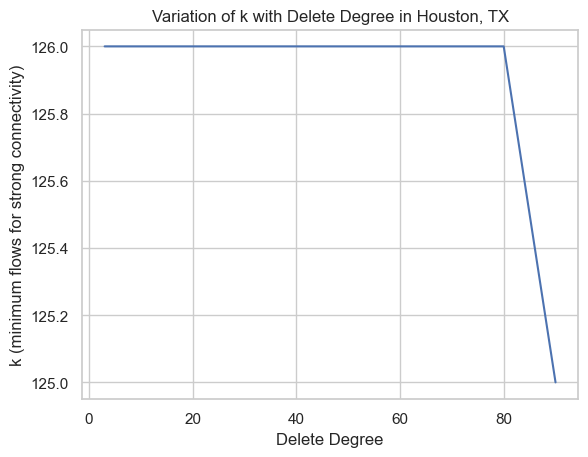

5 Phoenix, AZ
Number of nodes to remove:  0
nodes of the largest strongly connected graph for city: 948
156
Number of nodes to remove:  0
nodes of the largest strongly connected graph for city: 948
156
Number of nodes to remove:  0
nodes of the largest strongly connected graph for city: 948
156
Number of nodes to remove:  0
nodes of the largest strongly connected graph for city: 948
156
Number of nodes to remove:  0
nodes of the largest strongly connected graph for city: 948
156
Number of nodes to remove:  0
nodes of the largest strongly connected graph for city: 948
156
Number of nodes to remove:  0
nodes of the largest strongly connected graph for city: 948
156
Number of nodes to remove:  0
nodes of the largest strongly connected graph for city: 948
156
Number of nodes to remove:  0
nodes of the largest strongly connected graph for city: 948
156
Number of nodes to remove:  0
nodes of the largest strongly connected graph for city: 948
156
Number of nodes to remove:  1
nodes of the lar

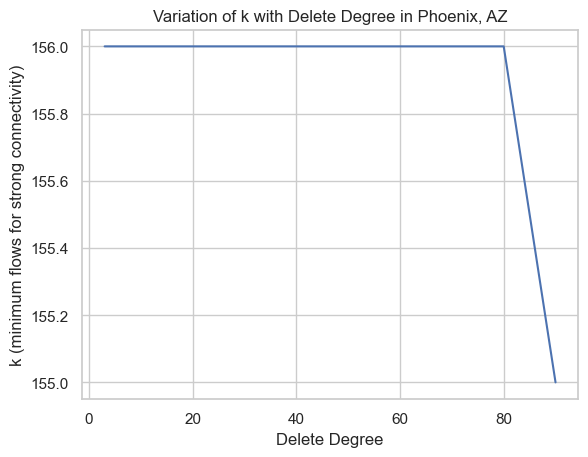

6 Philadelphia, PA
Number of nodes to remove:  0
nodes of the largest strongly connected graph for city: 1302
113
Number of nodes to remove:  0
nodes of the largest strongly connected graph for city: 1302
113
Number of nodes to remove:  0
nodes of the largest strongly connected graph for city: 1302
113
Number of nodes to remove:  0
nodes of the largest strongly connected graph for city: 1302
113
Number of nodes to remove:  0
nodes of the largest strongly connected graph for city: 1302
113
Number of nodes to remove:  0
nodes of the largest strongly connected graph for city: 1302
113
Number of nodes to remove:  0
nodes of the largest strongly connected graph for city: 1302
113
Number of nodes to remove:  0
nodes of the largest strongly connected graph for city: 1302
113
Number of nodes to remove:  0
nodes of the largest strongly connected graph for city: 1302
113
Number of nodes to remove:  0
nodes of the largest strongly connected graph for city: 1302
113
Number of nodes to remove:  1
n

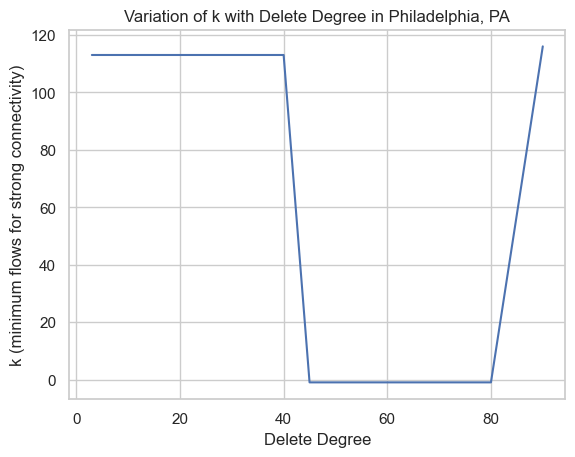

7 San Antonio, TX
Number of nodes to remove:  0
nodes of the largest strongly connected graph for city: 907
225
Number of nodes to remove:  0
nodes of the largest strongly connected graph for city: 907
225
Number of nodes to remove:  1
nodes of the largest strongly connected graph for city: 906
225
Number of nodes to remove:  1
nodes of the largest strongly connected graph for city: 906
225
Number of nodes to remove:  1
nodes of the largest strongly connected graph for city: 906
225
Number of nodes to remove:  1
nodes of the largest strongly connected graph for city: 906
225
Number of nodes to remove:  1
nodes of the largest strongly connected graph for city: 906
225
Number of nodes to remove:  1
nodes of the largest strongly connected graph for city: 906
225
Number of nodes to remove:  1
nodes of the largest strongly connected graph for city: 906
225
Number of nodes to remove:  1
nodes of the largest strongly connected graph for city: 906
225
Number of nodes to remove:  1
nodes of the

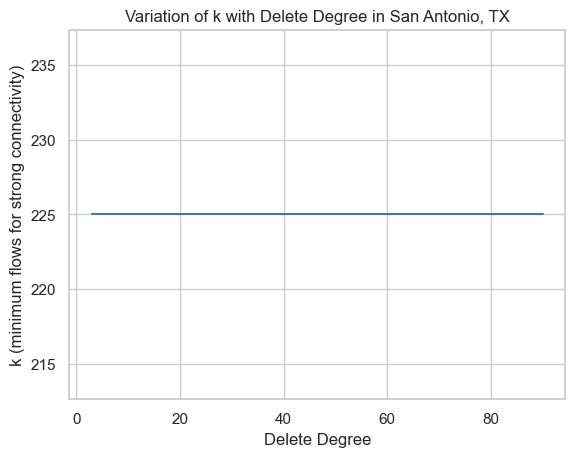

8 San Diego, CA
Number of nodes to remove:  0
nodes of the largest strongly connected graph for city: 813
190
Number of nodes to remove:  0
nodes of the largest strongly connected graph for city: 813
190
Number of nodes to remove:  0
nodes of the largest strongly connected graph for city: 813
190
Number of nodes to remove:  0
nodes of the largest strongly connected graph for city: 813
190
Number of nodes to remove:  0
nodes of the largest strongly connected graph for city: 813
190
Number of nodes to remove:  0
nodes of the largest strongly connected graph for city: 813
190
Number of nodes to remove:  0
nodes of the largest strongly connected graph for city: 813
190
Number of nodes to remove:  0
nodes of the largest strongly connected graph for city: 813
190
Number of nodes to remove:  0
nodes of the largest strongly connected graph for city: 813
190
Number of nodes to remove:  1
nodes of the largest strongly connected graph for city: 812
190
Number of nodes to remove:  2
nodes of the l

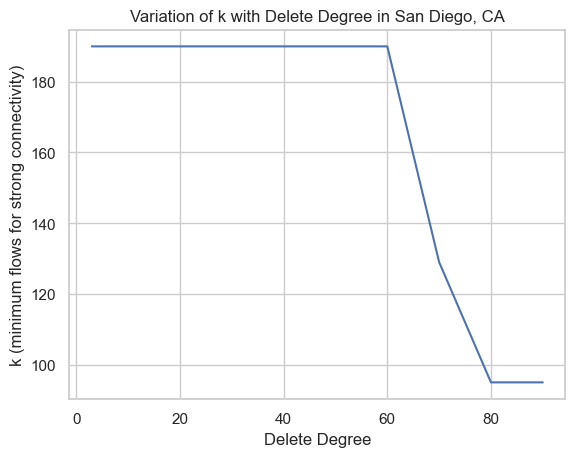

9 Dallas, TX
Number of nodes to remove:  0
nodes of the largest strongly connected graph for city: 906
179
Number of nodes to remove:  0
nodes of the largest strongly connected graph for city: 906
179
Number of nodes to remove:  0
nodes of the largest strongly connected graph for city: 906
179
Number of nodes to remove:  0
nodes of the largest strongly connected graph for city: 906
179
Number of nodes to remove:  0
nodes of the largest strongly connected graph for city: 906
179
Number of nodes to remove:  1
nodes of the largest strongly connected graph for city: 905
179
Number of nodes to remove:  1
nodes of the largest strongly connected graph for city: 905
179
Number of nodes to remove:  1
nodes of the largest strongly connected graph for city: 905
179
Number of nodes to remove:  1
nodes of the largest strongly connected graph for city: 905
179
Number of nodes to remove:  1
nodes of the largest strongly connected graph for city: 905
179
Number of nodes to remove:  1
nodes of the larg

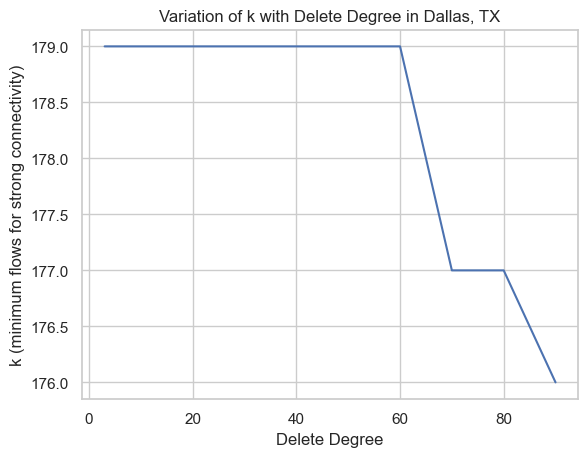

10 San Jose, CA
Number of nodes to remove:  0
nodes of the largest strongly connected graph for city: 564
95
Number of nodes to remove:  0
nodes of the largest strongly connected graph for city: 564
95
Number of nodes to remove:  0
nodes of the largest strongly connected graph for city: 564
95
Number of nodes to remove:  0
nodes of the largest strongly connected graph for city: 564
95
Number of nodes to remove:  0
nodes of the largest strongly connected graph for city: 564
95
Number of nodes to remove:  0
nodes of the largest strongly connected graph for city: 564
95
Number of nodes to remove:  0
nodes of the largest strongly connected graph for city: 564
95
Number of nodes to remove:  0
nodes of the largest strongly connected graph for city: 564
95
Number of nodes to remove:  0
nodes of the largest strongly connected graph for city: 564
95
Number of nodes to remove:  1
nodes of the largest strongly connected graph for city: 563
95
Number of nodes to remove:  2
nodes of the largest str

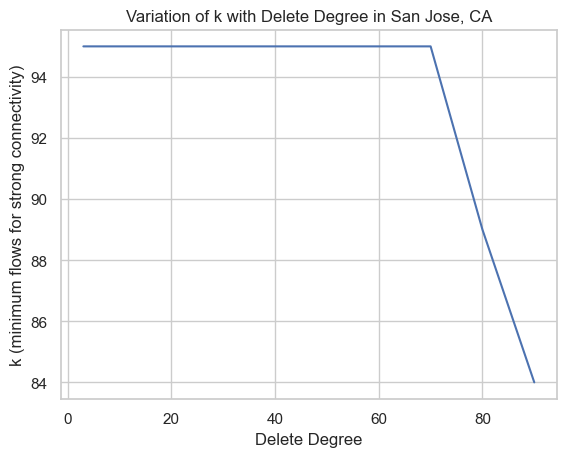

1 New York, NY
Number of nodes to remove:  0
nodes of the largest strongly connected graph for city: 6127
257
Number of nodes to remove:  0
nodes of the largest strongly connected graph for city: 6127
257
Number of nodes to remove:  2
nodes of the largest strongly connected graph for city: 6125
257
Number of nodes to remove:  4
nodes of the largest strongly connected graph for city: 6123
257
Number of nodes to remove:  8
nodes of the largest strongly connected graph for city: 6119
257
Number of nodes to remove:  9
nodes of the largest strongly connected graph for city: 6118
257
Number of nodes to remove:  9
nodes of the largest strongly connected graph for city: 6118
257
Number of nodes to remove:  10
nodes of the largest strongly connected graph for city: 6117
257
Number of nodes to remove:  12
nodes of the largest strongly connected graph for city: 6115
257
Number of nodes to remove:  15
nodes of the largest strongly connected graph for city: 6112
257
Number of nodes to remove:  16
n

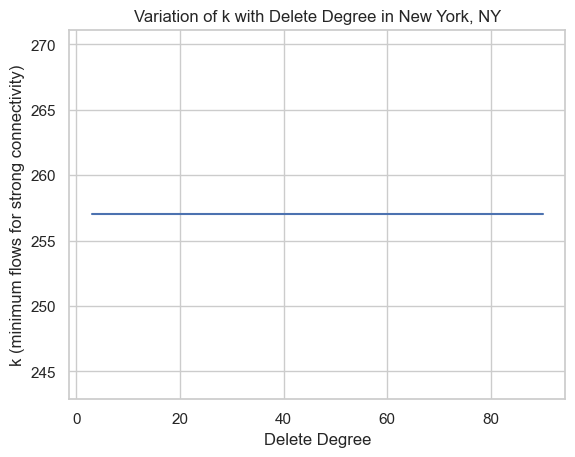

2 Los Angeles, CA
Number of nodes to remove:  0
nodes of the largest strongly connected graph for city: 2467
166
Number of nodes to remove:  0
nodes of the largest strongly connected graph for city: 2467
166
Number of nodes to remove:  0
nodes of the largest strongly connected graph for city: 2467
166
Number of nodes to remove:  0
nodes of the largest strongly connected graph for city: 2467
166
Number of nodes to remove:  0
nodes of the largest strongly connected graph for city: 2467
166
Number of nodes to remove:  0
nodes of the largest strongly connected graph for city: 2467
166
Number of nodes to remove:  0
nodes of the largest strongly connected graph for city: 2467
166
Number of nodes to remove:  0
nodes of the largest strongly connected graph for city: 2467
166
Number of nodes to remove:  3
nodes of the largest strongly connected graph for city: 2464
166
Number of nodes to remove:  4
nodes of the largest strongly connected graph for city: 2463
166
Number of nodes to remove:  7
no

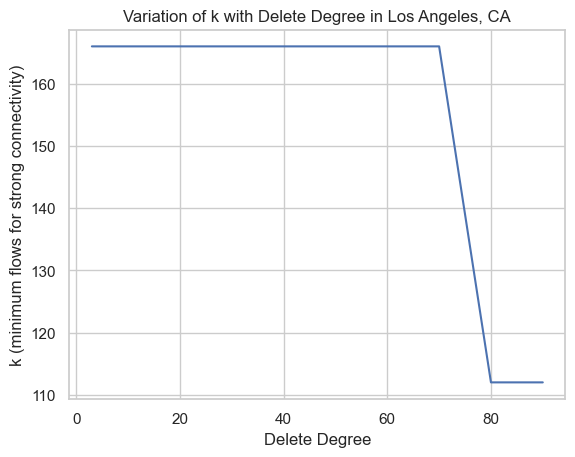

3 Chicago, IL
Number of nodes to remove:  0
nodes of the largest strongly connected graph for city: 2137
159
Number of nodes to remove:  0
nodes of the largest strongly connected graph for city: 2137
159
Number of nodes to remove:  1
nodes of the largest strongly connected graph for city: 2136
159
Number of nodes to remove:  1
nodes of the largest strongly connected graph for city: 2136
159
Number of nodes to remove:  1
nodes of the largest strongly connected graph for city: 2136
159
Number of nodes to remove:  1
nodes of the largest strongly connected graph for city: 2136
159
Number of nodes to remove:  1
nodes of the largest strongly connected graph for city: 2136
159
Number of nodes to remove:  1
nodes of the largest strongly connected graph for city: 2136
159
Number of nodes to remove:  1
nodes of the largest strongly connected graph for city: 2136
159
Number of nodes to remove:  1
nodes of the largest strongly connected graph for city: 2136
159
Number of nodes to remove:  2
nodes 

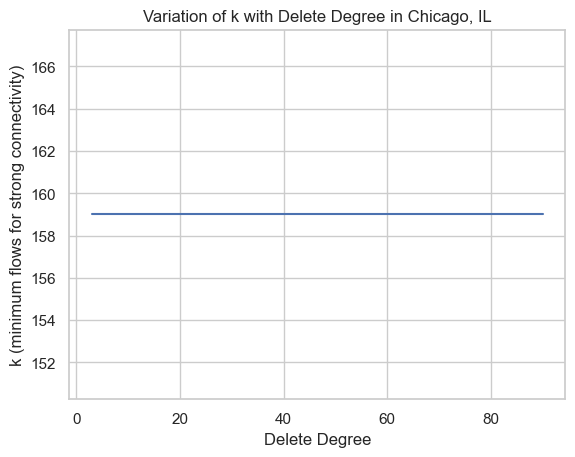

4 Houston, TX
Number of nodes to remove:  0
nodes of the largest strongly connected graph for city: 1538
153
Number of nodes to remove:  0
nodes of the largest strongly connected graph for city: 1538
153
Number of nodes to remove:  0
nodes of the largest strongly connected graph for city: 1538
153
Number of nodes to remove:  0
nodes of the largest strongly connected graph for city: 1538
153
Number of nodes to remove:  0
nodes of the largest strongly connected graph for city: 1538
153
Number of nodes to remove:  0
nodes of the largest strongly connected graph for city: 1538
153
Number of nodes to remove:  0
nodes of the largest strongly connected graph for city: 1538
153
Number of nodes to remove:  0
nodes of the largest strongly connected graph for city: 1538
153
Number of nodes to remove:  0
nodes of the largest strongly connected graph for city: 1538
153
Number of nodes to remove:  0
nodes of the largest strongly connected graph for city: 1538
153
Number of nodes to remove:  1
nodes 

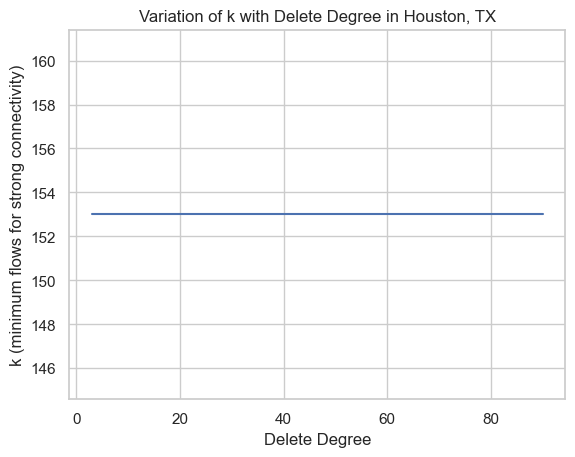

5 Phoenix, AZ
Number of nodes to remove:  0
nodes of the largest strongly connected graph for city: 949
177
Number of nodes to remove:  0
nodes of the largest strongly connected graph for city: 949
177
Number of nodes to remove:  0
nodes of the largest strongly connected graph for city: 949
177
Number of nodes to remove:  0
nodes of the largest strongly connected graph for city: 949
177
Number of nodes to remove:  0
nodes of the largest strongly connected graph for city: 949
177
Number of nodes to remove:  0
nodes of the largest strongly connected graph for city: 949
177
Number of nodes to remove:  0
nodes of the largest strongly connected graph for city: 949
177
Number of nodes to remove:  0
nodes of the largest strongly connected graph for city: 949
177
Number of nodes to remove:  0
nodes of the largest strongly connected graph for city: 949
177
Number of nodes to remove:  0
nodes of the largest strongly connected graph for city: 949
177
Number of nodes to remove:  1
nodes of the lar

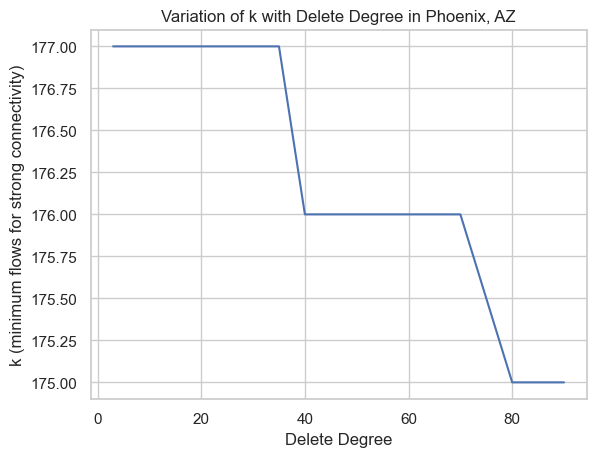

6 Philadelphia, PA
Number of nodes to remove:  0
nodes of the largest strongly connected graph for city: 1304
260
Number of nodes to remove:  0
nodes of the largest strongly connected graph for city: 1304
260
Number of nodes to remove:  0
nodes of the largest strongly connected graph for city: 1304
260
Number of nodes to remove:  0
nodes of the largest strongly connected graph for city: 1304
260
Number of nodes to remove:  0
nodes of the largest strongly connected graph for city: 1304
260
Number of nodes to remove:  0
nodes of the largest strongly connected graph for city: 1304
260
Number of nodes to remove:  0
nodes of the largest strongly connected graph for city: 1304
260
Number of nodes to remove:  0
nodes of the largest strongly connected graph for city: 1304
260
Number of nodes to remove:  0
nodes of the largest strongly connected graph for city: 1304
260
Number of nodes to remove:  0
nodes of the largest strongly connected graph for city: 1304
260
Number of nodes to remove:  0
n

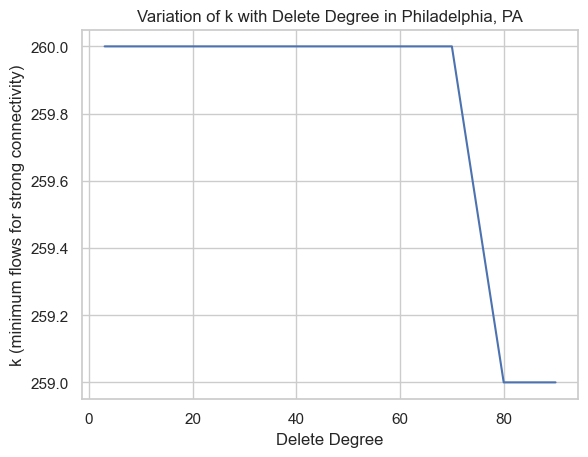

7 San Antonio, TX
Number of nodes to remove:  0
nodes of the largest strongly connected graph for city: 908
303
Number of nodes to remove:  1
nodes of the largest strongly connected graph for city: 907
303
Number of nodes to remove:  1
nodes of the largest strongly connected graph for city: 907
303
Number of nodes to remove:  1
nodes of the largest strongly connected graph for city: 907
303
Number of nodes to remove:  1
nodes of the largest strongly connected graph for city: 907
303
Number of nodes to remove:  1
nodes of the largest strongly connected graph for city: 907
303
Number of nodes to remove:  1
nodes of the largest strongly connected graph for city: 907
303
Number of nodes to remove:  1
nodes of the largest strongly connected graph for city: 907
303
Number of nodes to remove:  1
nodes of the largest strongly connected graph for city: 907
303
Number of nodes to remove:  1
nodes of the largest strongly connected graph for city: 907
303
Number of nodes to remove:  1
nodes of the

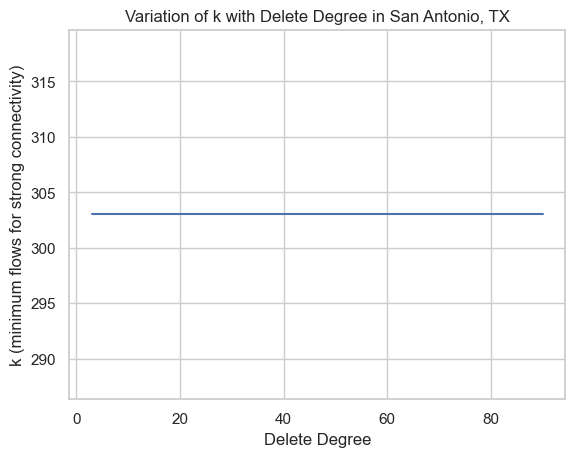

8 San Diego, CA
Number of nodes to remove:  0
nodes of the largest strongly connected graph for city: 818
180
Number of nodes to remove:  0
nodes of the largest strongly connected graph for city: 818
180
Number of nodes to remove:  0
nodes of the largest strongly connected graph for city: 818
180
Number of nodes to remove:  0
nodes of the largest strongly connected graph for city: 818
180
Number of nodes to remove:  0
nodes of the largest strongly connected graph for city: 818
180
Number of nodes to remove:  0
nodes of the largest strongly connected graph for city: 818
180
Number of nodes to remove:  0
nodes of the largest strongly connected graph for city: 818
180
Number of nodes to remove:  1
nodes of the largest strongly connected graph for city: 817
180
Number of nodes to remove:  1
nodes of the largest strongly connected graph for city: 817
180
Number of nodes to remove:  1
nodes of the largest strongly connected graph for city: 817
180
Number of nodes to remove:  1
nodes of the l

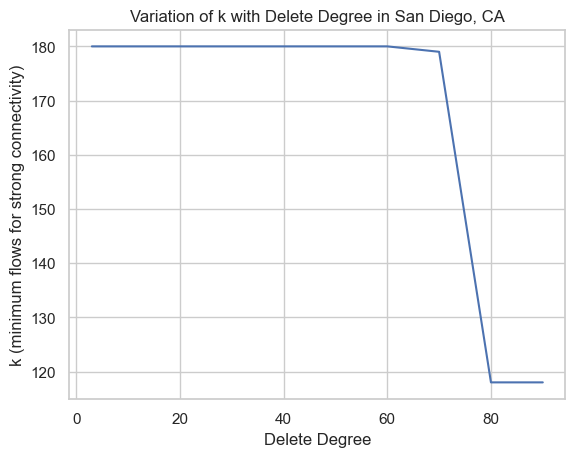

9 Dallas, TX
Number of nodes to remove:  0
nodes of the largest strongly connected graph for city: 909
184
Number of nodes to remove:  0
nodes of the largest strongly connected graph for city: 909
184
Number of nodes to remove:  0
nodes of the largest strongly connected graph for city: 909
184
Number of nodes to remove:  0
nodes of the largest strongly connected graph for city: 909
184
Number of nodes to remove:  0
nodes of the largest strongly connected graph for city: 909
184
Number of nodes to remove:  0
nodes of the largest strongly connected graph for city: 909
184
Number of nodes to remove:  0
nodes of the largest strongly connected graph for city: 909
184
Number of nodes to remove:  0
nodes of the largest strongly connected graph for city: 909
184
Number of nodes to remove:  1
nodes of the largest strongly connected graph for city: 908
184
Number of nodes to remove:  1
nodes of the largest strongly connected graph for city: 908
184
Number of nodes to remove:  1
nodes of the larg

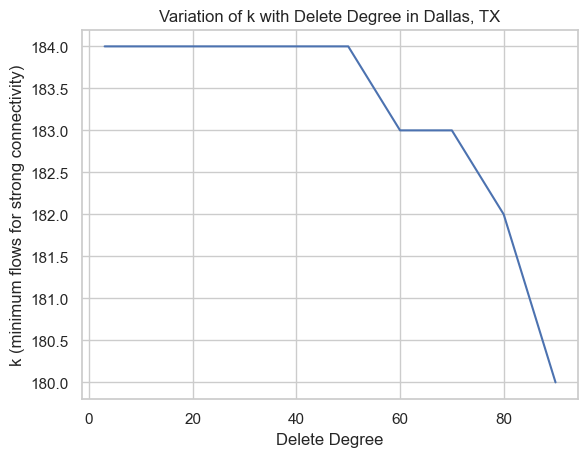

10 San Jose, CA
Number of nodes to remove:  0
nodes of the largest strongly connected graph for city: 564
105
Number of nodes to remove:  0
nodes of the largest strongly connected graph for city: 564
105
Number of nodes to remove:  0
nodes of the largest strongly connected graph for city: 564
105
Number of nodes to remove:  0
nodes of the largest strongly connected graph for city: 564
105
Number of nodes to remove:  0
nodes of the largest strongly connected graph for city: 564
105
Number of nodes to remove:  0
nodes of the largest strongly connected graph for city: 564
105
Number of nodes to remove:  0
nodes of the largest strongly connected graph for city: 564
105
Number of nodes to remove:  0
nodes of the largest strongly connected graph for city: 564
105
Number of nodes to remove:  0
nodes of the largest strongly connected graph for city: 564
105
Number of nodes to remove:  0
nodes of the largest strongly connected graph for city: 564
105
Number of nodes to remove:  2
nodes of the l

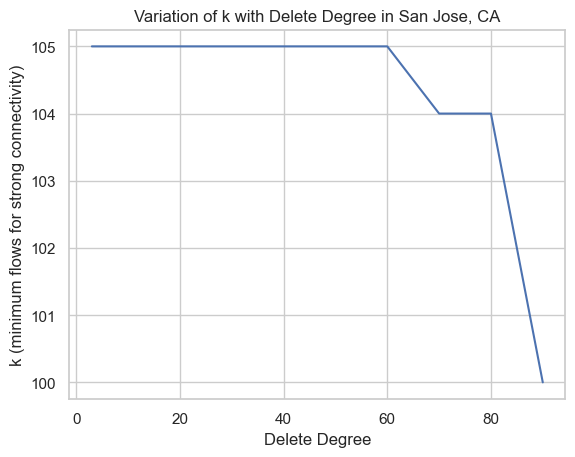

1 New York, NY
Number of nodes to remove:  0
nodes of the largest strongly connected graph for city: 6134
1084
Number of nodes to remove:  2
nodes of the largest strongly connected graph for city: 6132
1084
Number of nodes to remove:  3
nodes of the largest strongly connected graph for city: 6131
1084
Number of nodes to remove:  4
nodes of the largest strongly connected graph for city: 6130
1084
Number of nodes to remove:  4
nodes of the largest strongly connected graph for city: 6130
1084
Number of nodes to remove:  5
nodes of the largest strongly connected graph for city: 6129
1084
Number of nodes to remove:  6
nodes of the largest strongly connected graph for city: 6128
1084
Number of nodes to remove:  10
nodes of the largest strongly connected graph for city: 6124
1084
Number of nodes to remove:  11
nodes of the largest strongly connected graph for city: 6123
1084
Number of nodes to remove:  12
nodes of the largest strongly connected graph for city: 6122
1084
Number of nodes to rem

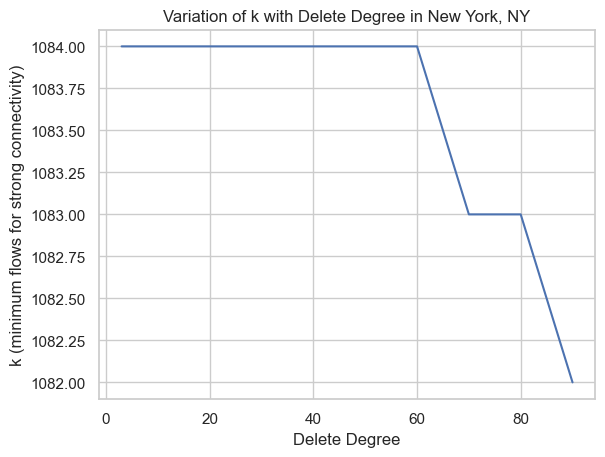

2 Los Angeles, CA
Number of nodes to remove:  0
nodes of the largest strongly connected graph for city: 2470
224
Number of nodes to remove:  0
nodes of the largest strongly connected graph for city: 2470
224
Number of nodes to remove:  0
nodes of the largest strongly connected graph for city: 2470
224
Number of nodes to remove:  0
nodes of the largest strongly connected graph for city: 2470
224
Number of nodes to remove:  1
nodes of the largest strongly connected graph for city: 2469
224
Number of nodes to remove:  1
nodes of the largest strongly connected graph for city: 2469
224
Number of nodes to remove:  1
nodes of the largest strongly connected graph for city: 2469
224
Number of nodes to remove:  2
nodes of the largest strongly connected graph for city: 2468
224
Number of nodes to remove:  2
nodes of the largest strongly connected graph for city: 2468
224
Number of nodes to remove:  4
nodes of the largest strongly connected graph for city: 2466
224
Number of nodes to remove:  6
no

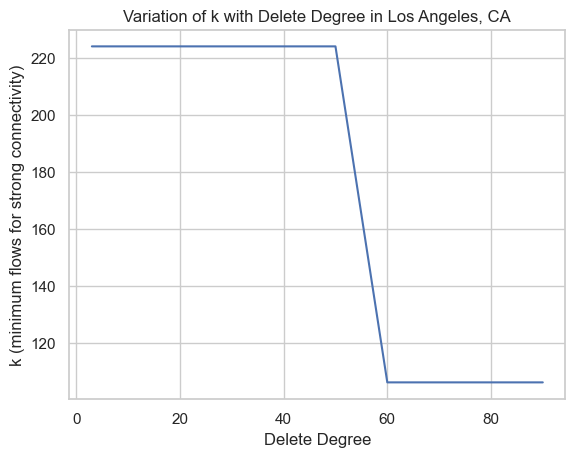

3 Chicago, IL
Number of nodes to remove:  0
nodes of the largest strongly connected graph for city: 2137
103
Number of nodes to remove:  0
nodes of the largest strongly connected graph for city: 2137
103
Number of nodes to remove:  1
nodes of the largest strongly connected graph for city: 2136
103
Number of nodes to remove:  2
nodes of the largest strongly connected graph for city: 2135
103
Number of nodes to remove:  2
nodes of the largest strongly connected graph for city: 2135
103
Number of nodes to remove:  2
nodes of the largest strongly connected graph for city: 2135
103
Number of nodes to remove:  2
nodes of the largest strongly connected graph for city: 2135
103
Number of nodes to remove:  2
nodes of the largest strongly connected graph for city: 2135
103
Number of nodes to remove:  2
nodes of the largest strongly connected graph for city: 2135
103
Number of nodes to remove:  2
nodes of the largest strongly connected graph for city: 2135
103
Number of nodes to remove:  2
nodes 

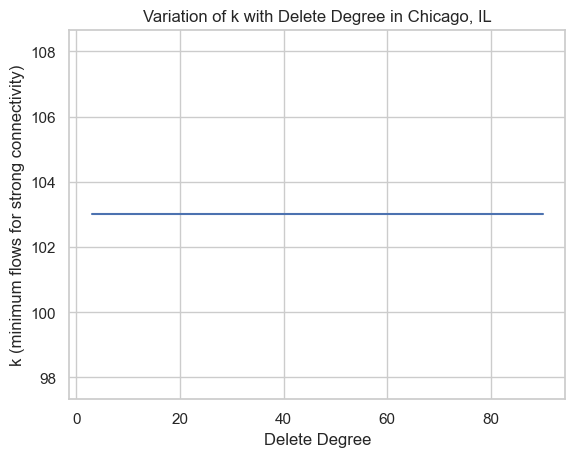

4 Houston, TX
Number of nodes to remove:  0
nodes of the largest strongly connected graph for city: 1538
139
Number of nodes to remove:  0
nodes of the largest strongly connected graph for city: 1538
139
Number of nodes to remove:  0
nodes of the largest strongly connected graph for city: 1538
139
Number of nodes to remove:  0
nodes of the largest strongly connected graph for city: 1538
139
Number of nodes to remove:  0
nodes of the largest strongly connected graph for city: 1538
139
Number of nodes to remove:  0
nodes of the largest strongly connected graph for city: 1538
139
Number of nodes to remove:  0
nodes of the largest strongly connected graph for city: 1538
139
Number of nodes to remove:  0
nodes of the largest strongly connected graph for city: 1538
139
Number of nodes to remove:  0
nodes of the largest strongly connected graph for city: 1538
139
Number of nodes to remove:  0
nodes of the largest strongly connected graph for city: 1538
139
Number of nodes to remove:  0
nodes 

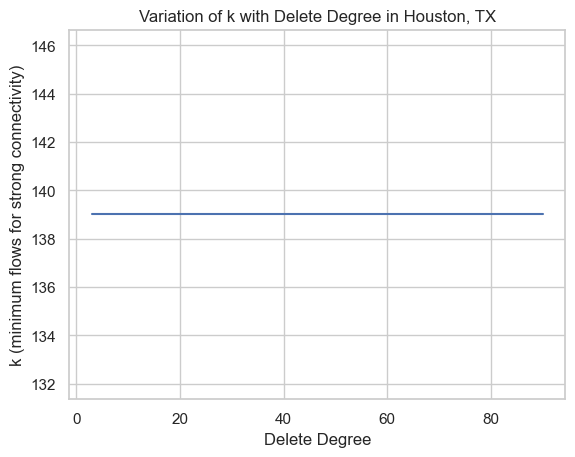

5 Phoenix, AZ
Number of nodes to remove:  0
nodes of the largest strongly connected graph for city: 950
111
Number of nodes to remove:  0
nodes of the largest strongly connected graph for city: 950
111
Number of nodes to remove:  0
nodes of the largest strongly connected graph for city: 950
111
Number of nodes to remove:  0
nodes of the largest strongly connected graph for city: 950
111
Number of nodes to remove:  0
nodes of the largest strongly connected graph for city: 950
111
Number of nodes to remove:  0
nodes of the largest strongly connected graph for city: 950
111
Number of nodes to remove:  0
nodes of the largest strongly connected graph for city: 950
111
Number of nodes to remove:  0
nodes of the largest strongly connected graph for city: 950
111
Number of nodes to remove:  0
nodes of the largest strongly connected graph for city: 950
111
Number of nodes to remove:  0
nodes of the largest strongly connected graph for city: 950
111
Number of nodes to remove:  0
nodes of the lar

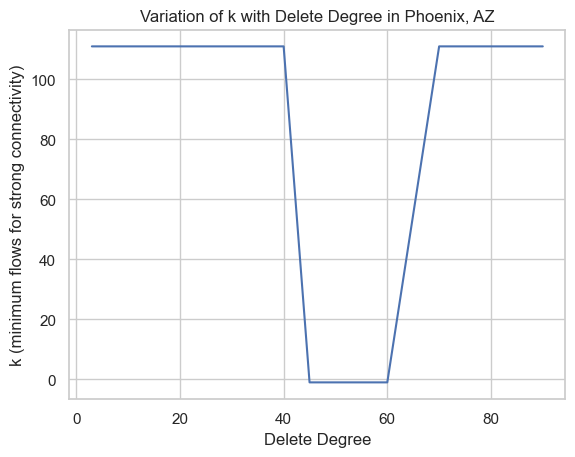

6 Philadelphia, PA
Number of nodes to remove:  0
nodes of the largest strongly connected graph for city: 1303
142
Number of nodes to remove:  0
nodes of the largest strongly connected graph for city: 1303
142
Number of nodes to remove:  0
nodes of the largest strongly connected graph for city: 1303
142
Number of nodes to remove:  0
nodes of the largest strongly connected graph for city: 1303
142
Number of nodes to remove:  0
nodes of the largest strongly connected graph for city: 1303
142
Number of nodes to remove:  0
nodes of the largest strongly connected graph for city: 1303
142
Number of nodes to remove:  0
nodes of the largest strongly connected graph for city: 1303
142
Number of nodes to remove:  0
nodes of the largest strongly connected graph for city: 1303
142
Number of nodes to remove:  0
nodes of the largest strongly connected graph for city: 1303
142
Number of nodes to remove:  0
nodes of the largest strongly connected graph for city: 1303
142
Number of nodes to remove:  0
n

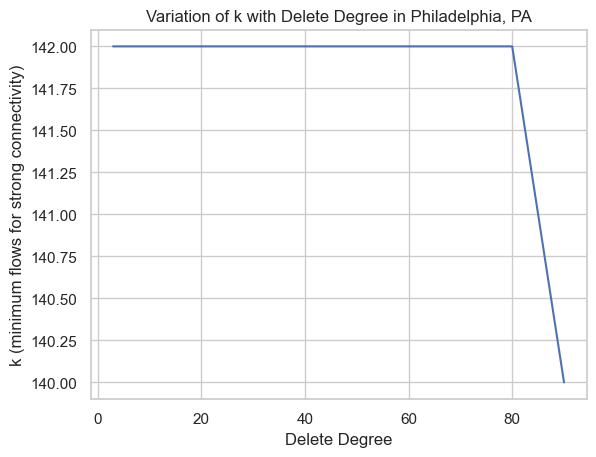

7 San Antonio, TX
Number of nodes to remove:  0
nodes of the largest strongly connected graph for city: 908
369
Number of nodes to remove:  0
nodes of the largest strongly connected graph for city: 908
369
Number of nodes to remove:  0
nodes of the largest strongly connected graph for city: 908
369
Number of nodes to remove:  1
nodes of the largest strongly connected graph for city: 907
369
Number of nodes to remove:  1
nodes of the largest strongly connected graph for city: 907
369
Number of nodes to remove:  1
nodes of the largest strongly connected graph for city: 907
369
Number of nodes to remove:  1
nodes of the largest strongly connected graph for city: 907
369
Number of nodes to remove:  1
nodes of the largest strongly connected graph for city: 907
369
Number of nodes to remove:  1
nodes of the largest strongly connected graph for city: 907
369
Number of nodes to remove:  1
nodes of the largest strongly connected graph for city: 907
369
Number of nodes to remove:  1
nodes of the

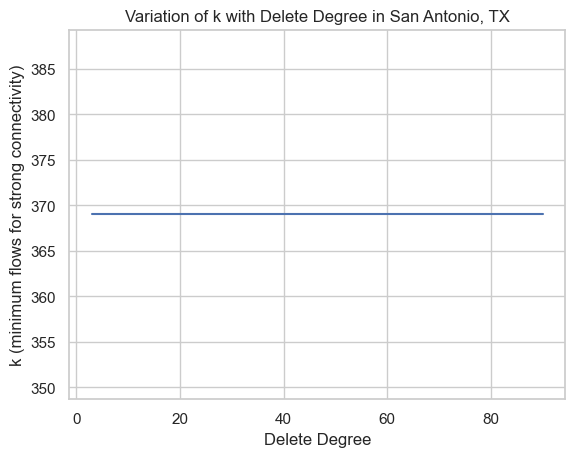

8 San Diego, CA
Number of nodes to remove:  0
nodes of the largest strongly connected graph for city: 818
176
Number of nodes to remove:  0
nodes of the largest strongly connected graph for city: 818
176
Number of nodes to remove:  0
nodes of the largest strongly connected graph for city: 818
176
Number of nodes to remove:  0
nodes of the largest strongly connected graph for city: 818
176
Number of nodes to remove:  0
nodes of the largest strongly connected graph for city: 818
176
Number of nodes to remove:  0
nodes of the largest strongly connected graph for city: 818
176
Number of nodes to remove:  0
nodes of the largest strongly connected graph for city: 818
176
Number of nodes to remove:  0
nodes of the largest strongly connected graph for city: 818
176
Number of nodes to remove:  1
nodes of the largest strongly connected graph for city: 817
176
Number of nodes to remove:  1
nodes of the largest strongly connected graph for city: 817
176
Number of nodes to remove:  2
nodes of the l

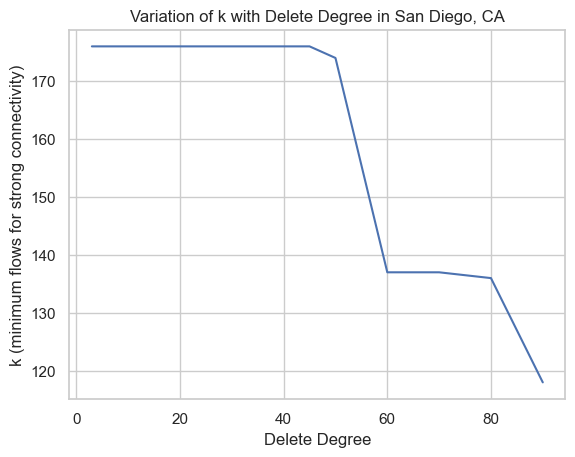

9 Dallas, TX
Number of nodes to remove:  0
nodes of the largest strongly connected graph for city: 911
151
Number of nodes to remove:  0
nodes of the largest strongly connected graph for city: 911
151
Number of nodes to remove:  0
nodes of the largest strongly connected graph for city: 911
151
Number of nodes to remove:  0
nodes of the largest strongly connected graph for city: 911
151
Number of nodes to remove:  0
nodes of the largest strongly connected graph for city: 911
151
Number of nodes to remove:  0
nodes of the largest strongly connected graph for city: 911
151
Number of nodes to remove:  0
nodes of the largest strongly connected graph for city: 911
151
Number of nodes to remove:  0
nodes of the largest strongly connected graph for city: 911
151
Number of nodes to remove:  0
nodes of the largest strongly connected graph for city: 911
151
Number of nodes to remove:  0
nodes of the largest strongly connected graph for city: 911
151
Number of nodes to remove:  2
nodes of the larg

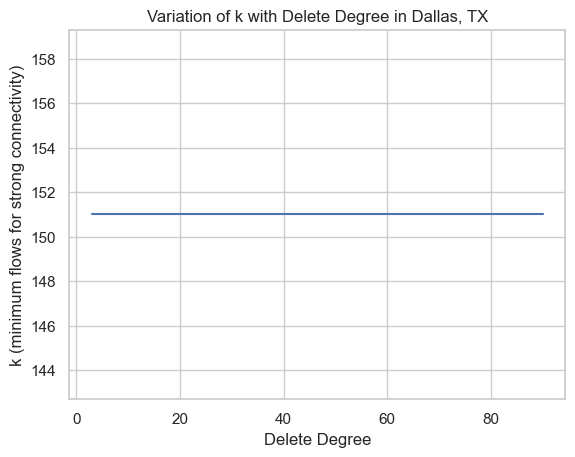

10 San Jose, CA
Number of nodes to remove:  0
nodes of the largest strongly connected graph for city: 565
108
Number of nodes to remove:  0
nodes of the largest strongly connected graph for city: 565
108
Number of nodes to remove:  0
nodes of the largest strongly connected graph for city: 565
108
Number of nodes to remove:  0
nodes of the largest strongly connected graph for city: 565
108
Number of nodes to remove:  0
nodes of the largest strongly connected graph for city: 565
108
Number of nodes to remove:  0
nodes of the largest strongly connected graph for city: 565
108
Number of nodes to remove:  0
nodes of the largest strongly connected graph for city: 565
108
Number of nodes to remove:  0
nodes of the largest strongly connected graph for city: 565
108
Number of nodes to remove:  0
nodes of the largest strongly connected graph for city: 565
108
Number of nodes to remove:  0
nodes of the largest strongly connected graph for city: 565
108
Number of nodes to remove:  1
nodes of the l

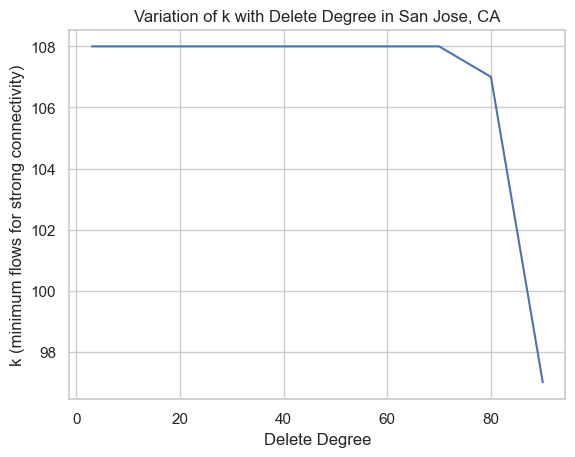

1 New York, NY
Number of nodes to remove:  0
nodes of the largest strongly connected graph for city: 6133
267
Number of nodes to remove:  1
nodes of the largest strongly connected graph for city: 6132
267
Number of nodes to remove:  1
nodes of the largest strongly connected graph for city: 6132
267
Number of nodes to remove:  3
nodes of the largest strongly connected graph for city: 6130
267
Number of nodes to remove:  6
nodes of the largest strongly connected graph for city: 6127
267
Number of nodes to remove:  9
nodes of the largest strongly connected graph for city: 6124
267
Number of nodes to remove:  9
nodes of the largest strongly connected graph for city: 6124
267
Number of nodes to remove:  12
nodes of the largest strongly connected graph for city: 6121
267
Number of nodes to remove:  12
nodes of the largest strongly connected graph for city: 6121
267
Number of nodes to remove:  14
nodes of the largest strongly connected graph for city: 6119
267
Number of nodes to remove:  15
n

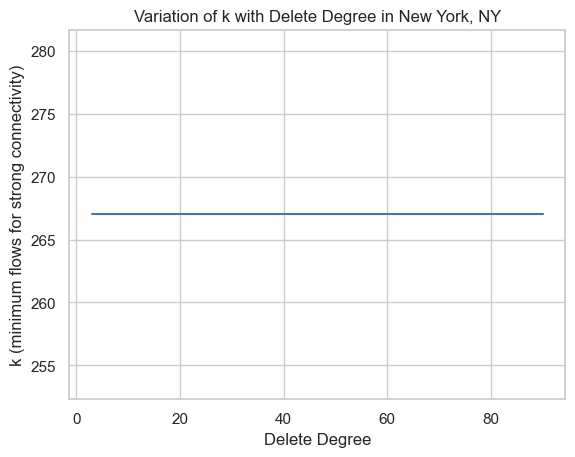

2 Los Angeles, CA
Number of nodes to remove:  0
nodes of the largest strongly connected graph for city: 2468
115
Number of nodes to remove:  0
nodes of the largest strongly connected graph for city: 2468
115
Number of nodes to remove:  0
nodes of the largest strongly connected graph for city: 2468
115
Number of nodes to remove:  0
nodes of the largest strongly connected graph for city: 2468
115
Number of nodes to remove:  0
nodes of the largest strongly connected graph for city: 2468
115
Number of nodes to remove:  0
nodes of the largest strongly connected graph for city: 2468
115
Number of nodes to remove:  0
nodes of the largest strongly connected graph for city: 2468
115
Number of nodes to remove:  0
nodes of the largest strongly connected graph for city: 2468
115
Number of nodes to remove:  2
nodes of the largest strongly connected graph for city: 2466
115
Number of nodes to remove:  4
nodes of the largest strongly connected graph for city: 2464
115
Number of nodes to remove:  8
no

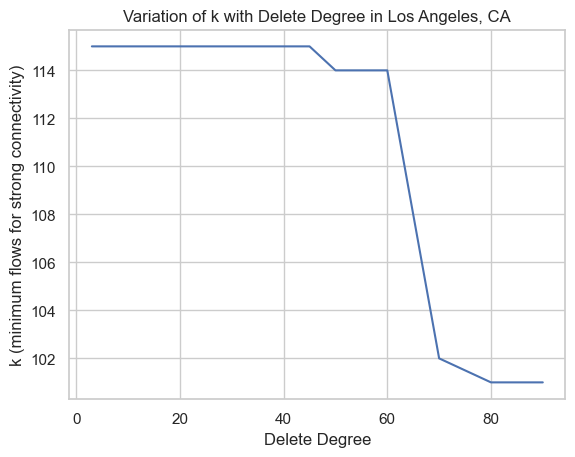

3 Chicago, IL
Number of nodes to remove:  0
nodes of the largest strongly connected graph for city: 2137
108
Number of nodes to remove:  0
nodes of the largest strongly connected graph for city: 2137
108
Number of nodes to remove:  0
nodes of the largest strongly connected graph for city: 2137
108
Number of nodes to remove:  0
nodes of the largest strongly connected graph for city: 2137
108
Number of nodes to remove:  1
nodes of the largest strongly connected graph for city: 2136
108
Number of nodes to remove:  1
nodes of the largest strongly connected graph for city: 2136
108
Number of nodes to remove:  1
nodes of the largest strongly connected graph for city: 2136
108
Number of nodes to remove:  1
nodes of the largest strongly connected graph for city: 2136
108
Number of nodes to remove:  1
nodes of the largest strongly connected graph for city: 2136
108
Number of nodes to remove:  1
nodes of the largest strongly connected graph for city: 2136
108
Number of nodes to remove:  1
nodes 

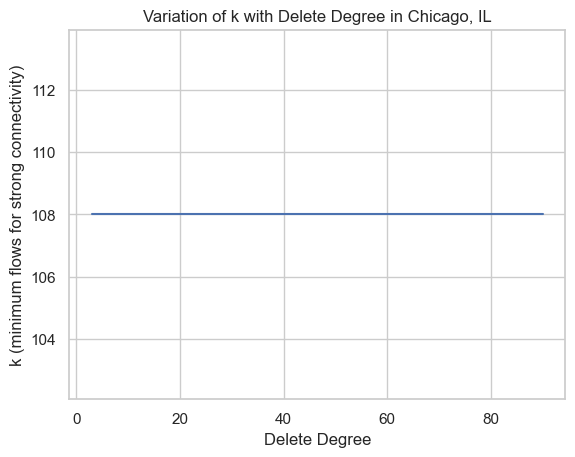

4 Houston, TX
Number of nodes to remove:  0
nodes of the largest strongly connected graph for city: 1538
255
Number of nodes to remove:  0
nodes of the largest strongly connected graph for city: 1538
255
Number of nodes to remove:  0
nodes of the largest strongly connected graph for city: 1538
255
Number of nodes to remove:  0
nodes of the largest strongly connected graph for city: 1538
255
Number of nodes to remove:  0
nodes of the largest strongly connected graph for city: 1538
255
Number of nodes to remove:  0
nodes of the largest strongly connected graph for city: 1538
255
Number of nodes to remove:  0
nodes of the largest strongly connected graph for city: 1538
255
Number of nodes to remove:  0
nodes of the largest strongly connected graph for city: 1538
255
Number of nodes to remove:  0
nodes of the largest strongly connected graph for city: 1538
255
Number of nodes to remove:  0
nodes of the largest strongly connected graph for city: 1538
255
Number of nodes to remove:  1
nodes 

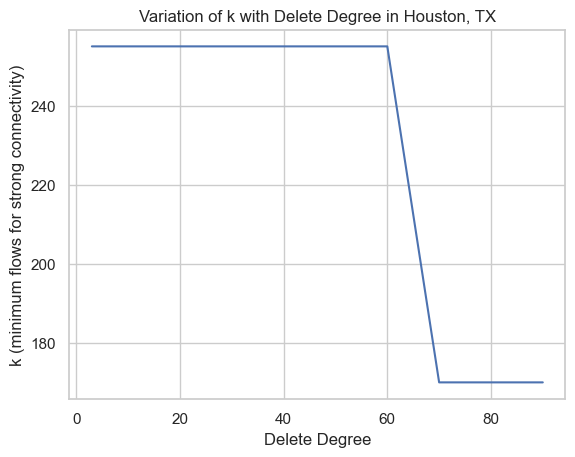

5 Phoenix, AZ
Number of nodes to remove:  0
nodes of the largest strongly connected graph for city: 949
169
Number of nodes to remove:  0
nodes of the largest strongly connected graph for city: 949
169
Number of nodes to remove:  0
nodes of the largest strongly connected graph for city: 949
169
Number of nodes to remove:  0
nodes of the largest strongly connected graph for city: 949
169
Number of nodes to remove:  0
nodes of the largest strongly connected graph for city: 949
169
Number of nodes to remove:  0
nodes of the largest strongly connected graph for city: 949
169
Number of nodes to remove:  0
nodes of the largest strongly connected graph for city: 949
169
Number of nodes to remove:  0
nodes of the largest strongly connected graph for city: 949
169
Number of nodes to remove:  0
nodes of the largest strongly connected graph for city: 949
169
Number of nodes to remove:  2
nodes of the largest strongly connected graph for city: 947
169
Number of nodes to remove:  3
nodes of the lar

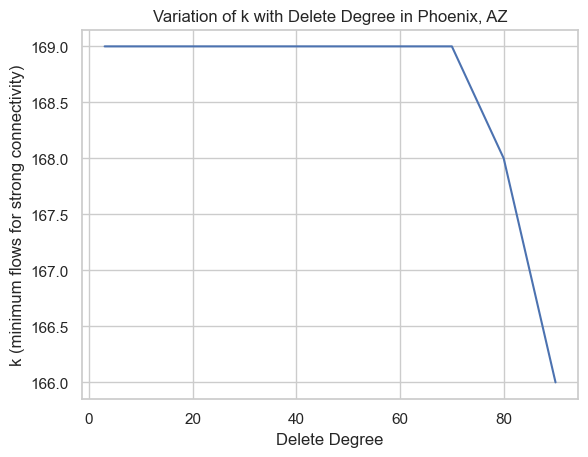

6 Philadelphia, PA
Number of nodes to remove:  0
nodes of the largest strongly connected graph for city: 1306
179
Number of nodes to remove:  0
nodes of the largest strongly connected graph for city: 1306
179
Number of nodes to remove:  0
nodes of the largest strongly connected graph for city: 1306
179
Number of nodes to remove:  0
nodes of the largest strongly connected graph for city: 1306
179
Number of nodes to remove:  0
nodes of the largest strongly connected graph for city: 1306
179
Number of nodes to remove:  0
nodes of the largest strongly connected graph for city: 1306
179
Number of nodes to remove:  0
nodes of the largest strongly connected graph for city: 1306
179
Number of nodes to remove:  0
nodes of the largest strongly connected graph for city: 1306
179
Number of nodes to remove:  0
nodes of the largest strongly connected graph for city: 1306
179
Number of nodes to remove:  0
nodes of the largest strongly connected graph for city: 1306
179
Number of nodes to remove:  0
n

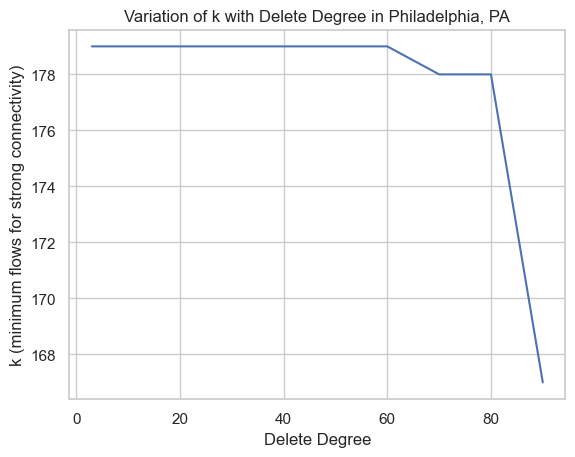

7 San Antonio, TX
Number of nodes to remove:  0
nodes of the largest strongly connected graph for city: 907
192
Number of nodes to remove:  0
nodes of the largest strongly connected graph for city: 907
192
Number of nodes to remove:  1
nodes of the largest strongly connected graph for city: 906
192
Number of nodes to remove:  1
nodes of the largest strongly connected graph for city: 906
192
Number of nodes to remove:  1
nodes of the largest strongly connected graph for city: 906
192
Number of nodes to remove:  1
nodes of the largest strongly connected graph for city: 906
192
Number of nodes to remove:  1
nodes of the largest strongly connected graph for city: 906
192
Number of nodes to remove:  1
nodes of the largest strongly connected graph for city: 906
192
Number of nodes to remove:  1
nodes of the largest strongly connected graph for city: 906
192
Number of nodes to remove:  1
nodes of the largest strongly connected graph for city: 906
192
Number of nodes to remove:  1
nodes of the

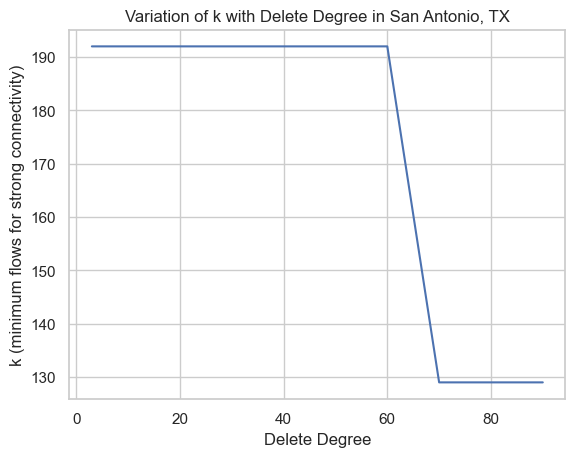

8 San Diego, CA
Number of nodes to remove:  0
nodes of the largest strongly connected graph for city: 818
212
Number of nodes to remove:  0
nodes of the largest strongly connected graph for city: 818
212
Number of nodes to remove:  0
nodes of the largest strongly connected graph for city: 818
212
Number of nodes to remove:  0
nodes of the largest strongly connected graph for city: 818
212
Number of nodes to remove:  0
nodes of the largest strongly connected graph for city: 818
212
Number of nodes to remove:  0
nodes of the largest strongly connected graph for city: 818
212
Number of nodes to remove:  0
nodes of the largest strongly connected graph for city: 818
212
Number of nodes to remove:  0
nodes of the largest strongly connected graph for city: 818
212
Number of nodes to remove:  0
nodes of the largest strongly connected graph for city: 818
212
Number of nodes to remove:  1
nodes of the largest strongly connected graph for city: 817
212
Number of nodes to remove:  2
nodes of the l

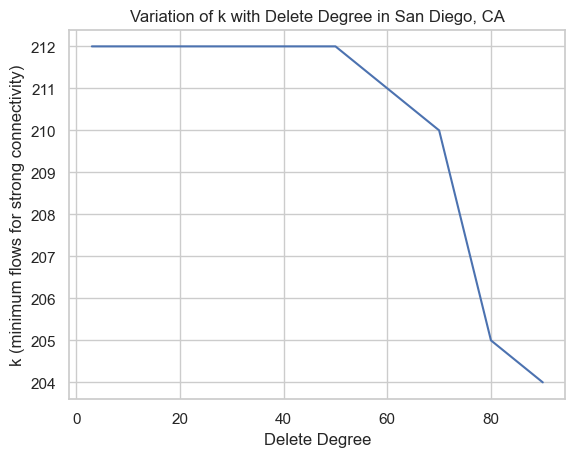

9 Dallas, TX
Number of nodes to remove:  0
nodes of the largest strongly connected graph for city: 907
123
Number of nodes to remove:  0
nodes of the largest strongly connected graph for city: 907
123
Number of nodes to remove:  0
nodes of the largest strongly connected graph for city: 907
123
Number of nodes to remove:  0
nodes of the largest strongly connected graph for city: 907
123
Number of nodes to remove:  0
nodes of the largest strongly connected graph for city: 907
123
Number of nodes to remove:  0
nodes of the largest strongly connected graph for city: 907
123
Number of nodes to remove:  0
nodes of the largest strongly connected graph for city: 907
123
Number of nodes to remove:  0
nodes of the largest strongly connected graph for city: 907
123
Number of nodes to remove:  0
nodes of the largest strongly connected graph for city: 907
123
Number of nodes to remove:  0
nodes of the largest strongly connected graph for city: 907
123
Number of nodes to remove:  1
nodes of the larg

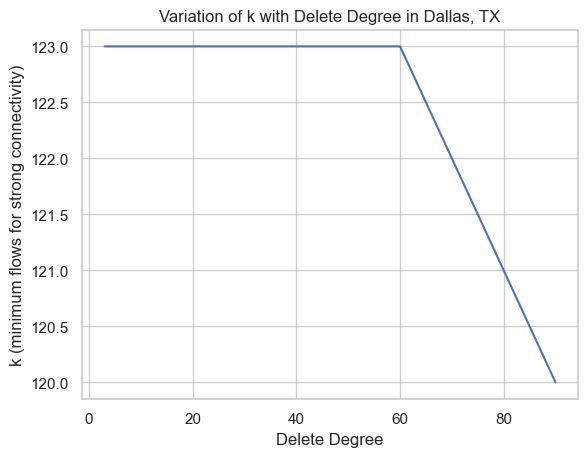

10 San Jose, CA
Number of nodes to remove:  0
nodes of the largest strongly connected graph for city: 564
122
Number of nodes to remove:  0
nodes of the largest strongly connected graph for city: 564
122
Number of nodes to remove:  0
nodes of the largest strongly connected graph for city: 564
122
Number of nodes to remove:  0
nodes of the largest strongly connected graph for city: 564
122
Number of nodes to remove:  0
nodes of the largest strongly connected graph for city: 564
122
Number of nodes to remove:  0
nodes of the largest strongly connected graph for city: 564
122
Number of nodes to remove:  0
nodes of the largest strongly connected graph for city: 564
122
Number of nodes to remove:  0
nodes of the largest strongly connected graph for city: 564
122
Number of nodes to remove:  0
nodes of the largest strongly connected graph for city: 564
122
Number of nodes to remove:  0
nodes of the largest strongly connected graph for city: 564
122
Number of nodes to remove:  1
nodes of the l

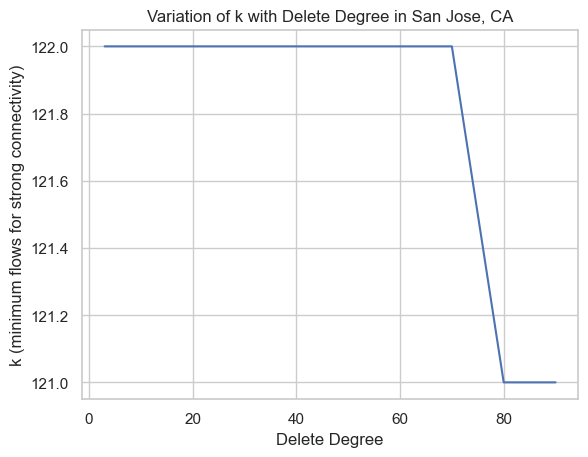

1 New York, NY
Number of nodes to remove:  0
nodes of the largest strongly connected graph for city: 6128
281
Number of nodes to remove:  0
nodes of the largest strongly connected graph for city: 6128
281
Number of nodes to remove:  0
nodes of the largest strongly connected graph for city: 6128
281
Number of nodes to remove:  3
nodes of the largest strongly connected graph for city: 6125
225
Number of nodes to remove:  5
nodes of the largest strongly connected graph for city: 6123
225
Number of nodes to remove:  8
nodes of the largest strongly connected graph for city: 6120
225
Number of nodes to remove:  11
nodes of the largest strongly connected graph for city: 6117
225
Number of nodes to remove:  13
nodes of the largest strongly connected graph for city: 6115


KeyboardInterrupt: 

In [25]:

delete_degrees = [3, 6, 9, 12, 15, 18, 20, 25, 30, 35, 40, 45, 50, 60, 70, 80, 90,]

import matplotlib.pyplot as plt

cities = ['New York, NY', 'Los Angeles, CA', 'Chicago, IL', 'Houston, TX', 'Phoenix, AZ', 'Philadelphia, PA', 'San Antonio, TX', 'San Diego, CA', 'Dallas, TX', 'San Jose, CA']
city_list = list(range(1,11))

for year in range(2018,2022):
    for month in range(1,13):
        df_ks = pd.DataFrame(columns=['delete_degree'] + city_list)
        df_ks['delete_degree'] = delete_degrees
        for city in city_list:
            flow_matrix = np.load(r'D:\Dropbox\urban cup\data\Mobility\cbg_visit_{year_}-{month_}_{city_}.npy'.format(year_ = year, month_ = str(month).zfill(2), city_ = city))
            print(city, cities[city-1])
            ks = minimum_flows_for_strongly_connectivity_extract_component_first(flow_matrix)
            df_ks.loc[:, city] = ks
            print(ks)
            # 绘制结果
            plt.plot(delete_degrees, ks)
            plt.xlabel('Delete Degree')
            plt.ylabel('k (minimum flows for strong connectivity)')
            plt.title('Variation of k with Delete Degree in {}'.format(cities[city-1]))
            plt.grid(True)
            plt.show()
            plt.close()
        df_ks.columns = ['delete_degree'] + cities
        df_ks.to_csv('k_select_US_{year_}-{month_}.csv'.format(year_ = year, month_ = str(month).zfill(2)))

In [ ]:
# Delete nodes first
delete_degrees = [3, 6, 9, 12, 15, 18, 20, 25, 30, 35, 40, 45, 50, 60, 70, 80, 90,]

import matplotlib.pyplot as plt

cities = ['New York, NY', 'Los Angeles, CA', 'Chicago, IL', 'Houston, TX', 'Phoenix, AZ', 'Philadelphia, PA', 'San Antonio, TX', 'San Diego, CA', 'Dallas, TX', 'San Jose, CA']
city_list = list(range(1,11))

for year in range(2018,2022):
    for month in range(1,13):
        df_ks = pd.DataFrame(columns=['delete_degree'] + city_list)
        df_ks['delete_degree'] = delete_degrees
        for city in city_list:
            flow_matrix = np.load(r'D:\Dropbox\urban cup\data\Mobility\cbg_visit_{year_}-{month_}_{city_}.npy'.format(year_ = year, month_ = str(month).zfill(2), city_ = city))
            print(city, cities[city-1])
            ks = minimum_flows_for_strongly_connectivity_extract_component_first(flow_matrix)
            df_ks.loc[:, city] = ks
            print(ks)
            # 绘制结果
            plt.plot(delete_degrees, ks)
            plt.xlabel('Delete Degree')
            plt.ylabel('k (minimum flows for strong connectivity)')
            plt.title('Variation of k with Delete Degree in {}'.format(cities[city-1]))
            plt.grid(True)
            plt.show()
            plt.close()
        df_ks.columns = ['delete_degree'] + cities
        df_ks.to_csv('k_select_US_{year_}-{month_}.csv'.format(year_ = year, month_ = str(month).zfill(2)))

In [16]:
delete_degrees = [3, 6, 9, 12, 15, 18, 20, 25, 30, 35, 40, 45, 50, 60, 70, 80, 90,]



city_list = ['东莞市', '中山市', '云浮市', '佛山市', '广州市', '惠州市', '揭阳市', '梅州市', '汕头市',
             '汕尾市', '江门市', '河源市', '深圳市', '清远市', '湛江市', '潮州市', '珠海市', '肇庆市',
             '茂名市', '阳江市', '韶关市']

city_list_eng = ['Dongguan', 'Zhongshan', 'Yunfu', 'Foshan', 'Guangzhou', 'Huizhou', 'Jieyang',
             'Meizhou', 'Shantou', 'Shanwei', 'Jiangmen', 'Heyuan', 'Shenzhen', 'Qingyuan', 
             'Zhanjiang', 'Chaozhou', 'Zhuhai', 'Zhaoqing', 'Maoming', 'Yangjiang', 'Shaoguan']
df_ks = pd.DataFrame(columns=['delete_degree']+city_list_eng)
df_ks['delete_degree'] = delete_degrees
for city in city_list_eng:
    flow_matrix = np.load(r'.\data\Guangdong\flow_matrix\gd_flow_matrix_{}_1101-1107.npy'.format(city))
    print(city)
    ks = minimum_flows_for_strongly_connectivity_extract_component_first(flow_matrix)
    df_ks.loc[:, city] = ks

df_ks.to_csv('k_select_Guangdong.csv')

Dongguan


C:\Users\zwy99\AppData\Local\Temp\ipykernel_36016\3331485724.py:37: FutureWarning: adjacency_matrix will return a scipy.sparse array instead of a matrix in Networkx 3.0.
  adj_matrix = nx.adjacency_matrix(strongly_connected_G)


Number of nodes to remove:  22
nodes of the largest strongly connected graph for city: 5573
251
Number of nodes to remove:  69
nodes of the largest strongly connected graph for city: 5526
172
Number of nodes to remove:  110
nodes of the largest strongly connected graph for city: 5485
139
Number of nodes to remove:  147
nodes of the largest strongly connected graph for city: 5448
108
Number of nodes to remove:  198
nodes of the largest strongly connected graph for city: 5397
108
Number of nodes to remove:  231
nodes of the largest strongly connected graph for city: 5364
46
Number of nodes to remove:  266
nodes of the largest strongly connected graph for city: 5329
46
Number of nodes to remove:  331
nodes of the largest strongly connected graph for city: 5264
46
Number of nodes to remove:  396
nodes of the largest strongly connected graph for city: 5199
71
Number of nodes to remove:  461
nodes of the largest strongly connected graph for city: 5134
71
Number of nodes to remove:  523
nodes

#### Analysis for NewYork City(201805)

1 New York, NY


C:\Users\zwy99\AppData\Local\Temp\ipykernel_36016\4109518636.py:36: FutureWarning: adjacency_matrix will return a scipy.sparse array instead of a matrix in Networkx 3.0.
  adj_matrix = nx.adjacency_matrix(strongly_connected_G)


Number of nodes to remove:  60
nodes of the largest strongly connected graph for city: 6074
1081
Number of nodes to remove:  76
nodes of the largest strongly connected graph for city: 6058
1081
Number of nodes to remove:  99
nodes of the largest strongly connected graph for city: 6035
210
Number of nodes to remove:  132
nodes of the largest strongly connected graph for city: 6002
162
Number of nodes to remove:  166
nodes of the largest strongly connected graph for city: 5968
162
Number of nodes to remove:  216
nodes of the largest strongly connected graph for city: 5918
162


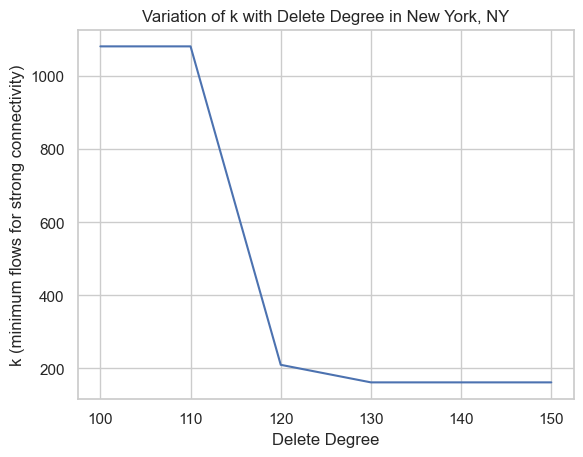

In [40]:

delete_degrees = [ 100, 110, 120, 130, 140, 150, ]

import matplotlib.pyplot as plt

cities = ['New York, NY', 'Los Angeles, CA', 'Chicago, IL', 'Houston, TX', 'Phoenix, AZ', 'Philadelphia, PA', 'San Antonio, TX', 'San Diego, CA', 'Dallas, TX', 'San Jose, CA']

flow_matrix = np.load(r'D:\Dropbox\urban cup\data\Mobility\cbg_visit_2018-05_1.npy'.format(year_ = year, month_ = str(month).zfill(2), city_ = city))
print(city, cities[city-1])
ks = minimum_flows_for_strongly_connectivity_extract_component_first(flow_matrix, delete_degrees)

# 绘制结果
plt.plot(delete_degrees, ks)
plt.xlabel('Delete Degree')
plt.ylabel('k (minimum flows for strong connectivity)')
plt.title('Variation of k with Delete Degree in {}'.format(cities[city-1]))
plt.grid(True)
plt.show()
plt.close()

1
Number of nodes to remove:  188
nodes of the largest strongly connected graph for city: 6123
1084
Number of nodes to remove:  196
nodes of the largest strongly connected graph for city: 6118
1084
Number of nodes to remove:  252
nodes of the largest strongly connected graph for city: 6076
1082
Number of nodes to remove:  428
nodes of the largest strongly connected graph for city: 5930
162
Number of nodes to remove:  786
nodes of the largest strongly connected graph for city: 5614
160
Number of nodes to remove:  1346
nodes of the largest strongly connected graph for city: 5084
216
Number of nodes to remove:  2083
nodes of the largest strongly connected graph for city: 4377
200
Number of nodes to remove:  2853
nodes of the largest strongly connected graph for city: 3624
125
[1084, 1084, 1082, 162, 160, 216, 200, 125]


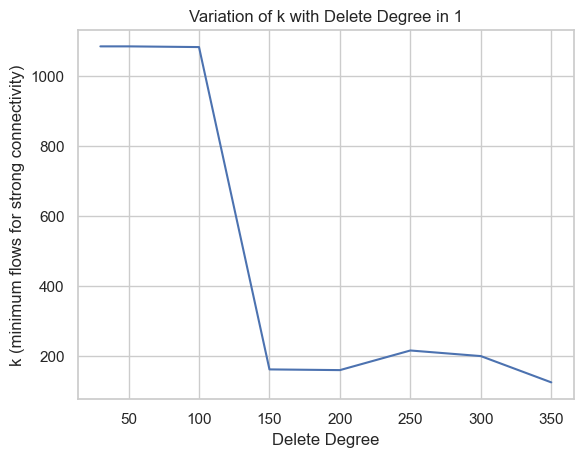

In [38]:

delete_degrees = [30, 50, 100, 150, 200, 250, 300, 350]

import matplotlib.pyplot as plt

cities = ['New York, NY', 'Los Angeles, CA', 'Chicago, IL', 'Houston, TX', 'Phoenix, AZ', 'Philadelphia, PA', 'San Antonio, TX', 'San Diego, CA', 'Dallas, TX', 'San Jose, CA']

flow_matrix = np.load(r'D:\Dropbox\urban cup\data\Mobility\cbg_visit_2018-05_1.npy'.format(year_ = year, month_ = str(month).zfill(2), city_ = city))
print(city)
results = []
for delete_degree in delete_degrees:
    # Convert the original flows to binary
    flows_binary = (flow_matrix > 0).astype(int)

    # Calculate the degrees based on the new definition
    degrees_all = np.sum(np.logical_or(flows_binary, flows_binary.T), axis=1)

    # find the nodes whose degree are lower than 5
    nodes_to_remove = np.where(degrees_all < delete_degree)[0]
    print('Number of nodes to remove: ', len(nodes_to_remove))

    # Remove the ndoes from the matrix
    reduced_matrix = np.delete(flow_matrix, nodes_to_remove, axis=0)
    reduced_matrix = np.delete(reduced_matrix, nodes_to_remove, axis=1)

    k=minimum_flows_for_strongly_connectivity(reduced_matrix)
    print(k)
    results.append(k)
print(results)
# 绘制结果
plt.plot(delete_degrees, results)
plt.xlabel('Delete Degree')
plt.ylabel('k (minimum flows for strong connectivity)')
plt.title('Variation of k with Delete Degree in {}'.format(city))
plt.grid(True)
plt.show()
plt.close()


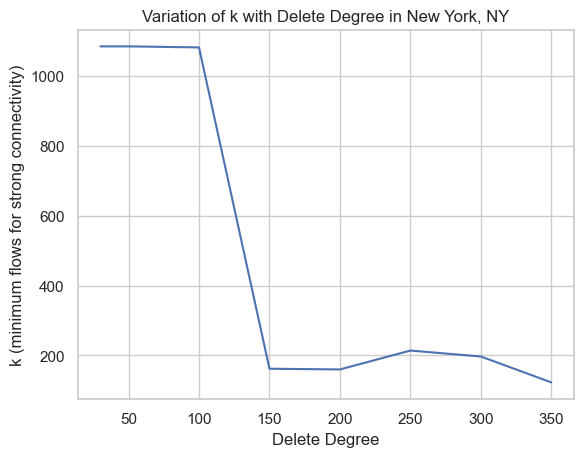

In [32]:
# 绘制结果
plt.plot(delete_degrees, ks)
plt.xlabel('Delete Degree')
plt.ylabel('k (minimum flows for strong connectivity)')
plt.title('Variation of k with Delete Degree in {}'.format(cities[city-1]))
plt.grid(True)
plt.show()
plt.close()

Text(0.5, 1.0, 'CBG Degree Distribution')

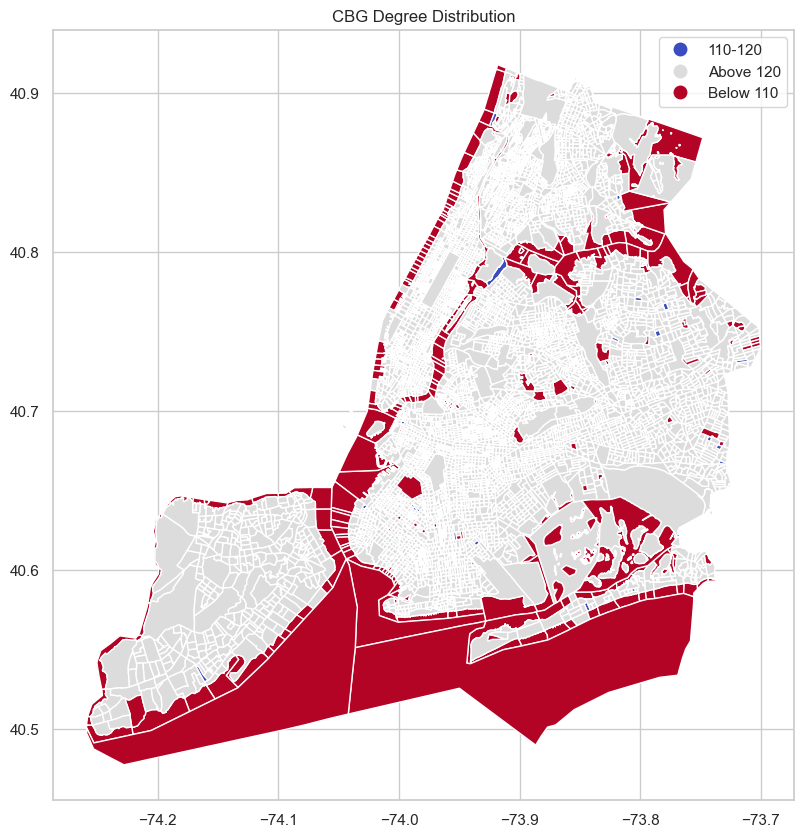

In [41]:
import numpy as np
import pandas as pd
import geopandas as gpd
import pickle

# Load the files
mobility_matrix = np.load(r'D:\Dropbox\urban cup\data\Mobility\cbg_visit_2018-05_1.npy')
with open(r"D:\Dropbox\urban cup\data\Mobility\id_dict_1.pkl", 'rb') as f:
    node_to_cbg = pickle.load(f)

gdf = gpd.read_file(r"D:\Dropbox\urban cup\arcgis project\cbgs\cbgs_of_cities\New_York_city.shp")

# Compute the degree for each node
flows_binary = (mobility_matrix > 0).astype(int)

# Calculate the degrees based on the new definition
degrees_all = np.sum(np.logical_or(flows_binary, flows_binary.T), axis=1)

# Map node degree to CBG
cbg_to_degree = {node_to_cbg[node]: degree for node, degree in enumerate(degrees_all)}

# Classify CBGs based on degree
def classify_degree(degree):
    if degree > 120:
        return 'Above 120'
    elif 110 <= degree <= 120:
        return '110-120'
    else:
        return 'Below 110'

gdf['Degree_Class'] = gdf['CBG_Code'].map(lambda x: classify_degree(cbg_to_degree.get(x, 0)))

# Plot
ax = gdf.plot(column='Degree_Class', legend=True, cmap='coolwarm', figsize=(10, 10))
ax.set_title('CBG Degree Distribution')


In [42]:
gdf.to_file("NewYork_with_degree_distribution.shp")

C:\Users\zwy99\AppData\Local\Temp\ipykernel_36016\2134942143.py:1: UserWarning: Column names longer than 10 characters will be truncated when saved to ESRI Shapefile.
  gdf.to_file("NewYork_with_degree_distribution.shp")


#### Show results of ks for American/Chinese cities.

1 New York, NY
1 New York, NY
1 New York, NY
1 New York, NY
1 New York, NY
1 New York, NY


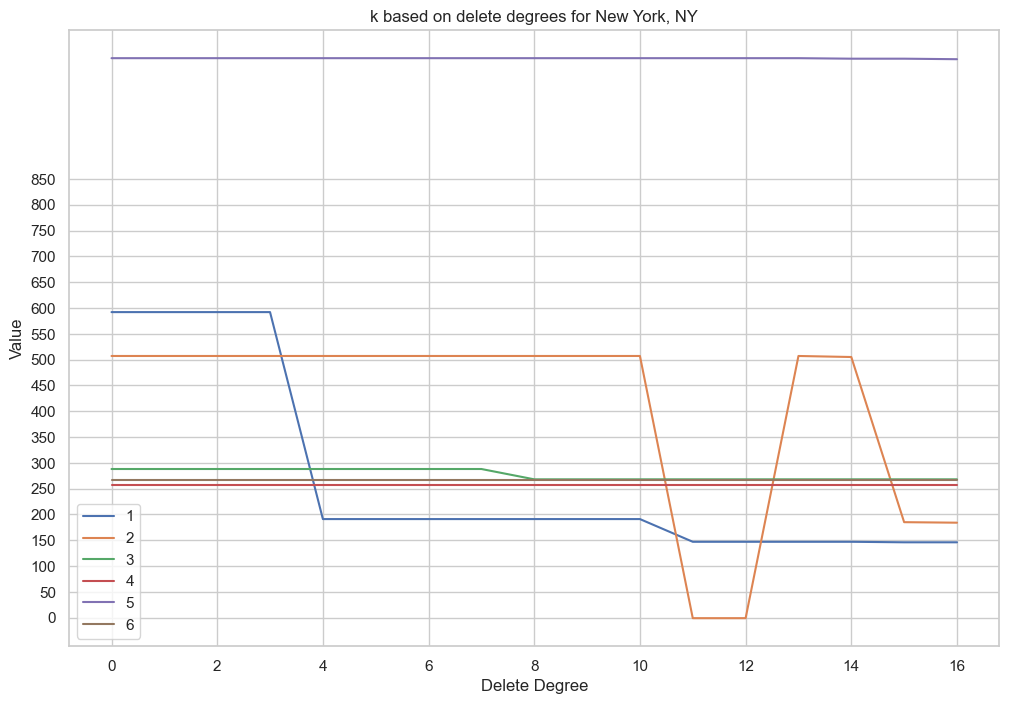

2 Los Angeles, CA
2 Los Angeles, CA
2 Los Angeles, CA
2 Los Angeles, CA
2 Los Angeles, CA
2 Los Angeles, CA


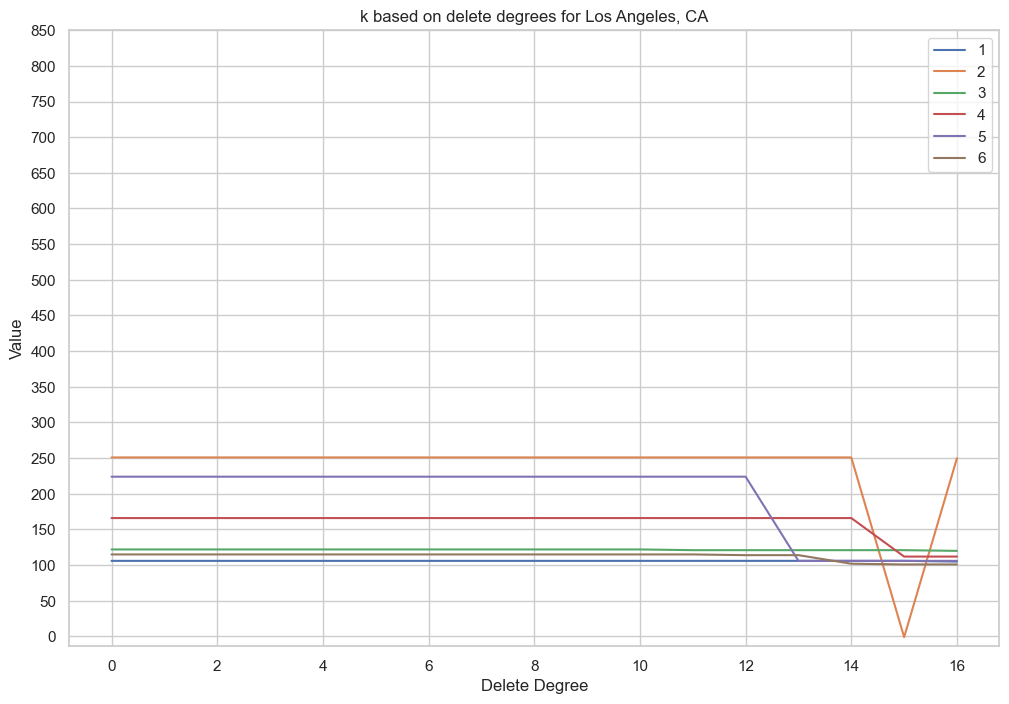

3 Chicago, IL
3 Chicago, IL
3 Chicago, IL
3 Chicago, IL
3 Chicago, IL
3 Chicago, IL


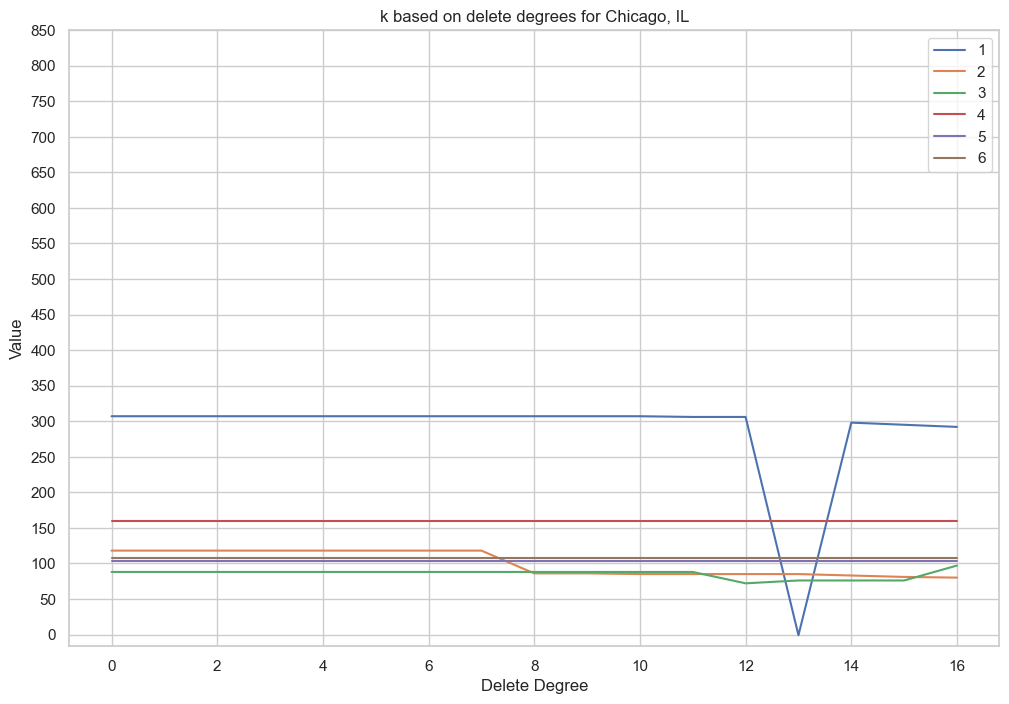

4 Houston, TX
4 Houston, TX
4 Houston, TX
4 Houston, TX
4 Houston, TX
4 Houston, TX


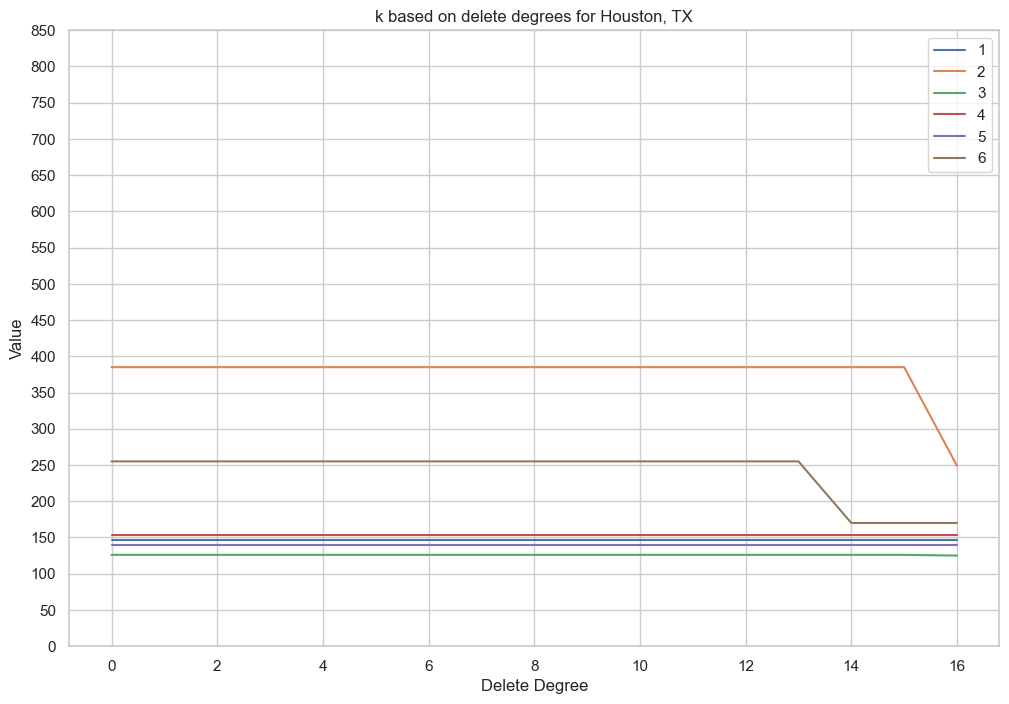

5 Phoenix, AZ
5 Phoenix, AZ
5 Phoenix, AZ
5 Phoenix, AZ
5 Phoenix, AZ
5 Phoenix, AZ


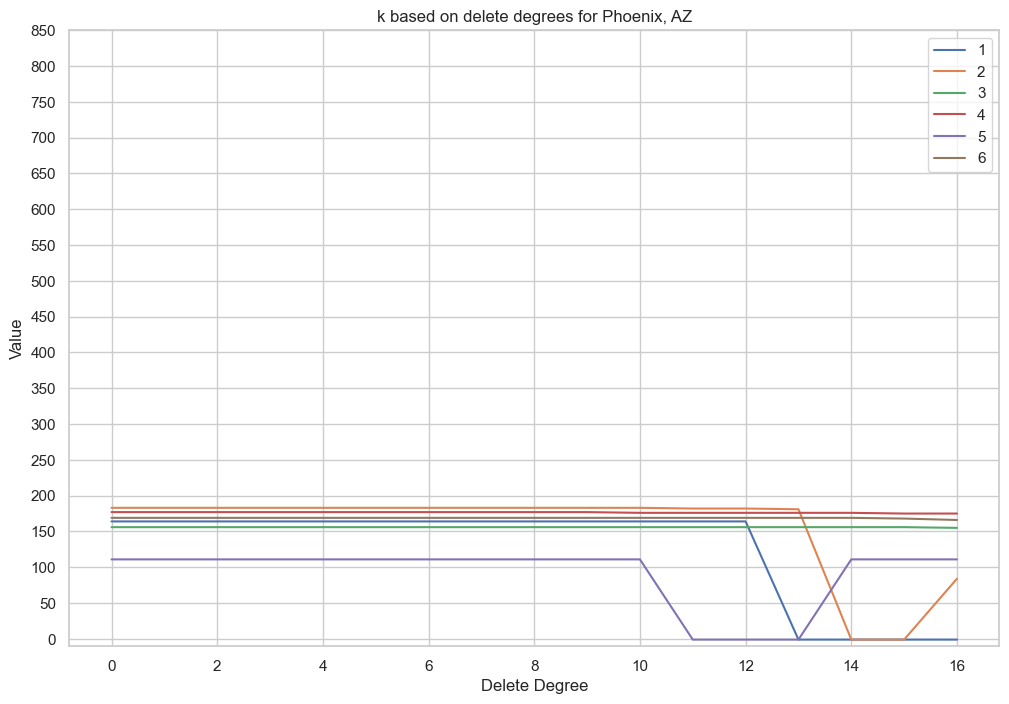

6 Philadelphia, PA
6 Philadelphia, PA
6 Philadelphia, PA
6 Philadelphia, PA
6 Philadelphia, PA
6 Philadelphia, PA


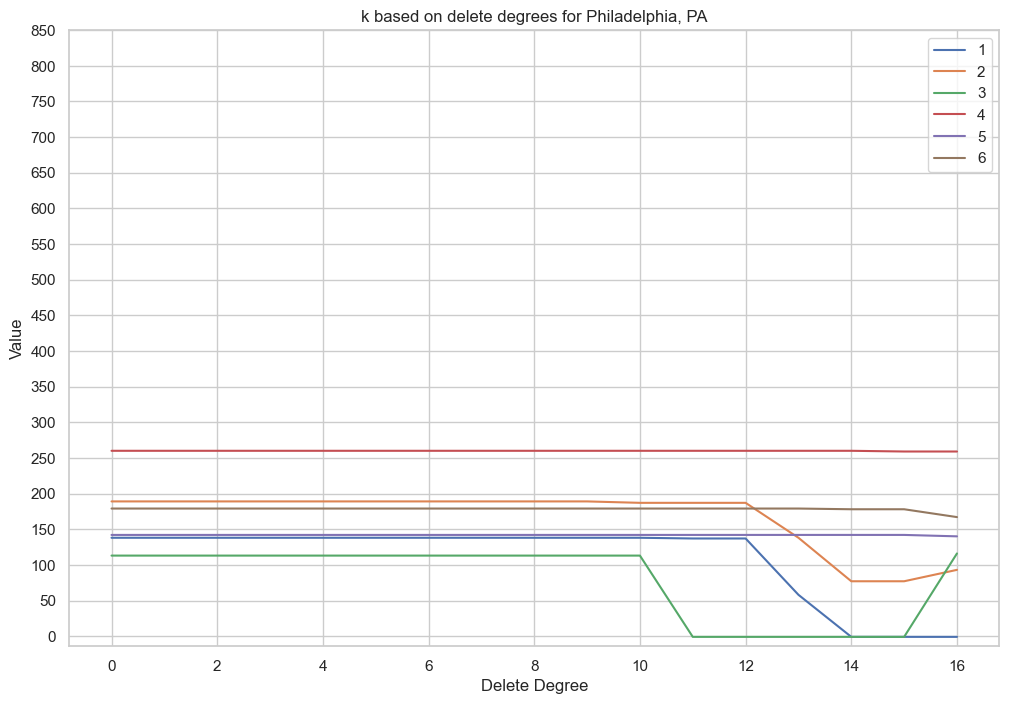

7 San Antonio, TX
7 San Antonio, TX
7 San Antonio, TX
7 San Antonio, TX
7 San Antonio, TX
7 San Antonio, TX


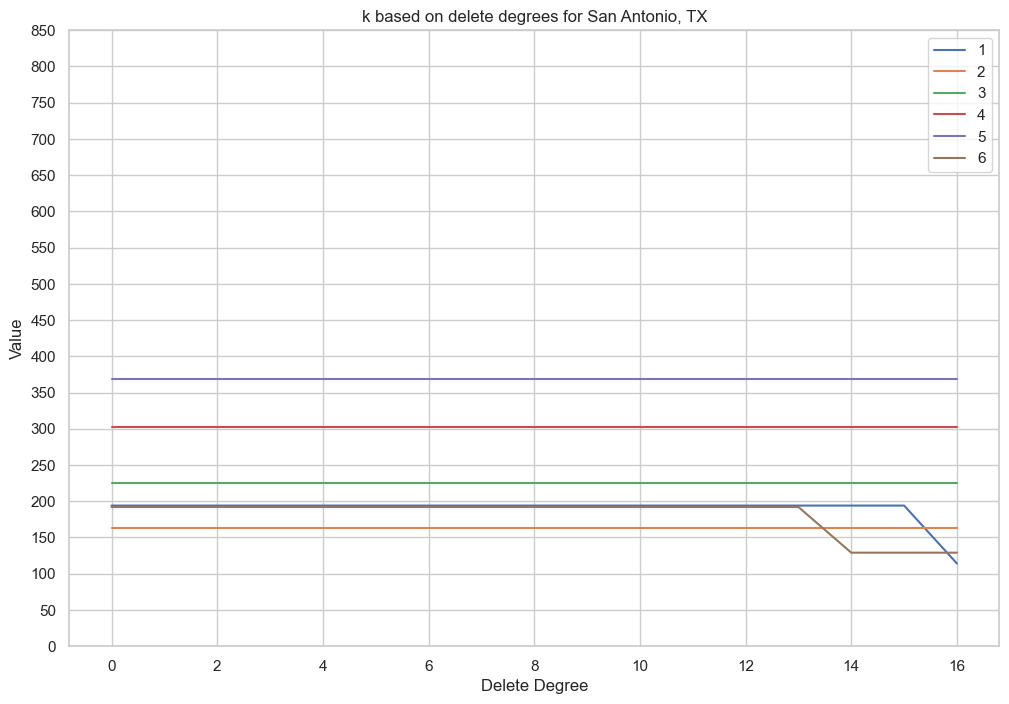

8 San Diego, CA
8 San Diego, CA
8 San Diego, CA
8 San Diego, CA
8 San Diego, CA
8 San Diego, CA


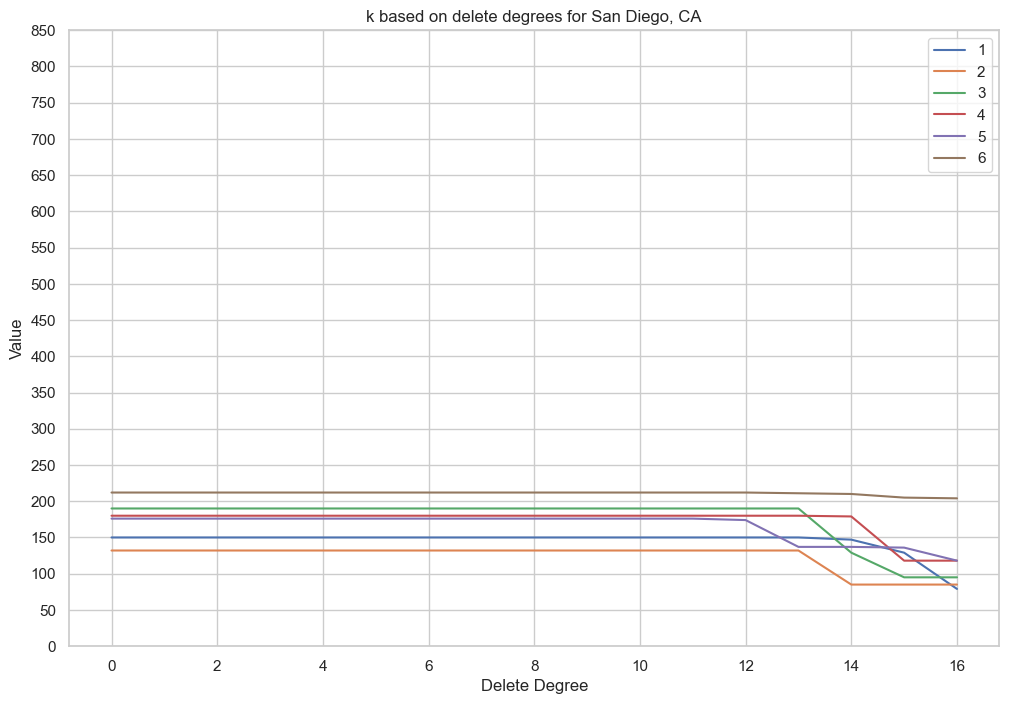

9 Dallas, TX
9 Dallas, TX
9 Dallas, TX
9 Dallas, TX
9 Dallas, TX
9 Dallas, TX


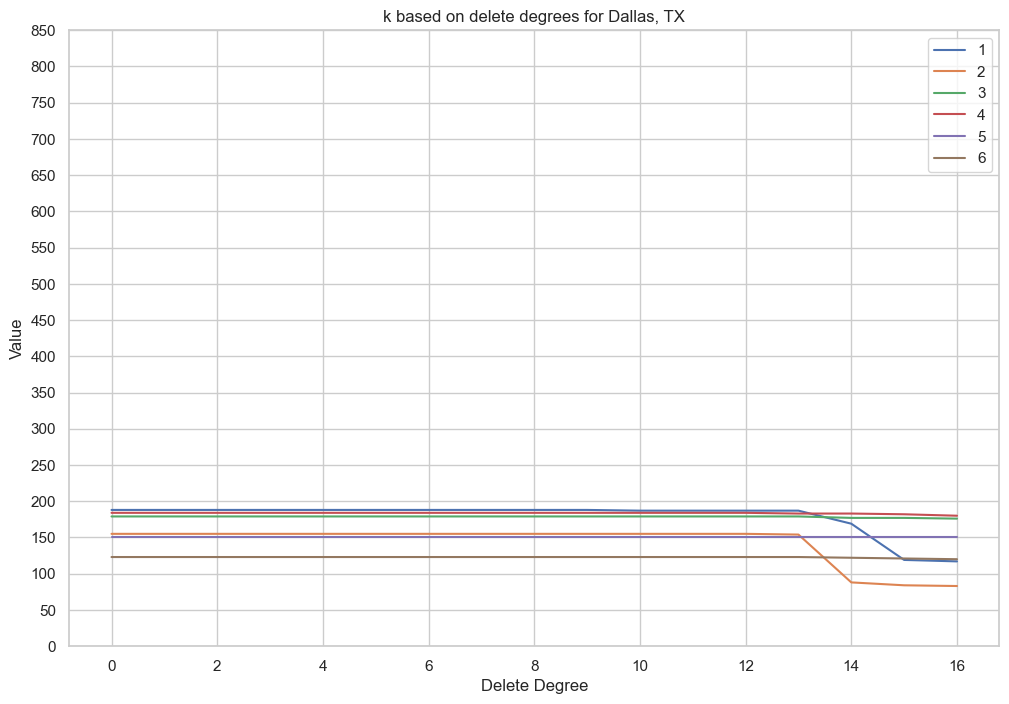

10 San Jose, CA
10 San Jose, CA
10 San Jose, CA
10 San Jose, CA
10 San Jose, CA
10 San Jose, CA


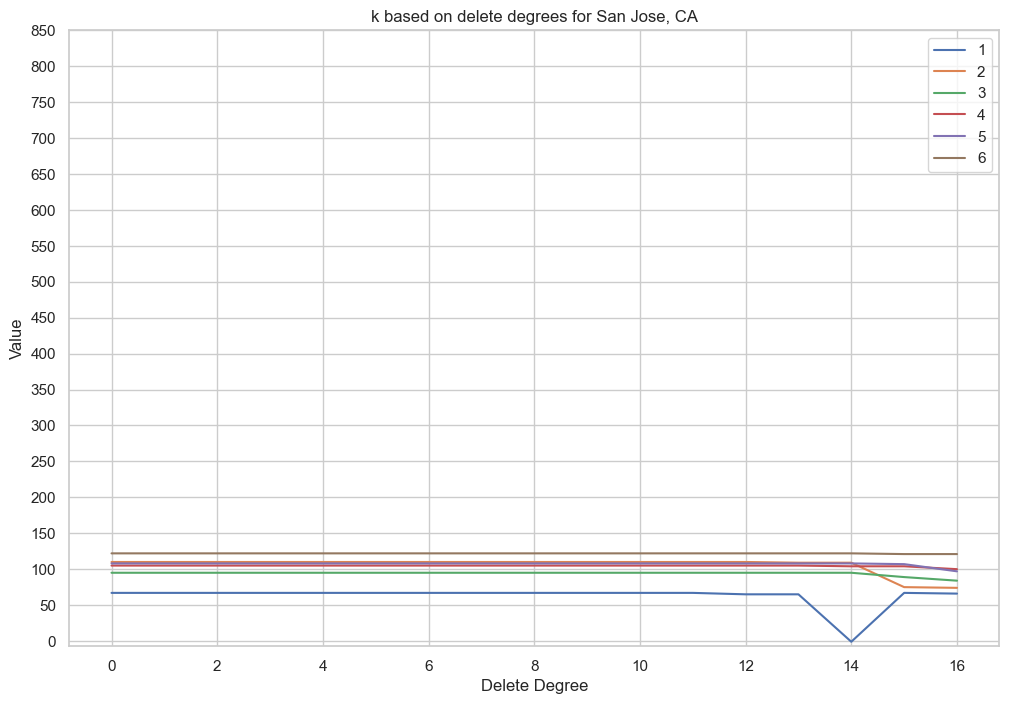

In [47]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
# Plotting



for city in city_list:
    plt.figure(figsize=(12, 8))
    # Denser grid
    plt.gca().yaxis.grid(True, which='both')
    plt.gca().xaxis.grid(True, which='both')

    for month in range(1,7):
        tmp_ks = pd.read_csv(r'k_select_US_{year_}-{month_}.csv'.format(year_ = year, month_ = str(month).zfill(2)))
        plt.plot(tmp_ks.index, tmp_ks[cities[city-1]], label=month)
        print(city, cities[city-1])
        
    plt.yticks(np.arange(0, 900, 50))
    plt.title("k based on delete degrees for {city}".format(city = cities[city-1]))
    plt.xlabel("Delete Degree")
    plt.ylabel("Value")
    plt.legend(loc='best')
    plt.show()
    plt.close()

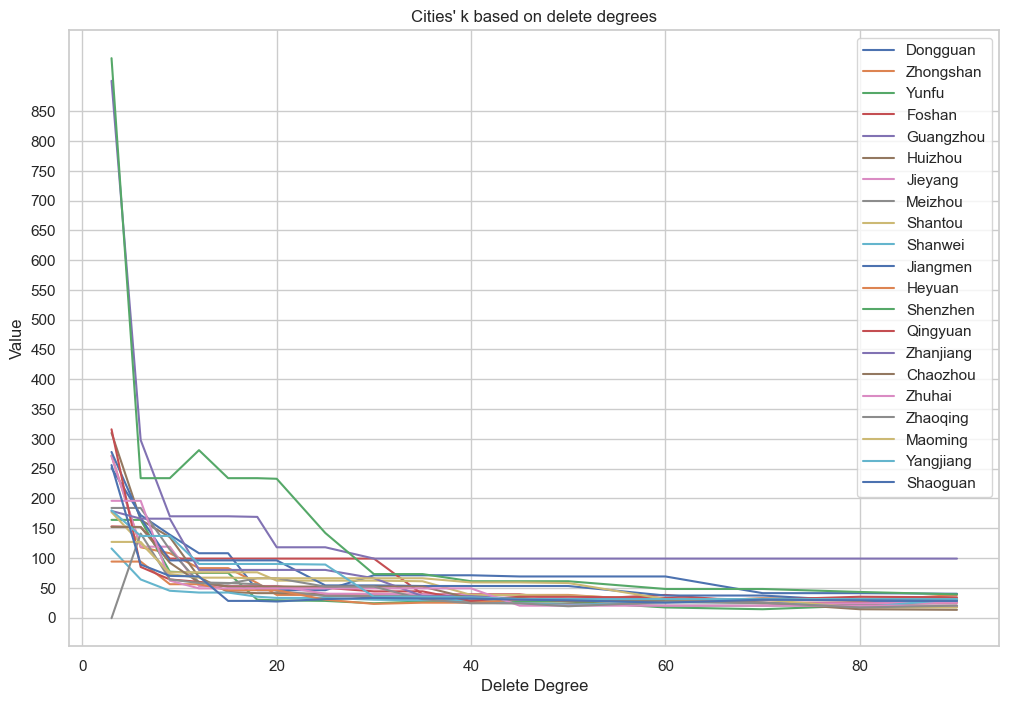

In [48]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load CSV file
data = pd.read_csv(r"k_select_Guangdong.csv")

# Set "delete_degree" as index
data.set_index('delete_degree', inplace=True)
data.drop('Unnamed: 0', axis=1, inplace=True)
# Seaborn settings
sns.set(style="whitegrid")
palette = sns.color_palette("Paired")

# Plotting
plt.figure(figsize=(12, 8))
for idx, column in enumerate(data.columns):
    plt.plot(data.index, data[column], label=column)


# Denser grid
plt.gca().yaxis.grid(True, which='both')
plt.gca().xaxis.grid(True, which='both')

plt.yticks(np.arange(0, 900, 50))
plt.title("Cities' k based on delete degrees")
plt.xlabel("Delete Degree")
plt.ylabel("Value")
plt.legend(loc='best')
plt.savefig('k_select_Guangdong.png', dpi=300)
plt.show()



In [17]:
results

[545,
 545,
 545,
 545,
 545,
 545,
 545,
 545,
 401,
 401,
 401,
 401,
 196,
 196,
 125,
 125,
 125,
 125,
 125,
 125,
 125,
 125,
 125,
 125,
 124]

In [ ]:

# Calculate the minimum k for strongly connectivity for each city-month and record them.
k_table = pd.DataFrame(columns=['year','month'])
for i in range(1, 11):
    k_table[i] = -100

k_table.set_index(['year', 'month'], inplace=True)

for year in range(2019, 2023):
    for month in range(1, 13):
        for city in range(1, 11):
            if os.path.exists(r'data\Mobility\cbg_visit_{year_}-{month_}_{city_}.npy'.format(year_ = year, month_ = str(month).zfill(2), city_ = city)) == False:
                print("No data for {year_}-{month_}_{city_}".format(year_ = year, month_ = str(month).zfill(2), city_ = city))
                continue
            flow_matrix = np.load(r'data\Mobility\cbg_visit_{year_}-{month_}_{city_}.npy'.format(year_ = year, month_ = str(month).zfill(2), city_ = city))
            k = minimum_flows_for_strongly_connectivity(flow_matrix)
            #print("{year_}-{month_}_{city_}:{k_}".format(year_ = year, month_ = str(month).zfill(2), city_ = city,k_=k))
            k_table.loc[(year,month),city] = k
k_table.to_csv("all_k.csv")

In [ ]:
# Plot the map of the the share of the top-k flows in the total flows of each CBG

# Load your numpy array and node to CBG mapping
flow_matrix = np.load('path_to_your_file.npy')
with open('id_dict_{city_id}.pkl', 'rb') as f:
    id_dict = pickle.load(f)

# Load the CSV file into a pandas DataFrame
df = pd.read_csv('Basic_Geographic_Statistics_CBG.csv')

# Convert the WKT boundary strings into shapely objects
df['Boundary'] = df['Boundary'].apply(wkt.loads)

# Convert the DataFrame to a GeoDataFrame
gdf = gpd.GeoDataFrame(df, geometry='Boundary')

# Calculate the share of the top k flows from each CBG of the total flow from each CBG
flow_sum = flow_matrix.sum(axis=1)
flow_top_k_sum = np.sort(flow_matrix, axis=1)[:, -k:].sum(axis=1)
flow_share = flow_top_k_sum / flow_sum

# Create a mapping from CBG code to flow share
flow_share_dict = {id_dict[i]: flow_share[i] for i in range(flow_matrix.shape[0])}

# Map the flow share values to the CBGs in the GeoDataFrame
gdf['Flow Share'] = gdf['CBG Code'].map(flow_share_dict)

# Plot the map, coloring the CBGs based on the flow share
fig, ax = plt.subplots(figsize=(10,10))
gdf.plot(column='Flow Share', ax=ax, legend=True, cmap='coolwarm')

# Set the title
plt.title('Flow Share by CBG')

# Save the plot
plt.savefig('flow_share_map.png', dpi=300)


In [ ]:
# Calculating entropy of outflows for each CBG
import numpy as np
from scipy.stats import entropy

# Normalize the flow matrix so that each row sums to 1
flow_matrix_normalized = flow_matrix / flow_matrix.sum(axis=1, keepdims=True)

# Compute the entropy of each row of the flow matrix
# Note that scipy's entropy function computes the natural logarithm, so to get base 2 logarithms, we set the base parameter to 2
entropies = entropy(flow_matrix_normalized.T, base=2)

# Create a mapping from CBG code to entropy
entropy_dict = {id_dict[i]: entropies[i] for i in range(flow_matrix.shape[0])}

# Map the entropy values to the CBGs in the GeoDataFrame
gdf['Entropy'] = gdf['CBG Code'].map(entropy_dict)

# Plot the map, coloring the CBGs based on the entropy
fig, ax = plt.subplots(figsize=(10,10))
gdf.plot(column='Entropy', ax=ax, legend=True, cmap='viridis')

# Set the title
plt.title('Entropy by CBG')

# Save the plot
plt.savefig('entropy_map.png', dpi=300)



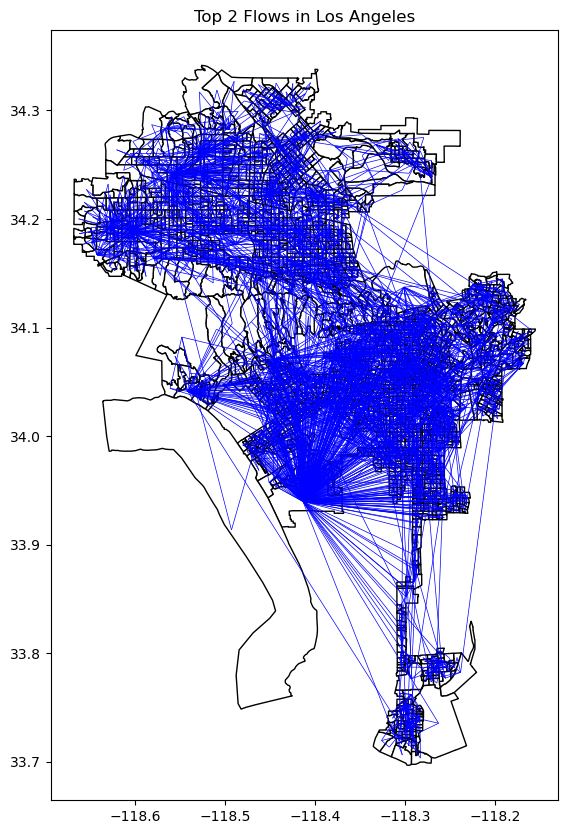

In [17]:
# Draw a flowmap for top-k network

import geopandas as gpd
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from shapely import wkt
import networkx as nx
import pickle
from matplotlib.collections import LineCollection


# Load your numpy array and node to CBG mapping
flow_matrix = np.load(r'data\Mobility\cbg_visit_2022-02_2.npy')

# Set the diagonal elements to zero
np.fill_diagonal(flow_matrix, 0)

# Load the id_dict_2.pkl
with open(r'data\Mobility\id_dict_2.pkl', 'rb') as f:
    id_dict = pickle.load(f)

# Load the Shapefile
gdf = gpd.read_file(r"arcgis project\cbgs\cbgs_of_cities\Los_Angeles_city.shp")

# Convert the WKT centroid strings into shapely Point objects
gdf['Centroid'] = gdf['Centroid'].apply(wkt.loads)

# Define function to create graph for given k
def create_graph(k):
    sorted_indices = np.argsort(-flow_matrix, axis=1)
    edges = [(i, j) for i in range(flow_matrix.shape[0]) for j in sorted_indices[i, :k]]
    G = nx.DiGraph()
    G.add_edges_from(edges)
    return G,edges

# Create all flows graph
#all_flows_graph = create_graph(flow_matrix.shape[0])

# Create top k flows graph
top_k_flows_G, top_k_flows_graph = create_graph(2)

# Define function to plot flow map
def plot_flow_map(G, title):
    fig, ax = plt.subplots(figsize=(10,10))

    # Plot base map
    gdf.plot(ax=ax, color='white', edgecolor='black')

    pos = {node: (gdf.loc[gdf['CBG_Code'] == id_dict[node], 'Centroid'].values[0].x, gdf.loc[gdf['CBG_Code'] == id_dict[node], 'Centroid'].values[0].y) for node in G.nodes()}
    nx.draw_networkx(G, pos, with_labels=False, node_size=10, ax=ax)

    plt.title(title)
    plt.show()

def plot_flow_map2(graph, title):
    fig, ax = plt.subplots(figsize=(10,10))

    # Plot base map
    gdf.plot(ax=ax, color='white', edgecolor='black')

    # Create lines for each flow
    lines = [([gdf.loc[gdf['CBG_Code'] == id_dict[i], 'Centroid'].values[0].x, gdf.loc[gdf['CBG_Code'] == id_dict[i], 'Centroid'].values[0].y], 
               [gdf.loc[gdf['CBG_Code'] == id_dict[j], 'Centroid'].values[0].x, gdf.loc[gdf['CBG_Code'] == id_dict[j], 'Centroid'].values[0].y]) 
              for i, j in graph]

    lc = LineCollection(lines, color='blue', linewidths=0.5)

    # Add lines to plot
    ax.add_collection(lc)

    plt.title(title)
    plt.show()

# Plot all flows map
#plot_flow_map(all_flows_graph, 'All Flows in Los Angeles')

# Plot top k flows map
plot_flow_map2(top_k_flows_graph, f'Top {2} Flows in Los Angeles')


In [ ]:
# Calculate total flows of one year for each cities.
# And then calculate the minimum flow for strongly connectivity.

def cal_total_flow(year, city):
    """_summary_

    Args:
        year (_type_): _description_
        city (_type_): _description_

    Returns:
        _type_: _description_
    """    
    # Define the file name pattern and the months
    filename_pattern = r"data\Mobility\cbg_visit_{year}-{month}_{city}.npy"

    months = range(1,13)
    # Initialize an empty array to hold the total flow
    total_flow = None

    # Load each file and add it to the total flow
    for month in months:
        file_name = filename_pattern.format(month = str(month).zfill(2), year = year, city = city)
        if os.path.exists(file_name):
            monthly_flow = np.load(file_name)
            if total_flow is None:
                total_flow = monthly_flow
            else:
                total_flow += monthly_flow
        else:
            print("no file of {}".format(file_name))
    return total_flow
# Now `total_flow` holds the sum of all the monthly flows
k_table = pd.DataFrame(columns=['year'])
for i in range(1, 11):
    k_table[i] = -100

k_table.set_index(['year'], inplace=True)


for year in range(2018, 2023):
    for city in range(1, 11):
        flow_matrix = cal_total_flow(year, city)
        k = minimum_flows_for_strongly_connectivity(flow_matrix)
        #print("{year_}-{month_}_{city_}:{k_}".format(year_ = year, month_ = str(month).zfill(2), city_ = city,k_=k))
        k_table.loc[year,city] = k
k_table.to_csv("all_k_yearly.csv")

In [8]:
def draw_k_box(df, cbg_counts =[6493, 2509, 2183, 1568, 972, 1336, 929, 845, 946, 583], year = "", save = False):
    fig, ax1 = plt.subplots()

    # 画箱线图
    green = (30/255, 134/255, 51/255)
    blue = (25/255,97/255,147/255)
    red = (201/255,	0/255,	42/255	)
    boxprops = dict(color=blue)
    medianprops = dict(color=green)
    whiskerprops = dict(color='Black')
    
    #df.boxplot(ax=ax1, boxprops=boxprops, medianprops=medianprops,whiskerprops=whiskerprops)
    df.boxplot(ax=ax1)
    ax1.set_yticks(np.arange(0, 1601, 200))
    ax1.set_ylabel('k Values')
    plt.xticks(rotation=45)
    
    # 创建第二个 y 轴
    ax2 = ax1.twinx()

    # 设置x轴为df的columns
    x = np.array(range(len(df.columns)))

    ax2.plot(x+1, cbg_counts, color='r', label='CBG Counts')
    ax2.set_ylabel('CBG Counts')

    # 添加图例
    ax2.legend(loc="upper right")

    plt.title("k's boxplots and CBG counts from 2018 to 2022".format(year) )
    plt.tight_layout()
    if year == "all":
        plt.savefig("k's boxplot and CBG counts from 2018 to 2022.png", dpi=300)

    else:
        plt.savefig("k's boxplot and CBG counts in year {}.png".format(year), dpi=300)
    plt.show()


/var/folders/lx/48nrsg4n38b36nwmsqwzzqxh0000gn/T/ipykernel_31613/1741706520.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_single_year.drop(['year', 'month'], axis=1, inplace=True)
/var/folders/lx/48nrsg4n38b36nwmsqwzzqxh0000gn/T/ipykernel_31613/1741706520.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_single_year.drop(['year', 'month'], axis=1, inplace=True)
/var/folders/lx/48nrsg4n38b36nwmsqwzzqxh0000gn/T/ipykernel_31613/1741706520.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-

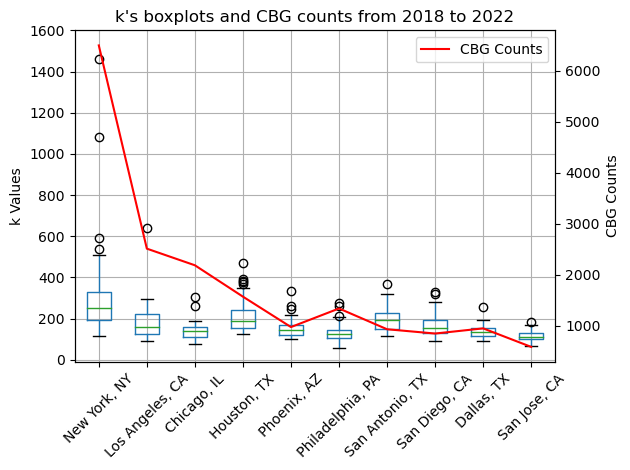

In [9]:
import matplotlib.pyplot as plt

df = pd.read_csv(r"all_k.csv")
cities = ['New York, NY', 'Los Angeles, CA', 'Chicago, IL', 'Houston, TX', 'Phoenix, AZ', 'Philadelphia, PA', 'San Antonio, TX', 'San Diego, CA', 'Dallas, TX', 'San Jose, CA']

df.columns = ['year', 'month']+cities
for year in range(2018,2022):
#year = 2020
    # 选择2018年的数据
    df_single_year = df[df["year"] == year]
    df_single_year.drop(['year', 'month'], axis=1, inplace=True)
    #draw_k_box(df_single_year, year = year, save = True)

df.drop(['year', 'month'], axis=1, inplace=True)
draw_k_box(df, year = "all", save = True)

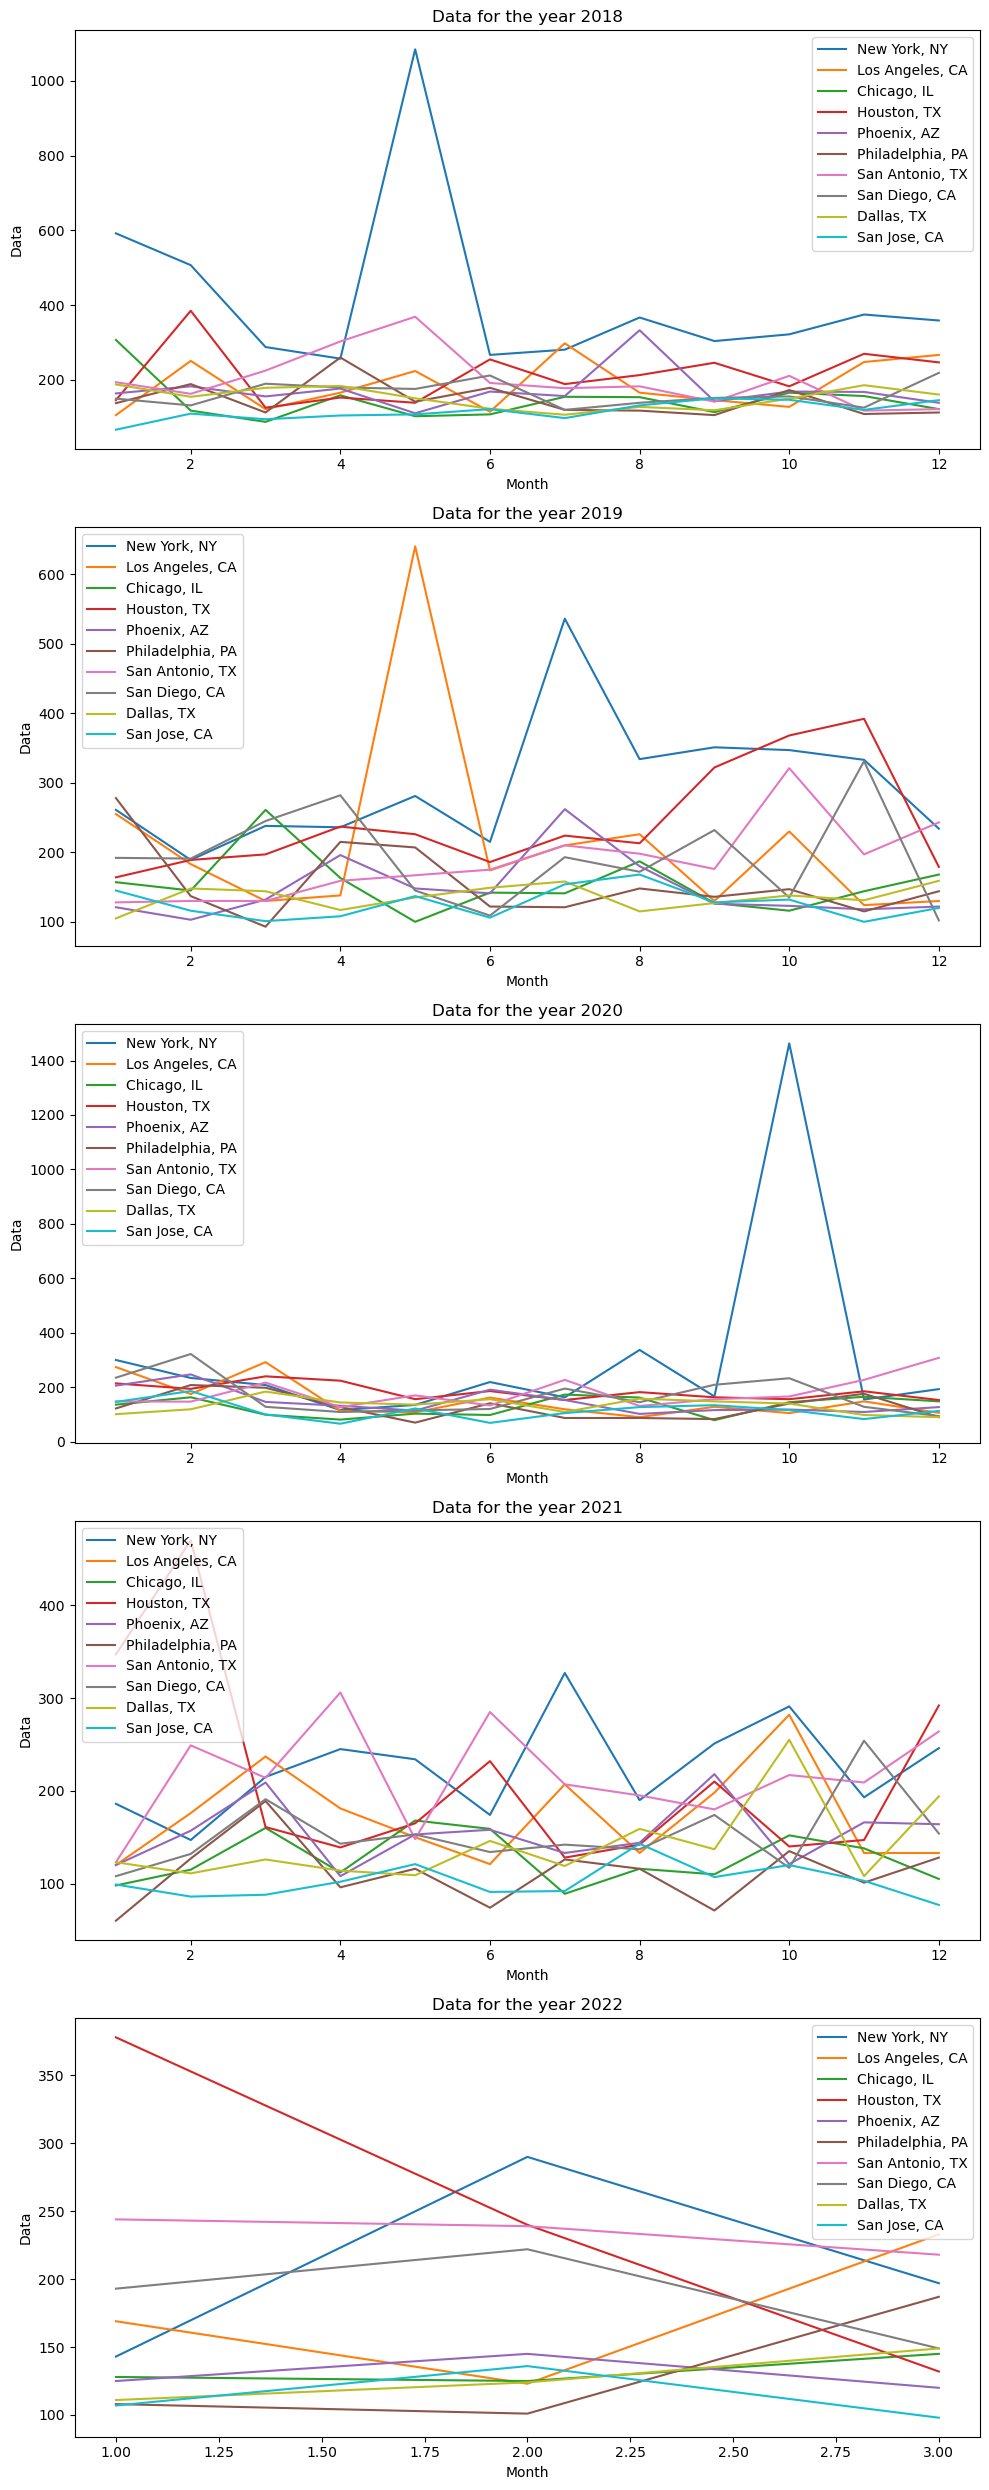

In [4]:
import matplotlib.pyplot as plt

# 将 'year' 和 'month' 设为索引
df.set_index(['year', 'month'], inplace=True)

# 获取年份列表
years = df.index.get_level_values('year').unique()
city_list = ['New York, NY', 'Los Angeles, CA', 'Chicago, IL', 'Houston, TX', 'Phoenix, AZ', 'Philadelphia, PA', 'San Antonio, TX', 'San Diego, CA', 'Dallas, TX', 'San Jose, CA']
# 创建一个图形
fig, axs = plt.subplots(len(years), 1, figsize=(10, 5*len(years)))

# 为每个年份绘制一条折线
for ax, year in zip(axs, years):
    # 获取该年份的数据
    df_year = df.xs(year, level='year')
    
    # 对每个城市进行绘制
    for city in city_list:
        ax.plot(df_year.index, df_year[city], label=city)

    # 设置标题、轴标签等
    ax.set_title(f'Data for the year {year}')
    ax.set_xlabel('Month')
    ax.set_ylabel('Data')
    ax.legend()

plt.tight_layout()
plt.show()


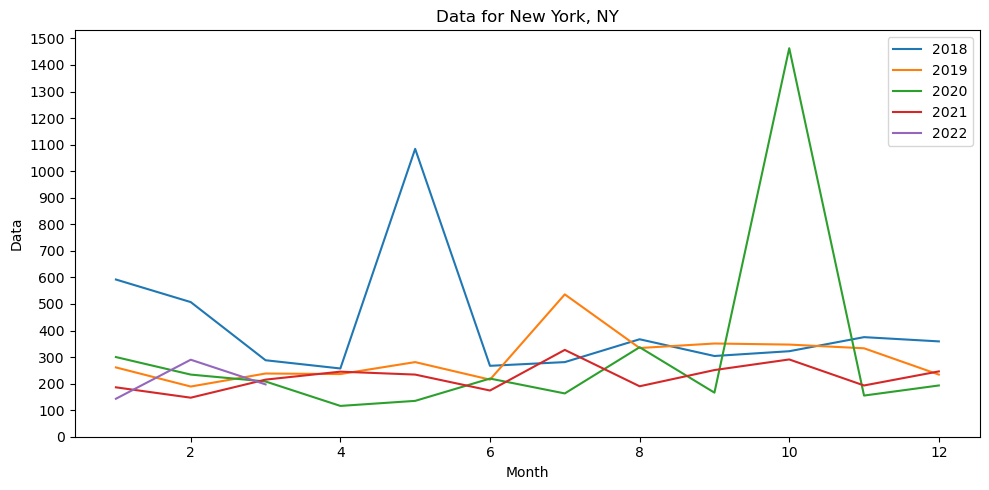

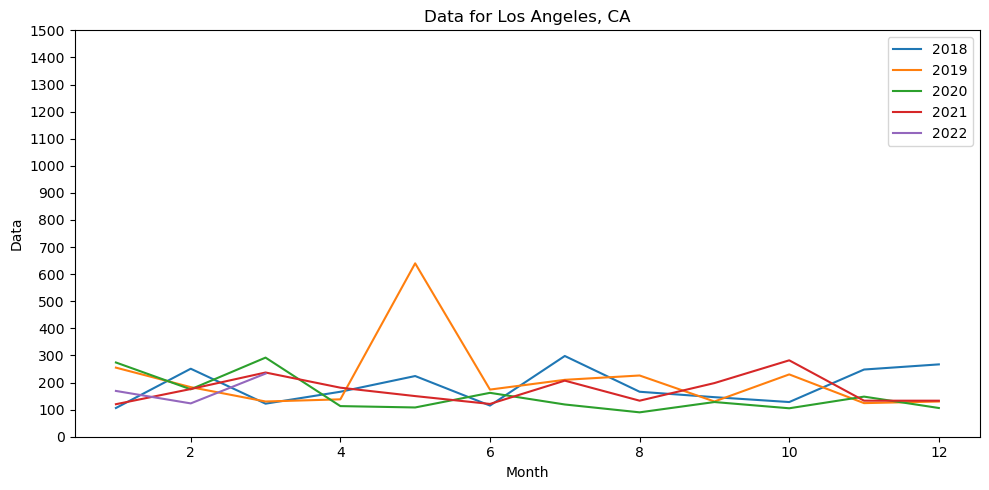

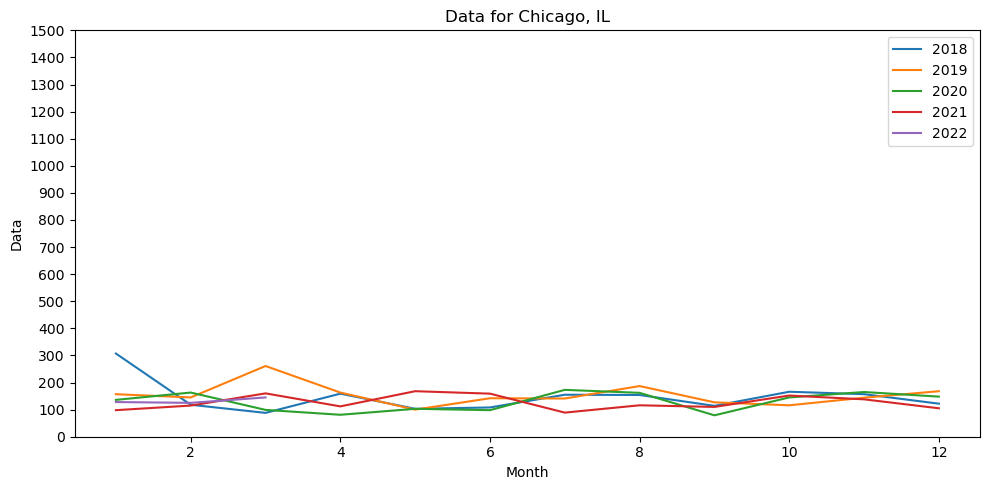

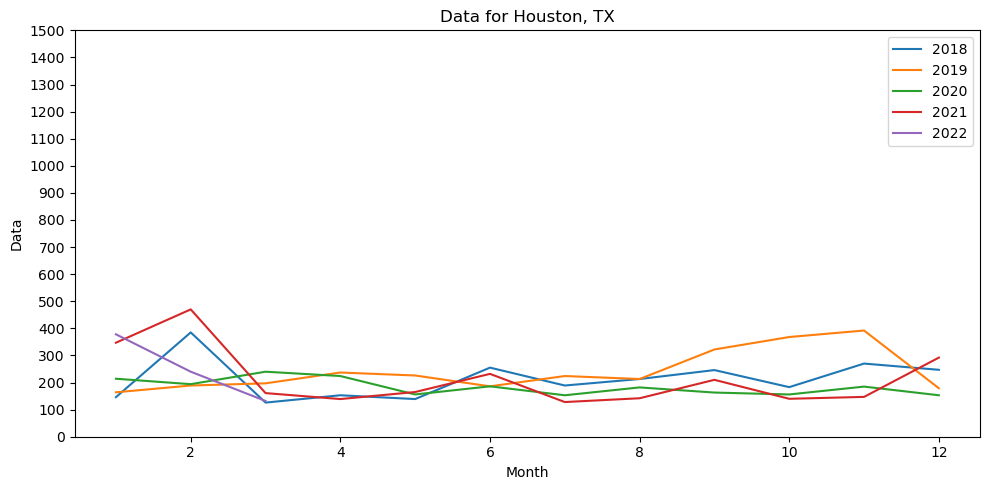

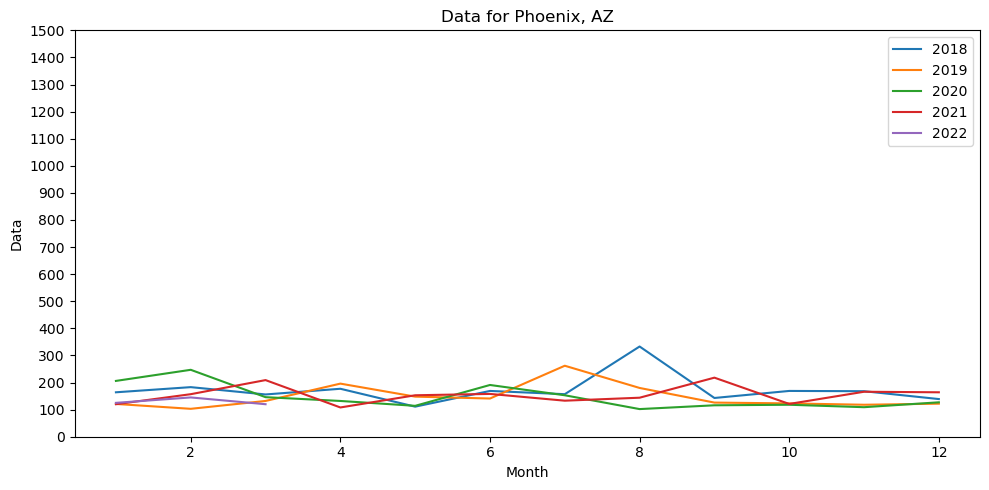

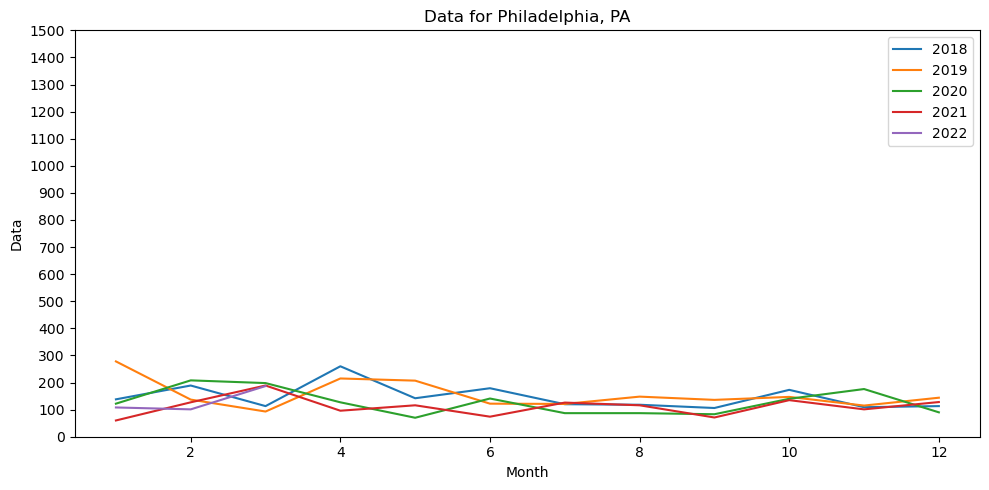

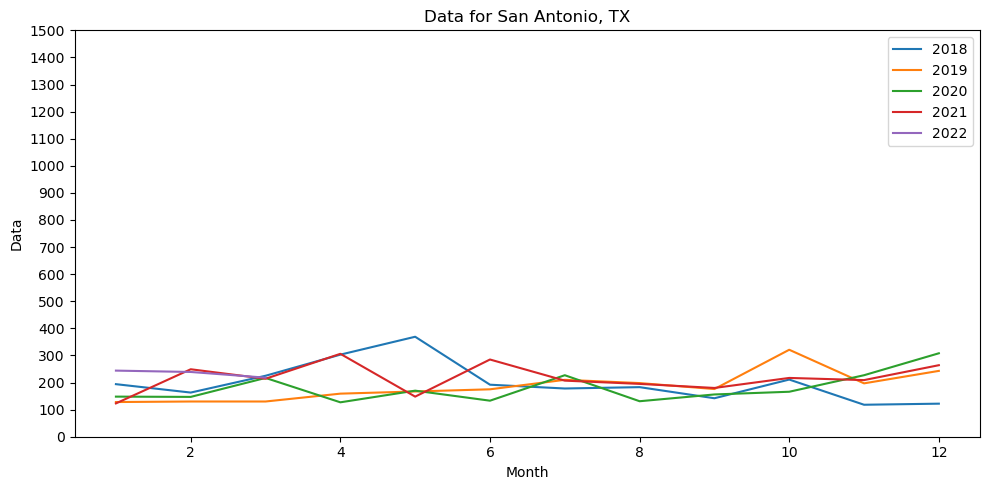

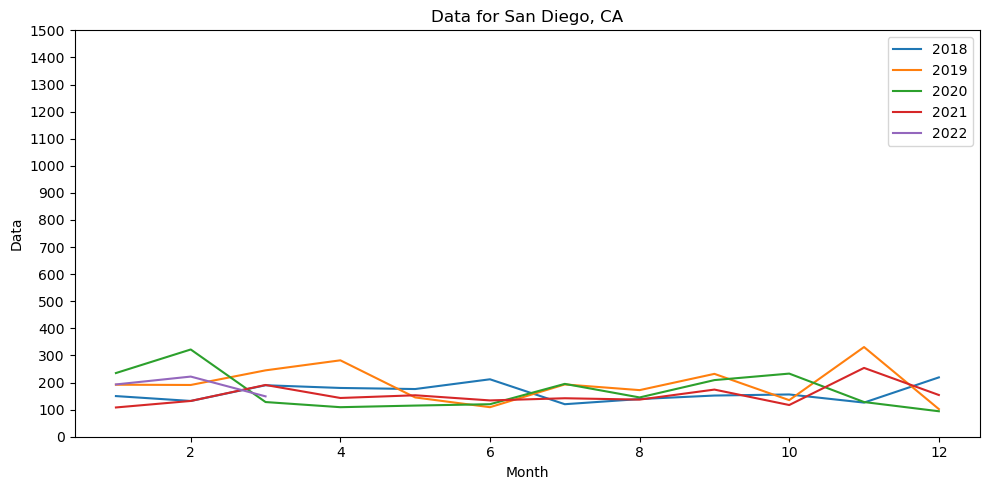

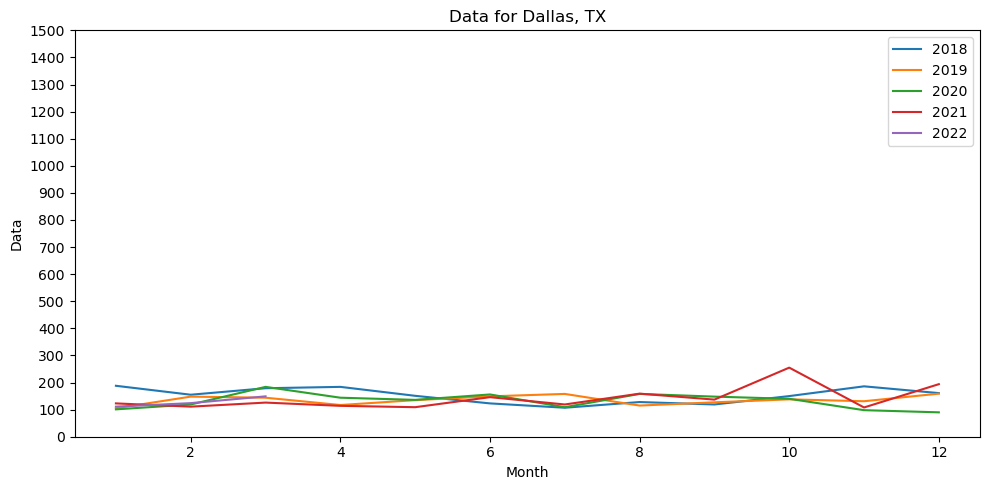

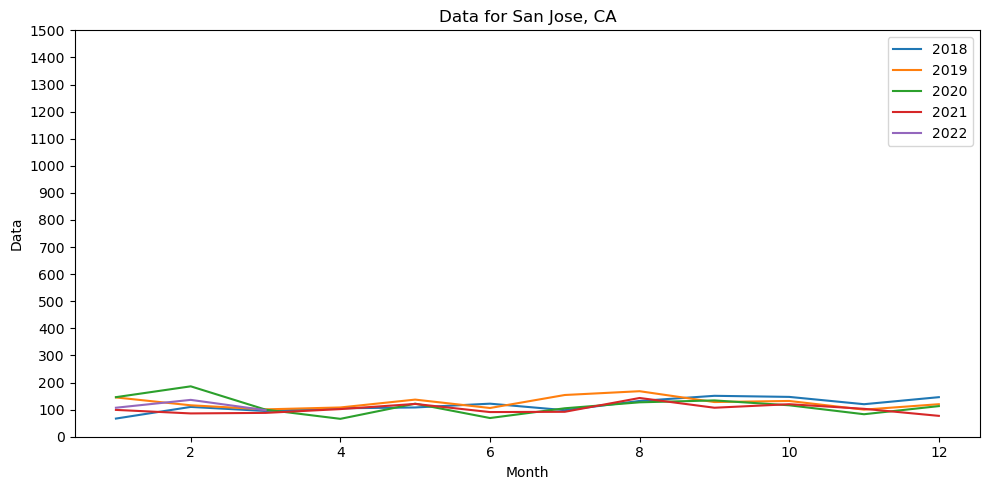

In [8]:
import matplotlib.pyplot as plt

# 获取年份列表
years = df.index.get_level_values('year').unique()

# 对每个城市进行绘制
for city in city_list:
    # 创建一个图形
    fig, ax = plt.subplots(figsize=(10, 5))
    
    # 为每个年份绘制一条折线
    for year in years:
        # 获取该年份的数据
        df_year = df.xs(year, level='year')

        # 绘制折线
        ax.plot(df_year.index, df_year[city], label=str(year))

    # 设置标题、轴标签等
    ax.set_title(f'Data for {city}')
    ax.set_xlabel('Month')
    ax.set_ylabel('Data')
    ax.legend()
    ax.set_yticks(np.arange(0, 1600, 100))
    plt.tight_layout()
    plt.show()


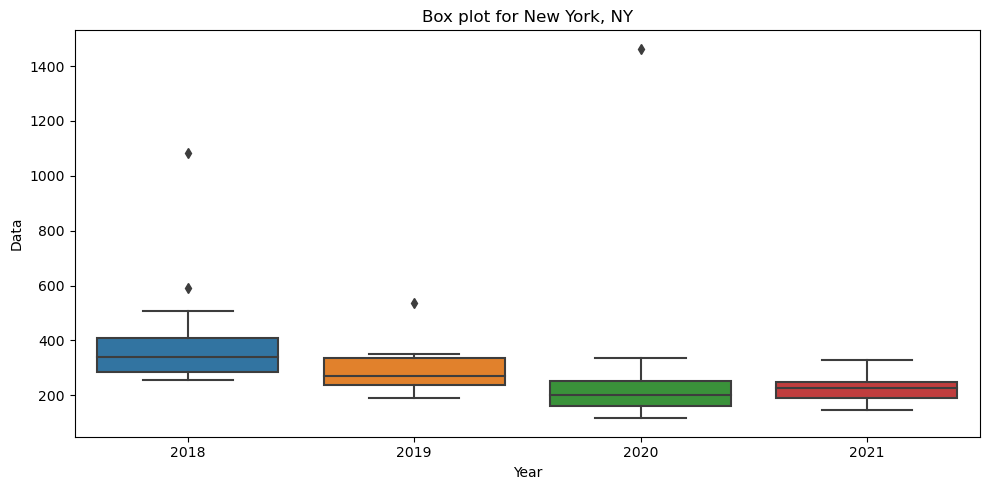

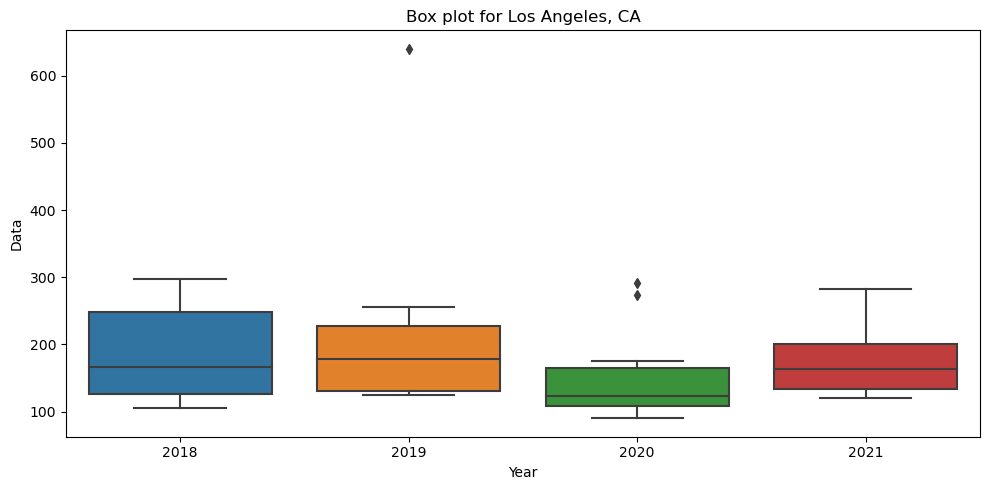

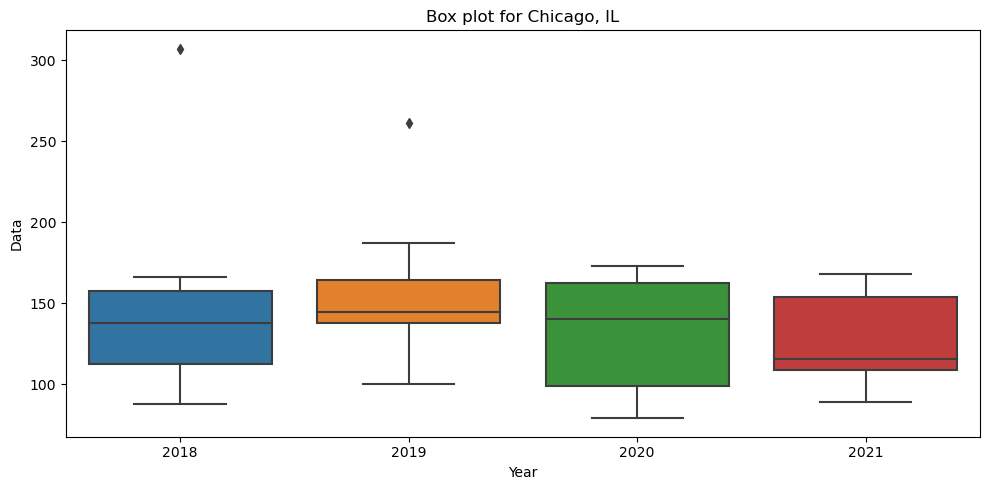

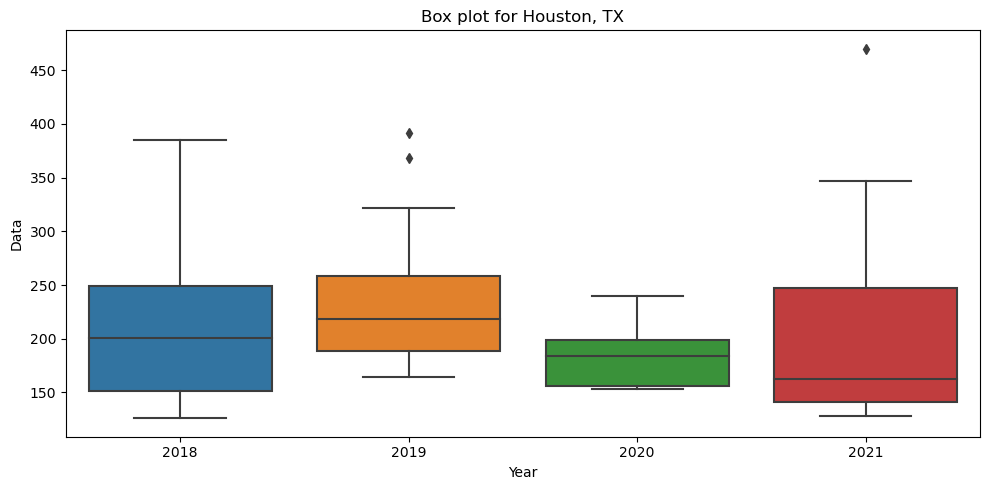

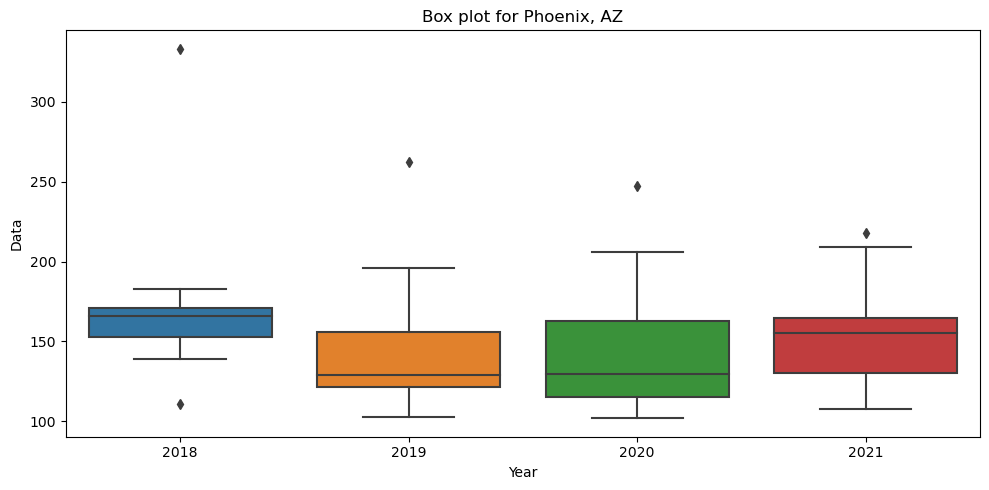

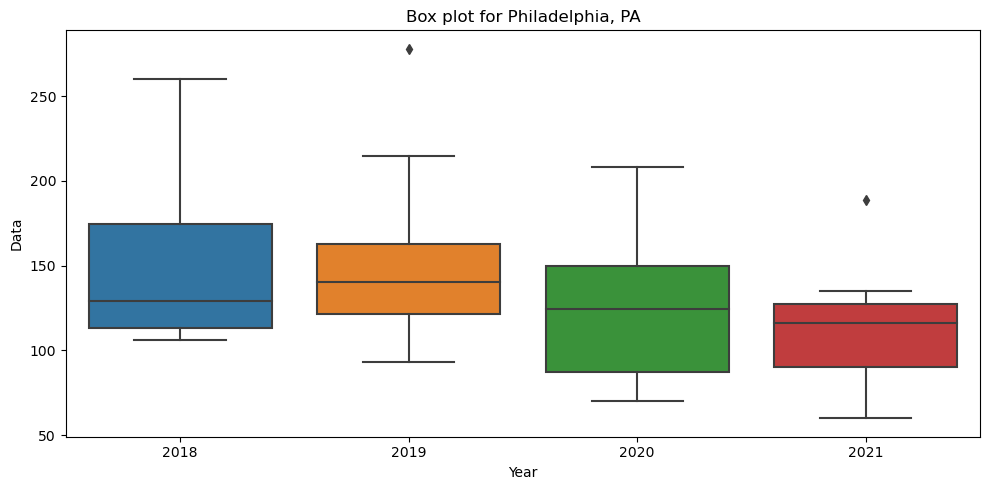

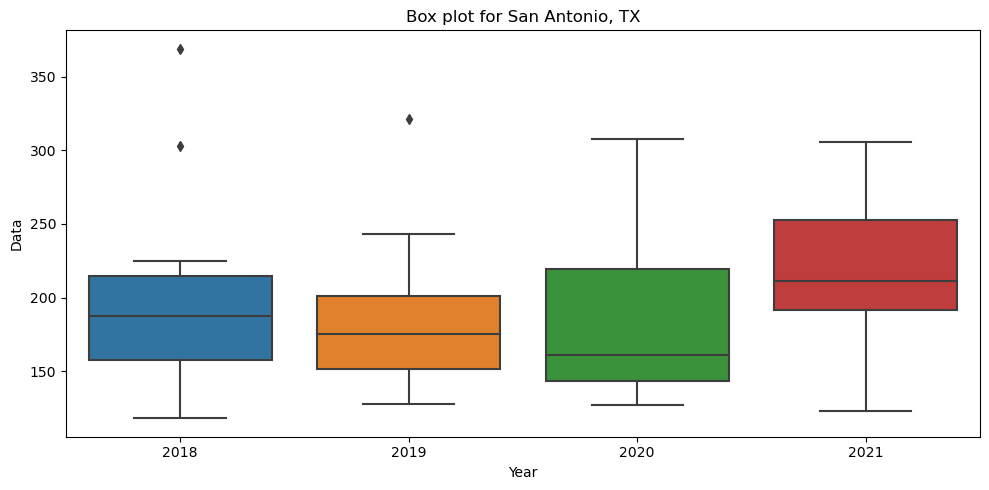

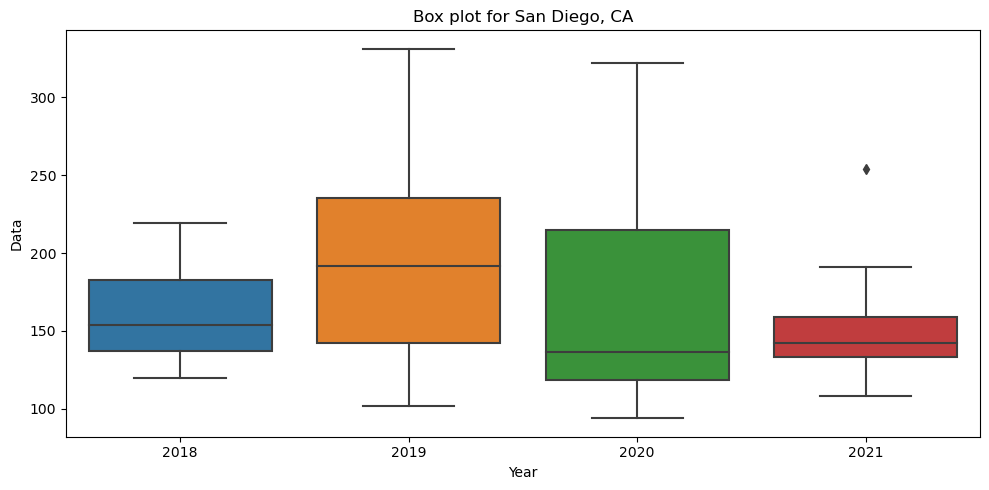

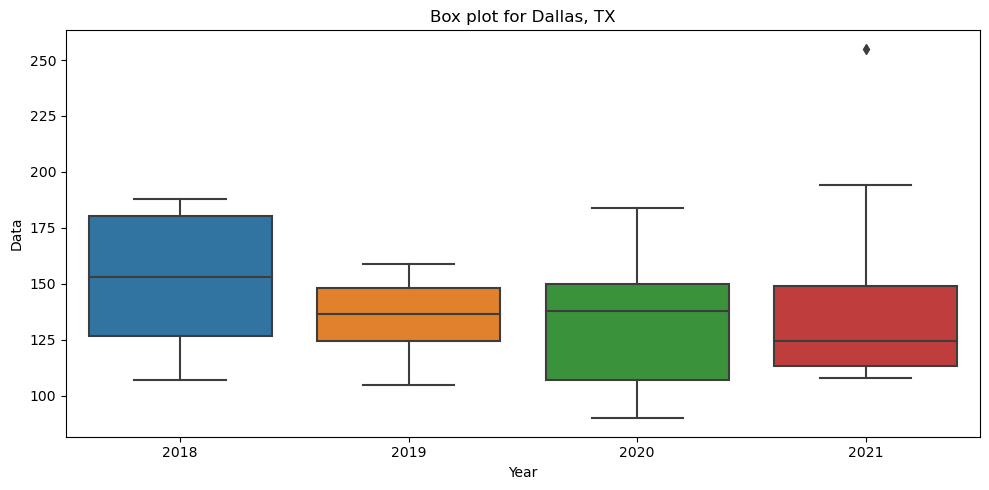

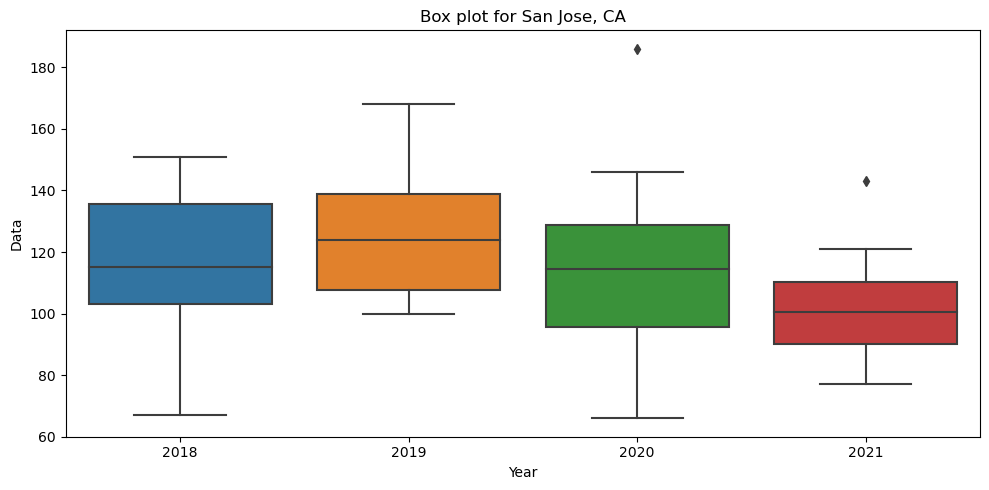

In [11]:
import seaborn as sns
# 删除 2022 年的数据
df = df[df.index.get_level_values('year') != 2022]

# 对每个城市进行绘制
for city in city_list:
    # 创建一个图形
    fig, ax = plt.subplots(figsize=(10, 5))

    # 创建一个新的数据框，其中包含年份和城市的数据
    df_city = df[city].reset_index()

    # 使用 seaborn 创建箱线图
    sns.boxplot(x='year', y=city, data=df_city, ax=ax)

    # 设置标题、轴标签等
    ax.set_title(f'Box plot for {city}')
    ax.set_xlabel('Year')
    ax.set_ylabel('Data')

    plt.tight_layout()
    plt.show()


In [ ]:
# Draw flowmaps, in whcih strongly connected components are colored differently.
import geopandas as gpd
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from shapely import wkt
import networkx as nx
import pickle
from matplotlib.collections import LineCollection
import matplotlib.pyplot as plt
import networkx as nx
import numpy as np
from sklearn.neighbors import kneighbors_graph
from matplotlib.cm import get_cmap

# Load your numpy array and node to CBG mapping
flow_matrix = np.load(r'data\Mobility\cbg_visit_2020-10_1.npy')

# Set the diagonal elements to zero
np.fill_diagonal(flow_matrix, 0)

# Load the id_dict_2.pkl
with open(r'data\Mobility\id_dict_1.pkl', 'rb') as f:
    id_dict = pickle.load(f)

# Load the Shapefile
gdf = gpd.read_file(r"arcgis project\cbgs\cbgs_of_cities\New_York_city.shp")
# Convert the WKT centroid strings into shapely Point objects
gdf['Centroid'] = gdf['Centroid'].apply(wkt.loads)

# Define function to create graph for given k
def create_graph(k):
    sorted_indices = np.argsort(-flow_matrix, axis=1)
    edges = [(i, j) for i in range(flow_matrix.shape[0]) for j in sorted_indices[i, :k]]
    G = nx.DiGraph()
    G.add_edges_from(edges)
    return G,edges


# Define function to plot flow map
def plot_flow_map(G, title):
    fig, ax = plt.subplots(figsize=(10,10))

    # Plot base map
    gdf.plot(ax=ax, color='white', edgecolor='black')
    #nx.draw_networkx(G, pos, with_labels=False, node_size=10, ax=ax)

    pos = {node: (gdf.loc[gdf['CBG_Code'] == id_dict[node], 'Centroid'].values[0].x, gdf.loc[gdf['CBG_Code'] == id_dict[node], 'Centroid'].values[0].y) for node in G.nodes()}


    # 计算连通子图
    scc = list(nx.strongly_connected_components(G))
    print(len(scc))
    # 绘制网络
    cmap = get_cmap('viridis')

    for i, component in enumerate(scc):
        nx.draw_networkx_nodes(G, pos, nodelist=component, node_color=cmap(i / len(scc)), ax=ax)
        nx.draw_networkx_edges(G, pos, edgelist=[(u, v) for u in component for v in G.neighbors(u)], ax=ax)
    
    plt.title(title)
    plt.show()

def plot_flow_map2(graph, title):
    fig, ax = plt.subplots(figsize=(10,10))

    # Plot base map
    gdf.plot(ax=ax, color='white', edgecolor='black')

    # Create lines for each flow
    lines = [([gdf.loc[gdf['CBG_Code'] == id_dict[i], 'Centroid'].values[0].x, gdf.loc[gdf['CBG_Code'] == id_dict[i], 'Centroid'].values[0].y], 
               [gdf.loc[gdf['CBG_Code'] == id_dict[j], 'Centroid'].values[0].x, gdf.loc[gdf['CBG_Code'] == id_dict[j], 'Centroid'].values[0].y]) 
              for i, j in graph]

    lc = LineCollection(lines, color='blue', linewidths=0.5)

    # Add lines to plot
    ax.add_collection(lc)

    plt.title(title)
    plt.show()
    
    
# 指定 k 值
k_values = [160, 250, 337]

for k in k_values:
    top_k_flows_G, top_k_flows_graph = create_graph(k)
    plot_flow_map(top_k_flows_G, f'Top {k} Flows in New York')
# Create all flows graph
#all_flows_graph = create_graph(flow_matrix.shape[0])

# Create top k flows graph

# Plot all flows map
#plot_flow_map(all_flows_graph, 'All Flows in Los Angeles')

# Plot top k flows map
#plot_flow_map(top_k_flows_graph, f'Top {2} Flows in Los Angeles')





In [16]:
# Calculating cbg counts for each city
cbg_counts = []
for year in range(2019, 2020):
    for month in range(1, 2):
        for city in range(1, 11):
            flow_matrix = np.load(r'data\Mobility\cbg_visit_{year_}-{month_}_{city_}.npy'.format(year_ = year, month_ = str(month).zfill(2), city_ = city))
            n = flow_matrix.shape[0]
            cbg_counts.append(n)


In [ ]:
# Abloshed 
# the function to find the minimum number of flows required to ensure connectivity in a network
def minimum_flows_for_connectivity(flow_matrix):
    # Initialize k
    k = 1

    # Get the number of units (assumes flow_matrix is square)
    num_units = flow_matrix.shape[0]
    np.fill_diagonal(flow_matrix, 0)
    # Create a list of indices for sorting the flows in descending order
    sorted_indices = np.argsort(-flow_matrix, axis=1)

    while True:
        # Initialize a directed graph
        G = nx.DiGraph()

        # Add all nodes to the graph
        G.add_nodes_from(range(num_units))

        # For each origin unit, add edges for the top k flows
        for origin in range(num_units):
            for destination in sorted_indices[origin, :k]:
                G.add_edge(origin, destination)

        # Check if the graph is weakly connected
        if nx.is_weakly_connected(G):
            # If it is, return the current value of k
            return k

        # If not, increment k
        k += 1
        
# Use cases of the function
"""flow_matrix = np.load(r'data\Mobility\cbg_visit_2018-01_1.npy')
k = minimum_flows_for_connectivity(flow_matrix)
print(f'The minimum number of highest flows needed to keep the graph weakly connected is {k}.')"""

"""for year in range(2018, 2023):
    for month in range(1, 13):
        for city in range(1, 11):
            flow_matrix = np.load(r'data\Mobility\cbg_visit_{year_}-{month_}_{city_}.npy'.format(year_ = year, month_ = str(month).zfill(2), city_ = city))
            k = minimum_flows_for_connectivity(flow_matrix)
            print("{year_}-{month_}_{city_}:{k_}".format(year_ = year, month_ = str(month).zfill(2), city_ = city,k_=k))"""


In [ ]:
# Abloshed 
# Extracting the minimum number of highest flows needed to keep the graph weakly connected using binary search
import numpy as np
import networkx as nx

def binary_search_connectivity(flow_matrix):
    num_units = flow_matrix.shape[0]

    # Sorted indices for descending order of flow for each unit
    sorted_indices = np.argsort(-flow_matrix, axis=1)

    # Binary search variables
    low = 1
    high = num_units 
    
    # Function to create a graph for a given k
    def create_graph(k):
        G = nx.DiGraph()
        G.add_nodes_from(range(num_units))
        for origin in range(num_units):
            for destination in sorted_indices[origin, :k]:
                G.add_edge(origin, destination)
        return G

    while low < high:
        mid = low + (high - low) // 2

        # Check if the graph is weakly connected for the current mid
        if nx.is_weakly_connected(create_graph(mid)):
            high = mid
        else:
            low = mid + 1

    # Final check if the graph is weakly connected for the low/high point
    if nx.is_weakly_connected(create_graph(low)):
        return low
    else:
        return -1

# Usage:
flow_matrix = np.load('path_to_your_file.npy')
k = binary_search_connectivity(flow_matrix)
print(f'The minimum number of highest flows needed to keep the graph weakly connected is {k}.')


In [ ]:
# Grographical data preprocessing (from csv to shp)
import pandas as pd
import geopandas as gpd
from shapely import wkt

# Load the CSV file into a pandas DataFrame
df = pd.read_csv(r'data\Basic_Geographic_Statistics_CBG.csv')

# Convert the WKT boundary strings into shapely objects
df['Boundary'] = df['Boundary'].apply(wkt.loads)

# Convert the DataFrame to a GeoDataFrame
# Make sure to specify the correct coordinate system for your data
gdf = gpd.GeoDataFrame(df, geometry='Boundary', crs="EPSG:4326")

# Save the GeoDataFrame as a Shapefile
gdf.to_file("output_file.shp")

In [ ]:
# Geographical data preprocessing (Split whole American CBG data to each city)
import geopandas as gpd

# Load the Shapefile
gdf = gpd.read_file(r"arcgis project\cbgs\cbgs_2018.shp")
print(gdf.info())
# Split the GeoDataFrame into multiple GeoDataFrames based on the 'City Name' column
gdfs = [data for city_name, data in gdf.groupby('City_Name')]

# Save each GeoDataFrame as a separate Shapefile
for city_gdf in gdfs:
    city_name = city_gdf['City_Name'].unique()[0]
    print(city_name)
    # The file name is based on the city name
    # Spaces are replaced with underscores and the file extension .shp is added
    filename = city_name.replace(' ', '_') + '.shp'

    #city_gdf.to_file(r"arcgis project\cbgs\{}",format(filename))
    city_gdf.to_file(filename)

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 18364 entries, 0 to 18363
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   City_Name   18364 non-null  object  
 1   CBG_Code    18364 non-null  float64 
 2   Year        18364 non-null  float64 
 3   Population  18364 non-null  float64 
 4   Area        18364 non-null  float64 
 5   Centroid    18364 non-null  object  
 6   Shape_Leng  18364 non-null  float64 
 7   Shape_Area  18364 non-null  float64 
 8   geometry    18364 non-null  geometry
dtypes: float64(6), geometry(1), object(2)
memory usage: 1.3+ MB
None
Chicago city
Dallas city
Houston city
Los Angeles city
New York city
Philadelphia city
Phoenix city
San Antonio city
San Diego city
San Jose city
